# Getting started with INTEGRATE - with no forward code

This notebook contains a simple example of getting started with INTEGRATE - with no forward code

0. Load prior data (prior models and prior data) (DAUGAARD.h5)
1. Perform probabilistic inversion using integrate_rejection.
2. Plot some results

GA-AEM is not need to run this example.



In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # #%load_ext autoreload
    # # # # #%autoreload 2
    pass

In [2]:
import integrate as ig
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)
hardcopy = True 
import matplotlib.pyplot as plt

Notebook detected. Parallel processing is OK


## 0. Get some TTEM data
A number of test cases are available in the INTEGRATE package
To see which cases are available, check the `get_case_data` function

The code below will download the file DAUGAARD_AVG.h5 that contains 
a number of TTEM soundings from DAUGAARD, Denmark.
It will also download the corresponding GEX file, TX07_20231016_2x4_RC20-33.gex, 
that contains information about the TTEM system used.


In [3]:
case = 'DAUGAARD'
files = ig.get_case_data(case=case,  loadType='prior_data')
f_data_h5 = files[0]
f_prior_h5 = files[-1]
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)
print("Using prior model and data file: %s" % f_prior_h5)

Getting data for case: DAUGAARD
--> Got data for case: DAUGAARD
Using data file: DAUGAARD_AVG.h5
Using GEX file: TX07_20231016_2x4_RC20-33.gex
Using prior model and data file: daugaard_standard_new_N1000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5


### Plot the geometry and the data
ig.plot_geometry plots the geometry of the data, i.e. the locations of the soundings.
ig.plot_data plots the data, i.e. the measured data for each sounding.

f_data_h5=DAUGAARD_AVG.h5
f_data_h5=DAUGAARD_AVG.h5
f_data_h5=DAUGAARD_AVG.h5


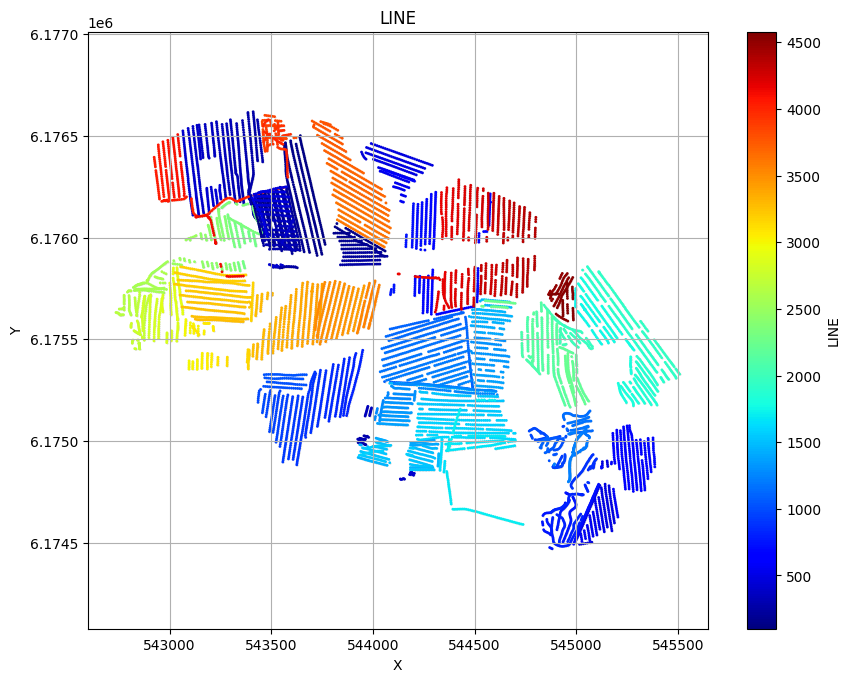

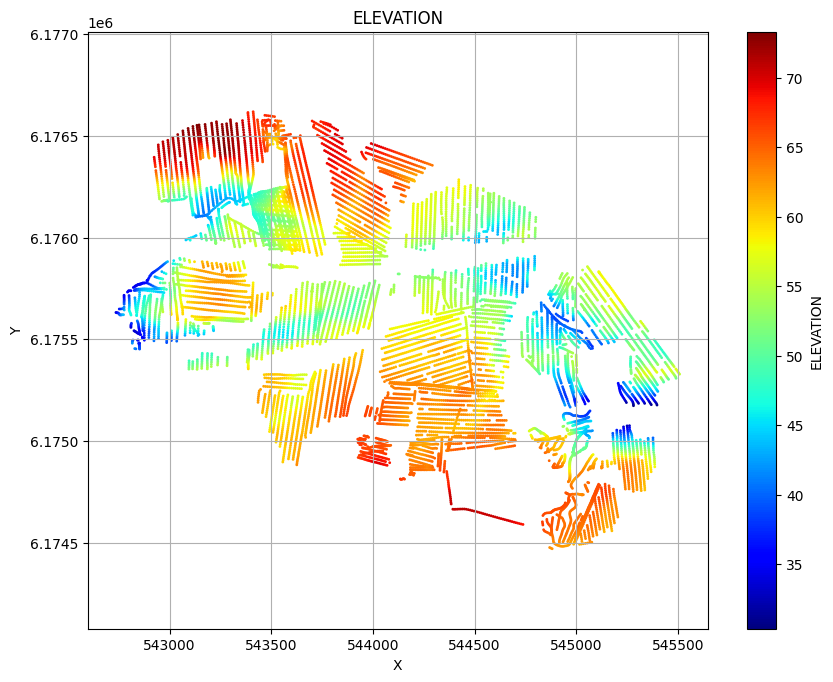

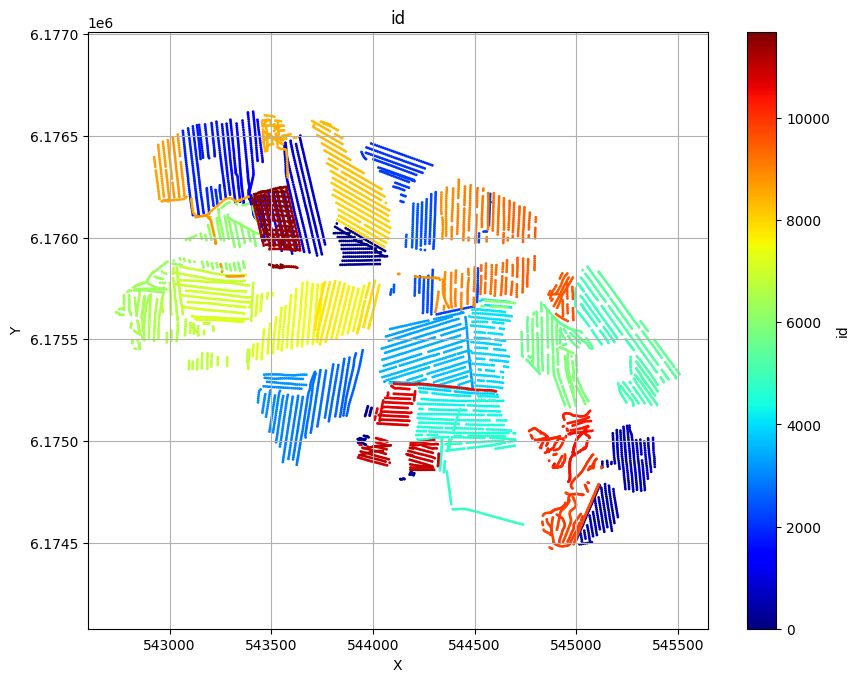

In [4]:
# The next line plots LINE, ELEVATION and data id, as three scatter plots
# ig.plot_geometry(f_data_h5)
# Each of these plots can be plotted separately by specifying the pl argument
ig.plot_geometry(f_data_h5, pl='LINE')
ig.plot_geometry(f_data_h5, pl='ELEVATION')
ig.plot_geometry(f_data_h5, pl='id')

plot_data: Found data set D1
plot_data: Using data set D1


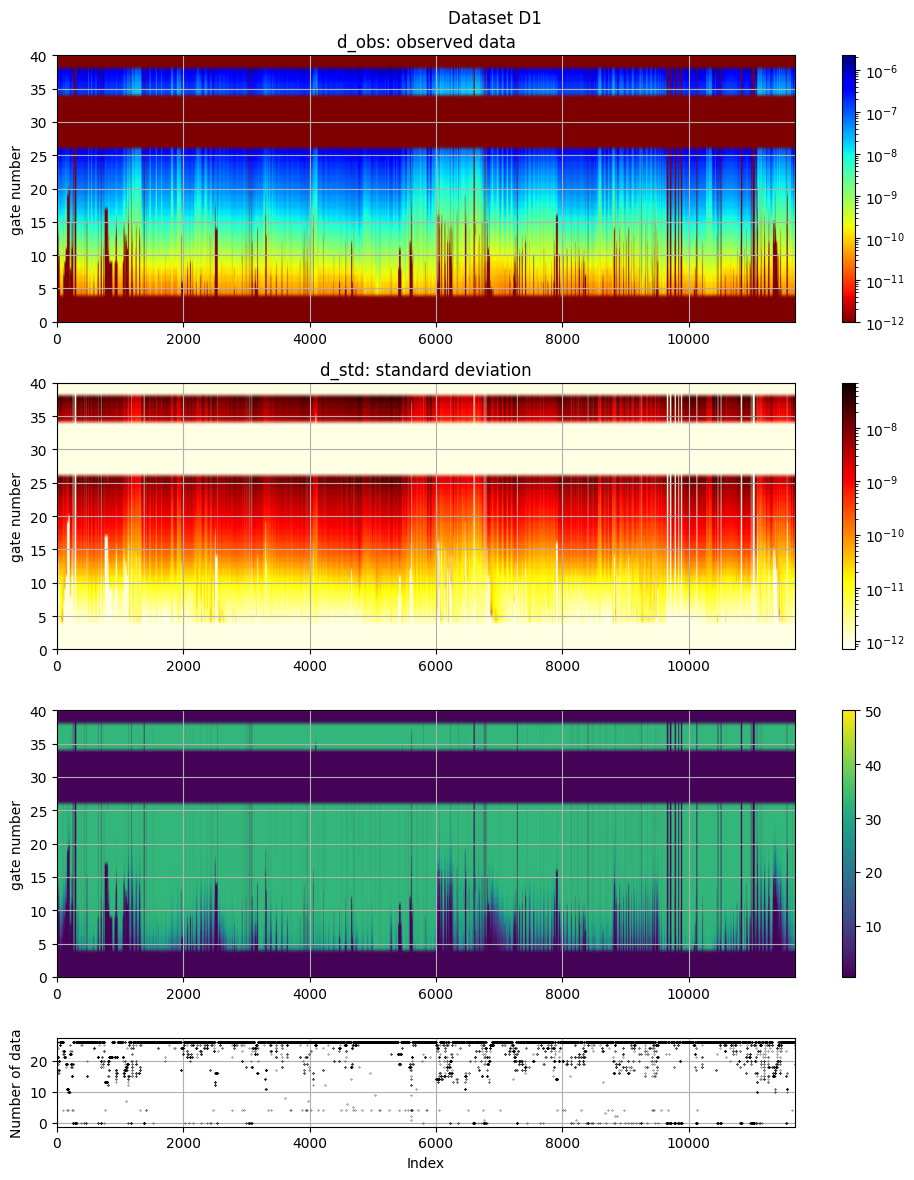

In [5]:
# The data, d_obs and d_std, can be plotted using ig.plot_data
ig.plot_data(f_data_h5, hardcopy=hardcopy)

## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d}))

In this case prior data and models are allready available in the HDF% in 'f_prior_h5'.

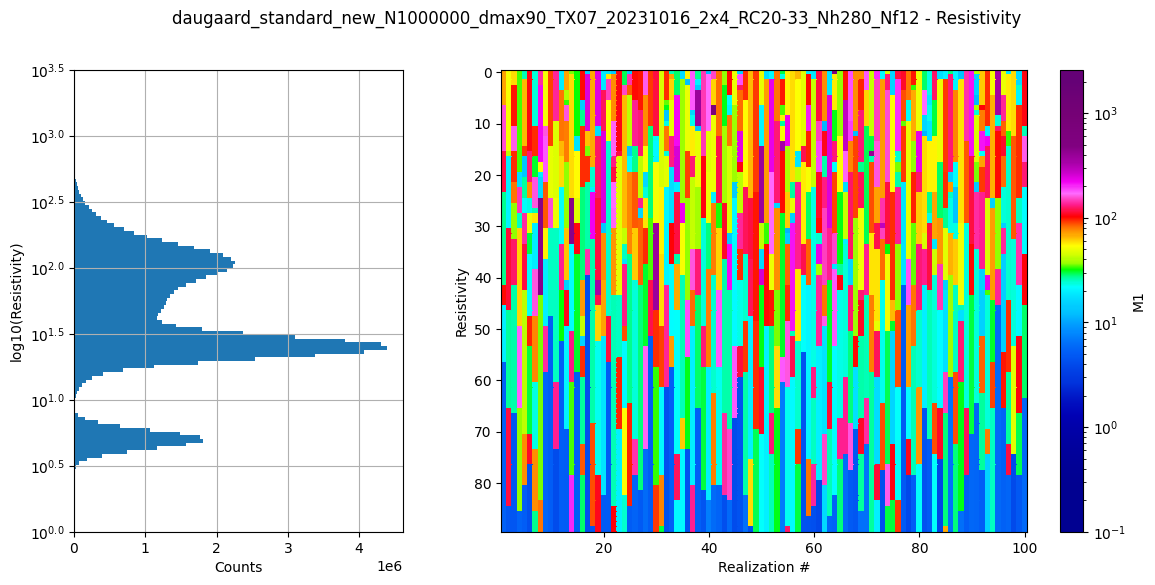

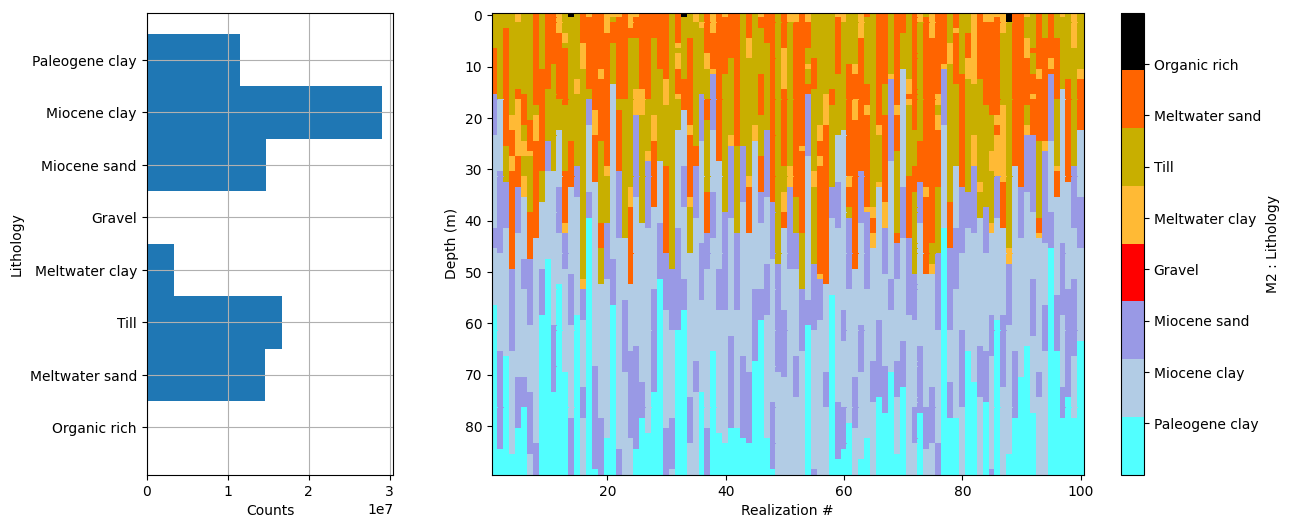

In [6]:
# Plot some summary statistics of the prior model, to QC the prior choice
ig.plot_prior_stats(f_prior_h5, hardcopy=hardcopy)

It can be useful to compare the prior data to the observed data before inversion. If there is little to no overlap of the observed data with the prior data, there is little chance that the inversion will go well. This would be an indication of inconsistency.
In the figure below, one can see that the observed data (red) is clearly within the space of the prior data.

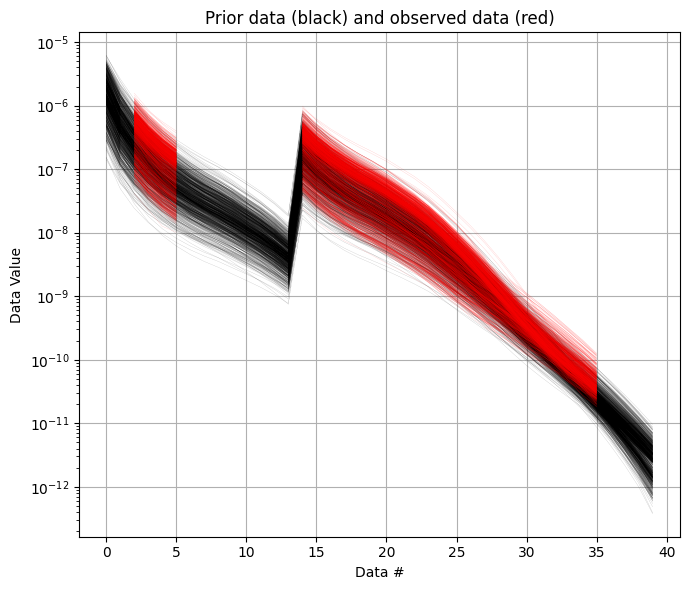

True

In [7]:
ig.plot_data_prior(f_prior_h5,f_data_h5,nr=1000,hardcopy=hardcopy)

## 2. Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampled using the extended rejection sampler.

In [8]:
# Rejection sampling of the posterior can be done using
#f_post_h5 = ig.integrate_rejection(f_prior_h5, f_data_h5)

# One can also control a number of options.
# One can choose to make use of only a subset of the prior data. Decreasing the sample size used makes the inversion faster, but increasingly approximate
N_use = 2000000 # Max lookup table size
N_use = 100000
T_base = 1 # The base annealing temperature. 
autoT = 1  # Automatically set the annealing temperature
f_post_h5 = ig.integrate_rejection(f_prior_h5, 
                                   f_data_h5, 
                                   f_post_h5 = 'POST.h5', 
                                   N_use = N_use, 
                                   autoT = autoT,
                                   T_base = T_base,                            
                                   showInfo=1, 
                                   parallel=parallel)

File POST.h5 allready exists
Overwriting...
Loading data from DAUGAARD_AVG.h5. Using data types: [1]
  - D1: id_prior=1,    gaussian, Using 11693/40 data
Loading prior data from daugaard_standard_new_N1000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5. Using prior data ids: [1]
  - /D1:  N,nd = 100000/40
<--INTEGRATE_REJECTION-->
f_prior_h5=daugaard_standard_new_N1000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5, f_data_h5=DAUGAARD_AVG.h5
f_post_h5=POST.h5


Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|▏                                                                                                             | 3/1462 [00:00<01:05, 22.18it/s]

Rejection Sampling:   0%|▏                                                                                                             | 3/1462 [00:00<01:04, 22.72it/s]

Rejection Sampling:   0%|▏                                                                                                             | 3/1462 [00:00<01:10, 20.70it/s]

Rejection Sampling:   0%|▏                                                                                                             | 2/1461 [00:00<01:26, 16.89it/s]

Rejection Sampling:   0%|▏                                                                                                             | 3/1462 [00:00<01:14, 19.68it/s]

Rejection Sampling:   0%|▏                                                                                                             | 3/1462 [00:00<01:12, 20.14it/s]

Rejection Sampling:   0%|▏                                                                                                             | 2/1461 [00:00<01:31, 15.91it/s]

Rejection Sampling:   0%|▏                                                                                                             | 2/1461 [00:00<01:35, 15.26it/s]

Rejection Sampling:   0%|▍                                                                                                             | 6/1462 [00:00<01:14, 19.64it/s]

Rejection Sampling:   0%|▎                                                                                                             | 4/1461 [00:00<01:23, 17.41it/s]

Rejection Sampling:   0%|▍                                                                                                             | 5/1462 [00:00<01:17, 18.70it/s]

Rejection Sampling:   0%|▍                                                                                                             | 6/1462 [00:00<01:11, 20.25it/s]

Rejection Sampling:   0%|▎                                                                                                             | 4/1461 [00:00<01:23, 17.40it/s]

Rejection Sampling:   0%|▍                                                                                                             | 6/1462 [00:00<01:15, 19.32it/s]

Rejection Sampling:   0%|▎                                                                                                             | 4/1461 [00:00<01:25, 17.10it/s]

Rejection Sampling:   0%|▍                                                                                                             | 6/1462 [00:00<01:13, 19.69it/s]

Rejection Sampling:   1%|▌                                                                                                             | 8/1462 [00:00<01:15, 19.13it/s]

Rejection Sampling:   0%|▍                                                                                                             | 6/1461 [00:00<01:21, 17.81it/s]

Rejection Sampling:   0%|▍                                                                                                             | 6/1461 [00:00<01:22, 17.67it/s]

Rejection Sampling:   0%|▌                                                                                                             | 7/1462 [00:00<01:27, 16.72it/s]

Rejection Sampling:   1%|▌                                                                                                             | 8/1462 [00:00<01:16, 18.93it/s]

Rejection Sampling:   1%|▌                                                                                                             | 8/1462 [00:00<01:15, 19.29it/s]

Rejection Sampling:   1%|▋                                                                                                             | 9/1462 [00:00<01:14, 19.52it/s]

Rejection Sampling:   0%|▍                                                                                                             | 6/1461 [00:00<01:22, 17.69it/s]

Rejection Sampling:   1%|▋                                                                                                            | 10/1462 [00:00<01:16, 18.88it/s]

Rejection Sampling:   1%|▌                                                                                                             | 8/1461 [00:00<01:20, 18.02it/s]

Rejection Sampling:   1%|▌                                                                                                             | 8/1461 [00:00<01:20, 18.03it/s]

Rejection Sampling:   1%|▋                                                                                                            | 10/1462 [00:00<01:17, 18.80it/s]

Rejection Sampling:   1%|▋                                                                                                             | 9/1462 [00:00<01:29, 16.23it/s]

Rejection Sampling:   1%|▌                                                                                                             | 8/1461 [00:00<01:20, 18.07it/s]

Rejection Sampling:   1%|▋                                                                                                            | 10/1462 [00:00<01:16, 19.02it/s]

Rejection Sampling:   1%|▊                                                                                                            | 11/1462 [00:00<01:15, 19.20it/s]

Rejection Sampling:   1%|▉                                                                                                            | 12/1462 [00:00<01:17, 18.66it/s]

Rejection Sampling:   1%|▋                                                                                                            | 10/1461 [00:00<01:18, 18.59it/s]

Rejection Sampling:   1%|▋                                                                                                            | 10/1461 [00:00<01:24, 17.11it/s]

Rejection Sampling:   1%|▉                                                                                                            | 12/1462 [00:00<01:15, 19.15it/s]

Rejection Sampling:   1%|▉                                                                                                            | 13/1462 [00:00<01:16, 18.87it/s]

Rejection Sampling:   1%|▊                                                                                                            | 11/1462 [00:00<01:27, 16.65it/s]

Rejection Sampling:   1%|▉                                                                                                            | 12/1462 [00:00<01:20, 18.08it/s]

Rejection Sampling:   1%|▋                                                                                                            | 10/1461 [00:00<01:25, 16.92it/s]

Rejection Sampling:   1%|█                                                                                                            | 14/1462 [00:00<01:19, 18.21it/s]

Rejection Sampling:   1%|█                                                                                                            | 14/1462 [00:00<01:16, 19.02it/s]

Rejection Sampling:   1%|▉                                                                                                            | 12/1461 [00:00<01:18, 18.49it/s]

Rejection Sampling:   1%|▉                                                                                                            | 12/1461 [00:00<01:23, 17.42it/s]

Rejection Sampling:   1%|▉                                                                                                            | 13/1462 [00:00<01:24, 17.23it/s]

Rejection Sampling:   1%|█                                                                                                            | 15/1462 [00:00<01:17, 18.65it/s]

Rejection Sampling:   1%|█                                                                                                            | 14/1462 [00:00<01:21, 17.79it/s]

Rejection Sampling:   1%|▉                                                                                                            | 12/1461 [00:00<01:23, 17.35it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 16/1462 [00:00<01:20, 17.95it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 16/1462 [00:00<01:16, 18.91it/s]

Rejection Sampling:   1%|█                                                                                                            | 14/1461 [00:00<01:18, 18.49it/s]

Rejection Sampling:   1%|█                                                                                                            | 14/1461 [00:00<01:21, 17.80it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 17/1462 [00:00<01:17, 18.53it/s]

Rejection Sampling:   1%|█                                                                                                            | 15/1462 [00:00<01:22, 17.55it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 16/1462 [00:00<01:20, 18.06it/s]

Rejection Sampling:   1%|█                                                                                                            | 14/1461 [00:00<01:21, 17.78it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 16/1461 [00:00<01:17, 18.66it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 18/1462 [00:00<01:16, 18.90it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 18/1462 [00:00<01:21, 17.81it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 19/1462 [00:00<01:16, 18.86it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 17/1462 [00:00<01:24, 17.10it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 18/1462 [00:00<01:19, 18.12it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 16/1461 [00:00<01:20, 18.04it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 16/1461 [00:00<01:32, 15.65it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 20/1462 [00:01<01:17, 18.60it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 18/1461 [00:00<01:18, 18.44it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 20/1462 [00:01<01:20, 17.96it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 21/1462 [00:01<01:16, 18.86it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 19/1462 [00:01<01:22, 17.40it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 18/1461 [00:01<01:19, 18.09it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 20/1462 [00:01<01:19, 18.13it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 18/1461 [00:01<01:28, 16.32it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 22/1462 [00:01<01:17, 18.52it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 20/1461 [00:01<01:18, 18.42it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 22/1462 [00:01<01:23, 17.20it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 23/1462 [00:01<01:15, 18.99it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 20/1461 [00:01<01:25, 16.95it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 22/1462 [00:01<01:19, 18.18it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 20/1461 [00:01<01:19, 18.11it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 21/1462 [00:01<01:25, 16.86it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 22/1461 [00:01<01:18, 18.43it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 24/1462 [00:01<01:17, 18.47it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 25/1462 [00:01<01:15, 19.16it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 24/1462 [00:01<01:21, 17.67it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 22/1461 [00:01<01:23, 17.33it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 22/1461 [00:01<01:19, 18.16it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 23/1462 [00:01<01:22, 17.39it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 24/1462 [00:01<01:22, 17.49it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 26/1462 [00:01<01:18, 18.36it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 24/1461 [00:01<01:18, 18.27it/s]

Rejection Sampling:   2%|██                                                                                                           | 27/1462 [00:01<01:15, 19.02it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 26/1462 [00:01<01:20, 17.87it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 24/1461 [00:01<01:21, 17.55it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 24/1461 [00:01<01:19, 18.13it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 25/1462 [00:01<01:20, 17.79it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 26/1462 [00:01<01:20, 17.85it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 26/1461 [00:01<01:19, 18.11it/s]

Rejection Sampling:   2%|██                                                                                                           | 28/1462 [00:01<01:19, 18.12it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 29/1462 [00:01<01:15, 19.00it/s]

Rejection Sampling:   2%|██                                                                                                           | 28/1462 [00:01<01:18, 18.31it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 26/1461 [00:01<01:21, 17.56it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 26/1461 [00:01<01:20, 17.92it/s]

Rejection Sampling:   2%|██                                                                                                           | 27/1462 [00:01<01:19, 18.14it/s]

Rejection Sampling:   2%|██                                                                                                           | 28/1462 [00:01<01:18, 18.21it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 31/1462 [00:01<01:16, 18.81it/s]

Rejection Sampling:   2%|██                                                                                                           | 28/1461 [00:01<01:19, 17.94it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 30/1462 [00:01<01:19, 17.95it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 30/1462 [00:01<01:18, 18.34it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 29/1462 [00:01<01:18, 18.14it/s]

Rejection Sampling:   2%|██                                                                                                           | 28/1461 [00:01<01:19, 17.98it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 30/1462 [00:01<01:18, 18.20it/s]

Rejection Sampling:   2%|██                                                                                                           | 28/1461 [00:01<01:21, 17.63it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 33/1462 [00:01<01:17, 18.51it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 32/1462 [00:01<01:19, 17.93it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 32/1462 [00:01<01:18, 18.20it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 30/1461 [00:01<01:20, 17.75it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 32/1462 [00:01<01:19, 18.03it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 31/1462 [00:01<01:19, 17.99it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 30/1461 [00:01<01:19, 17.89it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 30/1461 [00:01<01:21, 17.62it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 35/1462 [00:01<01:17, 18.36it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 32/1461 [00:01<01:19, 17.97it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 34/1462 [00:01<01:19, 17.91it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 34/1462 [00:01<01:18, 18.10it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 32/1461 [00:01<01:19, 18.02it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 34/1462 [00:01<01:18, 18.14it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 32/1461 [00:01<01:20, 17.85it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 33/1462 [00:01<01:20, 17.79it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 37/1462 [00:01<01:17, 18.37it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 36/1462 [00:01<01:18, 18.12it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 36/1462 [00:01<01:18, 18.22it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 34/1461 [00:01<01:18, 18.21it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 34/1461 [00:01<01:18, 18.11it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 35/1462 [00:01<01:17, 18.31it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 36/1462 [00:01<01:21, 17.57it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 34/1461 [00:01<01:38, 14.49it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 39/1462 [00:02<01:16, 18.59it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 38/1462 [00:02<01:17, 18.40it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 38/1462 [00:02<01:17, 18.40it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 36/1461 [00:02<01:17, 18.40it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 36/1461 [00:02<01:17, 18.47it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 38/1462 [00:02<01:18, 18.15it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 37/1462 [00:02<01:19, 17.96it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 40/1462 [00:02<01:16, 18.53it/s]

Rejection Sampling:   3%|███                                                                                                          | 41/1462 [00:02<01:16, 18.65it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 36/1461 [00:02<01:37, 14.68it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 40/1462 [00:02<01:25, 16.65it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 38/1461 [00:02<01:17, 18.38it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 38/1461 [00:02<01:17, 18.39it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 39/1462 [00:02<01:17, 18.30it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 40/1462 [00:02<01:17, 18.38it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 42/1462 [00:02<01:17, 18.35it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 43/1462 [00:02<01:17, 18.42it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 38/1461 [00:02<01:29, 15.85it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 42/1462 [00:02<01:25, 16.70it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 40/1461 [00:02<01:17, 18.25it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 40/1461 [00:02<01:17, 18.28it/s]

Rejection Sampling:   3%|███                                                                                                          | 41/1462 [00:02<01:16, 18.52it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 42/1462 [00:02<01:16, 18.58it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 45/1462 [00:02<01:17, 18.31it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 40/1461 [00:02<01:25, 16.58it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 44/1462 [00:02<01:18, 18.18it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 42/1461 [00:02<01:18, 18.14it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 43/1462 [00:02<01:17, 18.39it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 44/1462 [00:02<01:17, 18.40it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 42/1461 [00:02<01:18, 18.10it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 44/1462 [00:02<01:24, 16.76it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 47/1462 [00:02<01:18, 18.14it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 46/1462 [00:02<01:18, 18.04it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 42/1461 [00:02<01:24, 16.88it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 45/1462 [00:02<01:17, 18.23it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 44/1461 [00:02<01:18, 18.08it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 44/1461 [00:02<01:18, 18.02it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 46/1462 [00:02<01:17, 18.22it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 46/1462 [00:02<01:22, 17.07it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 49/1462 [00:02<01:18, 18.11it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 48/1462 [00:02<01:18, 18.05it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 44/1461 [00:02<01:24, 16.76it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 47/1462 [00:02<01:18, 18.08it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 46/1461 [00:02<01:18, 17.97it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 46/1461 [00:02<01:18, 17.92it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 48/1462 [00:02<01:18, 18.07it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 48/1462 [00:02<01:21, 17.28it/s]

Rejection Sampling:   3%|███▊                                                                                                         | 51/1462 [00:02<01:18, 18.02it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 50/1462 [00:02<01:18, 17.98it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 46/1461 [00:02<01:20, 17.47it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 49/1462 [00:02<01:17, 18.12it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 48/1461 [00:02<01:18, 18.03it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 50/1462 [00:02<01:17, 18.15it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 48/1461 [00:02<01:18, 18.01it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 50/1462 [00:02<01:31, 15.38it/s]

Rejection Sampling:   4%|███▉                                                                                                         | 53/1462 [00:02<01:18, 18.04it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 48/1461 [00:02<01:19, 17.77it/s]

Rejection Sampling:   4%|███▉                                                                                                         | 52/1462 [00:02<01:18, 18.00it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 50/1461 [00:02<01:18, 17.99it/s]

Rejection Sampling:   3%|███▊                                                                                                         | 51/1462 [00:02<01:18, 18.04it/s]

Rejection Sampling:   4%|███▉                                                                                                         | 52/1462 [00:02<01:18, 18.04it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 50/1461 [00:02<01:18, 17.96it/s]

Rejection Sampling:   4%|████                                                                                                         | 55/1462 [00:02<01:18, 17.96it/s]

Rejection Sampling:   4%|████                                                                                                         | 54/1462 [00:02<01:18, 18.00it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 50/1461 [00:02<01:19, 17.78it/s]

Rejection Sampling:   4%|███▉                                                                                                         | 52/1462 [00:02<01:28, 15.96it/s]

Rejection Sampling:   4%|███▉                                                                                                         | 53/1462 [00:02<01:18, 18.00it/s]

Rejection Sampling:   4%|███▉                                                                                                         | 52/1461 [00:02<01:18, 17.97it/s]

Rejection Sampling:   4%|████                                                                                                         | 54/1462 [00:02<01:17, 18.06it/s]

Rejection Sampling:   4%|███▉                                                                                                         | 52/1461 [00:02<01:18, 17.92it/s]

Rejection Sampling:   4%|████▏                                                                                                        | 57/1462 [00:03<01:17, 18.07it/s]

Rejection Sampling:   4%|████                                                                                                         | 54/1462 [00:03<01:24, 16.62it/s]

Rejection Sampling:   4%|████▏                                                                                                        | 56/1462 [00:03<01:17, 18.05it/s]

Rejection Sampling:   4%|████                                                                                                         | 54/1461 [00:03<01:18, 17.97it/s]

Rejection Sampling:   4%|████▏                                                                                                        | 56/1462 [00:03<01:18, 18.02it/s]

Rejection Sampling:   4%|████                                                                                                         | 55/1462 [00:03<01:18, 17.93it/s]

Rejection Sampling:   4%|████                                                                                                         | 54/1461 [00:03<01:18, 17.95it/s]

Rejection Sampling:   4%|███▉                                                                                                         | 52/1461 [00:03<01:31, 15.47it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 59/1462 [00:03<01:18, 17.98it/s]

Rejection Sampling:   4%|████▎                                                                                                        | 58/1462 [00:03<01:17, 18.02it/s]

Rejection Sampling:   4%|████▏                                                                                                        | 56/1462 [00:03<01:23, 16.93it/s]

Rejection Sampling:   4%|████▏                                                                                                        | 56/1461 [00:03<01:18, 17.97it/s]

Rejection Sampling:   4%|████▎                                                                                                        | 58/1462 [00:03<01:18, 17.97it/s]

Rejection Sampling:   4%|████▏                                                                                                        | 57/1462 [00:03<01:18, 17.95it/s]

Rejection Sampling:   4%|████▏                                                                                                        | 56/1461 [00:03<01:18, 17.94it/s]

Rejection Sampling:   4%|████                                                                                                         | 54/1461 [00:03<01:29, 15.74it/s]

Rejection Sampling:   4%|████▌                                                                                                        | 61/1462 [00:03<01:17, 18.00it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 60/1462 [00:03<01:17, 18.00it/s]

Rejection Sampling:   4%|████▎                                                                                                        | 58/1462 [00:03<01:21, 17.24it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 60/1462 [00:03<01:17, 18.02it/s]

Rejection Sampling:   4%|████▎                                                                                                        | 58/1461 [00:03<01:18, 17.97it/s]

Rejection Sampling:   4%|████▎                                                                                                        | 58/1461 [00:03<01:18, 17.97it/s]

Rejection Sampling:   4%|████▏                                                                                                        | 56/1461 [00:03<01:23, 16.82it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 59/1462 [00:03<01:19, 17.72it/s]

Rejection Sampling:   4%|████▋                                                                                                        | 63/1462 [00:03<01:18, 17.88it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 60/1462 [00:03<01:20, 17.36it/s]

Rejection Sampling:   4%|████▌                                                                                                        | 62/1462 [00:03<01:18, 17.87it/s]

Rejection Sampling:   4%|████▌                                                                                                        | 62/1462 [00:03<01:18, 17.90it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 60/1461 [00:03<01:18, 17.87it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 60/1461 [00:03<01:18, 17.89it/s]

Rejection Sampling:   4%|████▌                                                                                                        | 61/1462 [00:03<01:18, 17.92it/s]

Rejection Sampling:   4%|████▎                                                                                                        | 58/1461 [00:03<01:22, 17.05it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 65/1462 [00:03<01:18, 17.84it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 64/1462 [00:03<01:18, 17.86it/s]

Rejection Sampling:   4%|████▌                                                                                                        | 62/1462 [00:03<01:19, 17.51it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 64/1462 [00:03<01:18, 17.90it/s]

Rejection Sampling:   4%|████▋                                                                                                        | 62/1461 [00:03<01:18, 17.81it/s]

Rejection Sampling:   4%|████▋                                                                                                        | 62/1461 [00:03<01:18, 17.87it/s]

Rejection Sampling:   4%|████▋                                                                                                        | 63/1462 [00:03<01:18, 17.91it/s]

Rejection Sampling:   4%|████▍                                                                                                        | 60/1461 [00:03<01:21, 17.29it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 64/1462 [00:03<01:19, 17.67it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 67/1462 [00:03<01:18, 17.87it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 66/1462 [00:03<01:18, 17.88it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 66/1462 [00:03<01:18, 17.89it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 64/1461 [00:03<01:18, 17.91it/s]

Rejection Sampling:   4%|████▋                                                                                                        | 62/1461 [00:03<01:19, 17.55it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 64/1461 [00:03<01:18, 17.89it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 65/1462 [00:03<01:18, 17.72it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 66/1462 [00:03<01:18, 17.80it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 69/1462 [00:03<01:17, 17.94it/s]

Rejection Sampling:   5%|█████                                                                                                        | 68/1462 [00:03<01:17, 17.94it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 67/1462 [00:03<01:16, 18.14it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 66/1461 [00:03<01:17, 18.04it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 66/1461 [00:03<01:17, 18.01it/s]

Rejection Sampling:   4%|████▊                                                                                                        | 64/1461 [00:03<01:18, 17.74it/s]

Rejection Sampling:   5%|█████                                                                                                        | 68/1462 [00:03<01:24, 16.58it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 70/1462 [00:03<01:16, 18.23it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 71/1462 [00:03<01:16, 18.09it/s]

Rejection Sampling:   5%|█████                                                                                                        | 68/1462 [00:03<01:17, 17.94it/s]

Rejection Sampling:   5%|█████                                                                                                        | 68/1461 [00:03<01:16, 18.23it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 69/1462 [00:03<01:16, 18.32it/s]

Rejection Sampling:   5%|█████                                                                                                        | 68/1461 [00:03<01:16, 18.28it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 70/1462 [00:03<01:21, 17.18it/s]

Rejection Sampling:   5%|█████▍                                                                                                       | 73/1462 [00:03<01:15, 18.34it/s]

Rejection Sampling:   5%|████▉                                                                                                        | 66/1461 [00:03<01:28, 15.80it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 72/1462 [00:03<01:16, 18.29it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 70/1462 [00:03<01:16, 18.21it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 70/1461 [00:03<01:15, 18.31it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 71/1462 [00:03<01:15, 18.35it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 70/1461 [00:03<01:16, 18.09it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 72/1462 [00:03<01:18, 17.62it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 75/1462 [00:04<01:16, 18.20it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 72/1462 [00:04<01:16, 18.13it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 74/1462 [00:04<01:16, 18.17it/s]

Rejection Sampling:   5%|█████                                                                                                        | 68/1461 [00:03<01:25, 16.24it/s]

Rejection Sampling:   5%|█████▍                                                                                                       | 73/1462 [00:04<01:15, 18.28it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 72/1461 [00:04<01:16, 18.22it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 72/1461 [00:04<01:15, 18.28it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 74/1462 [00:04<01:16, 18.15it/s]

Rejection Sampling:   5%|█████▋                                                                                                       | 76/1462 [00:04<01:15, 18.32it/s]

Rejection Sampling:   5%|█████▋                                                                                                       | 77/1462 [00:04<01:15, 18.28it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 74/1462 [00:04<01:16, 18.22it/s]

Rejection Sampling:   5%|█████▏                                                                                                       | 70/1461 [00:04<01:26, 16.16it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 74/1461 [00:04<01:14, 18.50it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 74/1461 [00:04<01:15, 18.44it/s]

Rejection Sampling:   5%|█████▋                                                                                                       | 76/1462 [00:04<01:15, 18.46it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 75/1462 [00:04<01:21, 16.96it/s]

Rejection Sampling:   5%|█████▊                                                                                                       | 78/1462 [00:04<01:14, 18.58it/s]

Rejection Sampling:   5%|█████▋                                                                                                       | 76/1462 [00:04<01:14, 18.52it/s]

Rejection Sampling:   5%|█████▉                                                                                                       | 79/1462 [00:04<01:20, 17.10it/s]

Rejection Sampling:   5%|█████▋                                                                                                       | 76/1461 [00:04<01:14, 18.70it/s]

Rejection Sampling:   5%|█████▋                                                                                                       | 76/1461 [00:04<01:14, 18.69it/s]

Rejection Sampling:   5%|█████▊                                                                                                       | 78/1462 [00:04<01:14, 18.70it/s]

Rejection Sampling:   5%|█████▋                                                                                                       | 77/1462 [00:04<01:19, 17.44it/s]

Rejection Sampling:   5%|█████▎                                                                                                       | 72/1461 [00:04<01:38, 14.04it/s]

Rejection Sampling:   5%|█████▉                                                                                                       | 80/1462 [00:04<01:13, 18.68it/s]

Rejection Sampling:   5%|█████▊                                                                                                       | 78/1462 [00:04<01:14, 18.66it/s]

Rejection Sampling:   6%|██████                                                                                                       | 81/1462 [00:04<01:19, 17.46it/s]

Rejection Sampling:   5%|█████▊                                                                                                       | 78/1461 [00:04<01:13, 18.75it/s]

Rejection Sampling:   5%|█████▊                                                                                                       | 78/1461 [00:04<01:13, 18.71it/s]

Rejection Sampling:   5%|█████▉                                                                                                       | 80/1462 [00:04<01:12, 19.03it/s]

Rejection Sampling:   6%|██████                                                                                                       | 82/1462 [00:04<01:12, 18.91it/s]

Rejection Sampling:   5%|█████▌                                                                                                       | 74/1461 [00:04<01:31, 15.16it/s]

Rejection Sampling:   5%|█████▉                                                                                                       | 80/1462 [00:04<01:13, 18.80it/s]

Rejection Sampling:   5%|█████▉                                                                                                       | 79/1462 [00:04<01:27, 15.87it/s]

Rejection Sampling:   6%|██████▏                                                                                                      | 83/1462 [00:04<01:17, 17.84it/s]

Rejection Sampling:   5%|█████▉                                                                                                       | 80/1461 [00:04<01:13, 18.88it/s]

Rejection Sampling:   5%|█████▉                                                                                                       | 80/1461 [00:04<01:13, 18.87it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 84/1462 [00:04<01:13, 18.84it/s]

Rejection Sampling:   5%|█████▋                                                                                                       | 76/1461 [00:04<01:26, 16.03it/s]

Rejection Sampling:   6%|██████                                                                                                       | 82/1462 [00:04<01:13, 18.73it/s]

Rejection Sampling:   6%|██████                                                                                                       | 82/1462 [00:04<01:20, 17.05it/s]

Rejection Sampling:   6%|██████                                                                                                       | 81/1462 [00:04<01:23, 16.63it/s]

Rejection Sampling:   6%|██████                                                                                                       | 82/1461 [00:04<01:13, 18.72it/s]

Rejection Sampling:   6%|██████                                                                                                       | 82/1461 [00:04<01:13, 18.73it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 85/1462 [00:04<01:22, 16.78it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 86/1462 [00:04<01:14, 18.56it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 84/1462 [00:04<01:18, 17.47it/s]

Rejection Sampling:   5%|█████▊                                                                                                       | 78/1461 [00:04<01:23, 16.60it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 84/1462 [00:04<01:14, 18.54it/s]

Rejection Sampling:   6%|██████▏                                                                                                      | 83/1462 [00:04<01:21, 17.02it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 84/1461 [00:04<01:14, 18.47it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 84/1461 [00:04<01:14, 18.54it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 87/1462 [00:04<01:18, 17.50it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 86/1462 [00:04<01:17, 17.66it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 86/1462 [00:04<01:14, 18.47it/s]

Rejection Sampling:   6%|██████▌                                                                                                      | 88/1462 [00:04<01:14, 18.36it/s]

Rejection Sampling:   5%|█████▉                                                                                                       | 80/1461 [00:04<01:20, 17.06it/s]

Rejection Sampling:   6%|██████▋                                                                                                      | 89/1462 [00:04<01:17, 17.77it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 86/1461 [00:04<01:14, 18.42it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 86/1461 [00:04<01:15, 18.31it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 85/1462 [00:04<01:24, 16.27it/s]

Rejection Sampling:   6%|██████▌                                                                                                      | 88/1462 [00:04<01:17, 17.73it/s]

Rejection Sampling:   6%|██████▌                                                                                                      | 88/1462 [00:04<01:15, 18.28it/s]

Rejection Sampling:   6%|██████▋                                                                                                      | 90/1462 [00:04<01:15, 18.24it/s]

Rejection Sampling:   6%|██████                                                                                                       | 82/1461 [00:04<01:19, 17.27it/s]

Rejection Sampling:   6%|██████▌                                                                                                      | 88/1461 [00:04<01:15, 18.14it/s]

Rejection Sampling:   6%|██████▌                                                                                                      | 88/1461 [00:04<01:15, 18.17it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 91/1462 [00:04<01:17, 17.74it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 87/1462 [00:04<01:22, 16.65it/s]

Rejection Sampling:   6%|██████▋                                                                                                      | 90/1462 [00:04<01:17, 17.70it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 92/1462 [00:05<01:15, 18.07it/s]

Rejection Sampling:   6%|██████▋                                                                                                      | 90/1462 [00:05<01:15, 18.09it/s]

Rejection Sampling:   6%|██████▎                                                                                                      | 84/1461 [00:04<01:19, 17.39it/s]

Rejection Sampling:   6%|██████▉                                                                                                      | 93/1462 [00:05<01:17, 17.70it/s]

Rejection Sampling:   6%|██████▋                                                                                                      | 90/1461 [00:05<01:16, 18.00it/s]

Rejection Sampling:   6%|██████▋                                                                                                      | 90/1461 [00:04<01:16, 17.94it/s]

Rejection Sampling:   6%|██████▋                                                                                                      | 89/1462 [00:05<01:21, 16.91it/s]

Rejection Sampling:   6%|███████                                                                                                      | 94/1462 [00:05<01:16, 17.98it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 92/1462 [00:05<01:17, 17.68it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 92/1462 [00:05<01:16, 17.96it/s]

Rejection Sampling:   6%|██████▍                                                                                                      | 86/1461 [00:05<01:18, 17.47it/s]

Rejection Sampling:   6%|███████                                                                                                      | 95/1462 [00:05<01:16, 17.97it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 92/1461 [00:05<01:15, 18.18it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 91/1462 [00:05<01:18, 17.39it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 92/1461 [00:05<01:17, 17.74it/s]

Rejection Sampling:   7%|███████▏                                                                                                     | 96/1462 [00:05<01:14, 18.24it/s]

Rejection Sampling:   6%|██████▌                                                                                                      | 88/1461 [00:05<01:16, 17.84it/s]

Rejection Sampling:   6%|███████                                                                                                      | 94/1462 [00:05<01:18, 17.37it/s]

Rejection Sampling:   6%|███████                                                                                                      | 94/1462 [00:05<01:23, 16.36it/s]

Rejection Sampling:   6%|███████                                                                                                      | 94/1461 [00:05<01:15, 18.14it/s]

Rejection Sampling:   7%|███████▏                                                                                                     | 97/1462 [00:05<01:15, 17.98it/s]

Rejection Sampling:   6%|███████                                                                                                      | 94/1461 [00:05<01:15, 18.17it/s]

Rejection Sampling:   6%|██████▉                                                                                                      | 93/1462 [00:05<01:18, 17.55it/s]

Rejection Sampling:   7%|███████▎                                                                                                     | 98/1462 [00:05<01:15, 18.15it/s]

Rejection Sampling:   6%|██████▋                                                                                                      | 90/1461 [00:05<01:16, 17.96it/s]

Rejection Sampling:   7%|███████▏                                                                                                     | 96/1462 [00:05<01:17, 17.67it/s]

Rejection Sampling:   7%|███████▏                                                                                                     | 96/1462 [00:05<01:21, 16.78it/s]

Rejection Sampling:   7%|███████▏                                                                                                     | 96/1461 [00:05<01:14, 18.28it/s]

Rejection Sampling:   7%|███████▏                                                                                                     | 96/1461 [00:05<01:15, 18.16it/s]

Rejection Sampling:   7%|███████▍                                                                                                     | 99/1462 [00:05<01:15, 18.03it/s]

Rejection Sampling:   6%|███████                                                                                                      | 95/1462 [00:05<01:16, 17.76it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 100/1462 [00:05<01:14, 18.32it/s]

Rejection Sampling:   6%|██████▊                                                                                                      | 92/1461 [00:05<01:15, 18.22it/s]

Rejection Sampling:   7%|███████▎                                                                                                     | 98/1462 [00:05<01:15, 18.01it/s]

Rejection Sampling:   7%|███████▎                                                                                                     | 98/1462 [00:05<01:19, 17.08it/s]

Rejection Sampling:   7%|███████▏                                                                                                     | 97/1462 [00:05<01:15, 18.18it/s]

Rejection Sampling:   7%|███████▎                                                                                                     | 98/1461 [00:05<01:13, 18.42it/s]

Rejection Sampling:   7%|███████▎                                                                                                     | 98/1461 [00:05<01:14, 18.34it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 101/1462 [00:05<01:23, 16.28it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 102/1462 [00:05<01:13, 18.39it/s]

Rejection Sampling:   6%|███████                                                                                                      | 94/1461 [00:05<01:14, 18.28it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 100/1462 [00:05<01:14, 18.38it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 100/1462 [00:05<01:19, 17.11it/s]

Rejection Sampling:   7%|███████▍                                                                                                     | 99/1462 [00:05<01:14, 18.25it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 100/1461 [00:05<01:13, 18.46it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 100/1461 [00:05<01:14, 18.38it/s]

Rejection Sampling:   7%|███████▏                                                                                                     | 96/1461 [00:05<01:14, 18.34it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 104/1462 [00:05<01:13, 18.37it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 103/1462 [00:05<01:22, 16.46it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 102/1462 [00:05<01:12, 18.80it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 102/1461 [00:05<01:13, 18.40it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 101/1462 [00:05<01:14, 18.16it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 102/1461 [00:05<01:14, 18.29it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 102/1462 [00:05<01:19, 17.04it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 106/1462 [00:05<01:14, 18.29it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 105/1462 [00:05<01:20, 16.88it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 104/1462 [00:05<01:13, 18.59it/s]

Rejection Sampling:   7%|███████▎                                                                                                     | 98/1461 [00:05<01:15, 18.05it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 104/1461 [00:05<01:14, 18.26it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 104/1461 [00:05<01:14, 18.21it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 104/1462 [00:05<01:17, 17.51it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 103/1462 [00:05<01:18, 17.32it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 108/1462 [00:05<01:14, 18.14it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 100/1461 [00:05<01:15, 18.13it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 107/1462 [00:05<01:19, 17.14it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 106/1462 [00:05<01:13, 18.35it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 106/1461 [00:05<01:14, 18.12it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 106/1462 [00:05<01:16, 17.67it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 106/1461 [00:05<01:14, 18.08it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 102/1461 [00:05<01:15, 18.08it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 110/1462 [00:06<01:15, 18.02it/s]

Rejection Sampling:   7%|████████                                                                                                    | 109/1462 [00:06<01:17, 17.37it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 106/1462 [00:05<01:14, 18.19it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 108/1462 [00:06<01:14, 18.22it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 108/1462 [00:06<01:16, 17.75it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 108/1461 [00:05<01:14, 18.05it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 108/1461 [00:06<01:14, 18.05it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 104/1461 [00:06<01:15, 18.07it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 112/1462 [00:06<01:14, 18.01it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 111/1462 [00:06<01:16, 17.58it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 108/1462 [00:06<01:14, 18.18it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 110/1462 [00:06<01:15, 17.81it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 110/1461 [00:06<01:15, 17.93it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 110/1462 [00:06<01:16, 17.73it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 110/1461 [00:06<01:15, 17.92it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 106/1461 [00:06<01:15, 17.89it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 114/1462 [00:06<01:15, 17.87it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 110/1462 [00:06<01:15, 17.99it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 113/1462 [00:06<01:16, 17.57it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 112/1462 [00:06<01:14, 18.06it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 112/1462 [00:06<01:15, 17.77it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 112/1461 [00:06<01:15, 17.92it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 112/1461 [00:06<01:15, 17.91it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 116/1462 [00:06<01:14, 17.99it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 108/1461 [00:06<01:15, 17.97it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 115/1462 [00:06<01:16, 17.71it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 114/1462 [00:06<01:14, 18.03it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 112/1462 [00:06<01:17, 17.41it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 114/1461 [00:06<01:15, 17.96it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 114/1462 [00:06<01:15, 17.85it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 114/1461 [00:06<01:14, 17.98it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 118/1462 [00:06<01:14, 18.06it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 110/1461 [00:06<01:15, 17.88it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 117/1462 [00:06<01:15, 17.74it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 116/1462 [00:06<01:14, 18.04it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 114/1462 [00:06<01:15, 17.88it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 116/1461 [00:06<01:14, 17.98it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 116/1461 [00:06<01:14, 17.94it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 116/1462 [00:06<01:15, 17.88it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 120/1462 [00:06<01:14, 18.02it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 119/1462 [00:06<01:15, 17.83it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 118/1462 [00:06<01:14, 18.00it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 116/1462 [00:06<01:14, 18.07it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 112/1461 [00:06<01:16, 17.63it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 118/1461 [00:06<01:14, 17.95it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 118/1462 [00:06<01:15, 17.89it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 118/1461 [00:06<01:14, 17.94it/s]

Rejection Sampling:   8%|████████▉                                                                                                   | 121/1462 [00:06<01:15, 17.82it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 114/1461 [00:06<01:15, 17.94it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 120/1462 [00:06<01:14, 17.94it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 118/1462 [00:06<01:14, 18.08it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 122/1462 [00:06<01:15, 17.67it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 120/1462 [00:06<01:14, 18.05it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 120/1461 [00:06<01:14, 18.07it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 120/1461 [00:06<01:14, 18.10it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 123/1462 [00:06<01:12, 18.35it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 116/1461 [00:06<01:13, 18.38it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 122/1462 [00:06<01:12, 18.36it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 120/1462 [00:06<01:20, 16.62it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 122/1461 [00:06<01:12, 18.54it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 122/1461 [00:06<01:12, 18.53it/s]

Rejection Sampling:   8%|█████████▏                                                                                                  | 124/1462 [00:06<01:29, 14.92it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 122/1462 [00:06<01:22, 16.17it/s]

Rejection Sampling:   9%|█████████▏                                                                                                  | 125/1462 [00:06<01:12, 18.55it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 118/1461 [00:06<01:12, 18.61it/s]

Rejection Sampling:   8%|█████████▏                                                                                                  | 124/1462 [00:06<01:11, 18.61it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 122/1462 [00:06<01:19, 16.89it/s]

Rejection Sampling:   8%|█████████▏                                                                                                  | 124/1461 [00:06<01:12, 18.48it/s]

Rejection Sampling:   8%|█████████▏                                                                                                  | 124/1461 [00:06<01:12, 18.51it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 126/1462 [00:06<01:24, 15.81it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 127/1462 [00:07<01:12, 18.49it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 120/1461 [00:06<01:12, 18.55it/s]

Rejection Sampling:   8%|█████████▏                                                                                                  | 124/1462 [00:06<01:20, 16.66it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 126/1462 [00:07<01:12, 18.50it/s]

Rejection Sampling:   8%|█████████▏                                                                                                  | 124/1462 [00:07<01:18, 17.13it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 126/1461 [00:06<01:12, 18.40it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 126/1461 [00:07<01:12, 18.39it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 128/1462 [00:07<01:20, 16.53it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 129/1462 [00:07<01:12, 18.35it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 126/1462 [00:07<01:18, 17.06it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 128/1462 [00:07<01:12, 18.40it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 122/1461 [00:07<01:13, 18.32it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 128/1461 [00:07<01:12, 18.38it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 126/1462 [00:07<01:16, 17.43it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 128/1461 [00:07<01:12, 18.36it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 130/1462 [00:07<01:17, 17.24it/s]

Rejection Sampling:   9%|█████████▋                                                                                                  | 131/1462 [00:07<01:12, 18.30it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 128/1462 [00:07<01:16, 17.39it/s]

Rejection Sampling:   8%|█████████▏                                                                                                  | 124/1461 [00:07<01:13, 18.28it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 130/1462 [00:07<01:16, 17.47it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 130/1461 [00:07<01:12, 18.34it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 128/1462 [00:07<01:15, 17.67it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 130/1461 [00:07<01:12, 18.32it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 132/1462 [00:07<01:14, 17.85it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 133/1462 [00:07<01:12, 18.32it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 126/1461 [00:07<01:12, 18.34it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 130/1462 [00:07<01:17, 17.11it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 132/1462 [00:07<01:14, 17.97it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 132/1461 [00:07<01:12, 18.27it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 130/1462 [00:07<01:14, 17.79it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 132/1461 [00:07<01:12, 18.27it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 134/1462 [00:07<01:18, 16.84it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 135/1462 [00:07<01:13, 18.11it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 128/1461 [00:07<01:13, 18.07it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 132/1462 [00:07<01:15, 17.68it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 134/1462 [00:07<01:12, 18.30it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 134/1461 [00:07<01:13, 18.09it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 132/1462 [00:07<01:14, 17.77it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 134/1461 [00:07<01:13, 18.07it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 136/1462 [00:07<01:18, 16.89it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 137/1462 [00:07<01:13, 18.05it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 134/1462 [00:07<01:14, 17.90it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 136/1462 [00:07<01:12, 18.32it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 130/1461 [00:07<01:13, 18.01it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 136/1461 [00:07<01:12, 18.17it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 136/1461 [00:07<01:12, 18.20it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 134/1462 [00:07<01:14, 17.89it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 138/1462 [00:07<01:17, 17.09it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 139/1462 [00:07<01:12, 18.23it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 138/1462 [00:07<01:12, 18.35it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 136/1462 [00:07<01:14, 17.88it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 132/1461 [00:07<01:17, 17.21it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 138/1461 [00:07<01:12, 18.28it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 136/1462 [00:07<01:14, 17.88it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 138/1461 [00:07<01:13, 18.00it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 138/1462 [00:07<01:12, 18.35it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 140/1462 [00:07<01:16, 17.39it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 141/1462 [00:07<01:12, 18.27it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 140/1462 [00:07<01:11, 18.51it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 140/1461 [00:07<01:12, 18.30it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 134/1461 [00:07<01:21, 16.26it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 138/1462 [00:07<01:12, 18.26it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 140/1461 [00:07<01:14, 17.64it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 143/1462 [00:07<01:12, 18.27it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 140/1462 [00:07<01:12, 18.21it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 142/1462 [00:07<01:15, 17.53it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 142/1462 [00:07<01:11, 18.38it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 140/1462 [00:07<01:12, 18.19it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 136/1461 [00:07<01:19, 16.66it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 142/1461 [00:07<01:13, 18.00it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 142/1461 [00:07<01:12, 18.22it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 145/1462 [00:07<01:12, 18.14it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 142/1462 [00:07<01:12, 18.14it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 144/1462 [00:08<01:12, 18.21it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 144/1462 [00:07<01:15, 17.46it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 144/1461 [00:07<01:12, 18.07it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 138/1461 [00:07<01:17, 16.97it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 144/1461 [00:07<01:12, 18.25it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 142/1462 [00:08<01:13, 17.93it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 147/1462 [00:08<01:13, 17.96it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 146/1462 [00:08<01:14, 17.70it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 144/1462 [00:08<01:13, 17.96it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 146/1462 [00:08<01:12, 18.06it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 146/1461 [00:08<01:13, 17.94it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 144/1462 [00:08<01:13, 17.87it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 146/1461 [00:08<01:12, 18.09it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 140/1461 [00:08<01:16, 17.18it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 148/1462 [00:08<01:14, 17.75it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 149/1462 [00:08<01:13, 17.89it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 146/1462 [00:08<01:13, 17.91it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 148/1462 [00:08<01:13, 17.98it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 148/1461 [00:08<01:13, 17.89it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 146/1462 [00:08<01:13, 17.86it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 142/1461 [00:08<01:16, 17.34it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 148/1461 [00:08<01:13, 17.96it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 150/1462 [00:08<01:13, 17.79it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 151/1462 [00:08<01:13, 17.81it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 148/1462 [00:08<01:13, 17.81it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 150/1462 [00:08<01:13, 17.86it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 150/1461 [00:08<01:12, 17.98it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 148/1462 [00:08<01:13, 17.97it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 150/1461 [00:08<01:12, 18.04it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 144/1461 [00:08<01:14, 17.61it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 150/1462 [00:08<01:12, 18.05it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 152/1462 [00:08<01:12, 18.06it/s]

Rejection Sampling:  10%|███████████▎                                                                                                | 153/1462 [00:08<01:14, 17.63it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 146/1461 [00:08<01:12, 18.06it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 150/1462 [00:08<01:12, 18.17it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 152/1461 [00:08<01:12, 18.16it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 152/1461 [00:08<01:11, 18.23it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 152/1462 [00:08<01:27, 15.04it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 152/1462 [00:08<01:11, 18.29it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 154/1462 [00:08<01:11, 18.33it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 152/1462 [00:08<01:12, 18.18it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 154/1461 [00:08<01:11, 18.17it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 155/1462 [00:08<01:22, 15.90it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 148/1461 [00:08<01:13, 17.95it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 154/1461 [00:08<01:11, 18.22it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 154/1462 [00:08<01:11, 18.18it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 155/1462 [00:08<01:18, 16.73it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 156/1462 [00:08<01:11, 18.17it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 156/1461 [00:08<01:11, 18.19it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 154/1462 [00:08<01:12, 18.16it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 156/1461 [00:08<01:11, 18.23it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 157/1462 [00:08<01:18, 16.53it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 150/1461 [00:08<01:19, 16.47it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 157/1462 [00:08<01:16, 17.09it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 156/1462 [00:08<01:12, 18.09it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 158/1462 [00:08<01:12, 18.11it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 158/1461 [00:08<01:11, 18.18it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 158/1461 [00:08<01:11, 18.20it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 156/1462 [00:08<01:12, 18.13it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 159/1462 [00:08<01:16, 16.97it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 152/1461 [00:08<01:16, 17.07it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 159/1462 [00:08<01:14, 17.53it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 158/1462 [00:08<01:11, 18.27it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 160/1462 [00:08<01:19, 16.40it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 160/1461 [00:08<01:10, 18.41it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 158/1462 [00:08<01:10, 18.38it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 161/1462 [00:08<01:14, 17.47it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 160/1461 [00:08<01:15, 17.28it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 154/1461 [00:08<01:15, 17.40it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 160/1462 [00:08<01:10, 18.45it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 161/1462 [00:08<01:16, 16.95it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 162/1461 [00:08<01:09, 18.58it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 160/1462 [00:09<01:10, 18.58it/s]

Rejection Sampling:  11%|████████████                                                                                                | 163/1462 [00:09<01:12, 17.95it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 162/1462 [00:09<01:18, 16.63it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 162/1461 [00:09<01:14, 17.53it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 156/1461 [00:08<01:13, 17.86it/s]

Rejection Sampling:  11%|████████████                                                                                                | 163/1462 [00:09<01:08, 19.08it/s]

Rejection Sampling:  11%|████████████                                                                                                | 163/1462 [00:09<01:23, 15.51it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 158/1461 [00:09<01:12, 18.05it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 165/1461 [00:09<01:07, 19.10it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 166/1462 [00:09<01:09, 18.77it/s]

Rejection Sampling:  11%|████████████                                                                                                | 163/1462 [00:09<01:08, 19.10it/s]

Rejection Sampling:  11%|████████████                                                                                                | 164/1462 [00:09<01:23, 15.53it/s]

Rejection Sampling:  11%|████████████                                                                                                | 164/1461 [00:09<01:22, 15.71it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 165/1462 [00:09<01:08, 19.02it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 165/1462 [00:09<01:19, 16.24it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 167/1461 [00:09<01:08, 18.96it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 165/1462 [00:09<01:08, 18.98it/s]

Rejection Sampling:  11%|████████████▍                                                                                               | 168/1462 [00:09<01:09, 18.71it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 166/1462 [00:09<01:19, 16.33it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 160/1461 [00:09<01:13, 17.82it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 167/1462 [00:09<01:09, 18.71it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 166/1461 [00:09<01:22, 15.64it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 167/1462 [00:09<01:17, 16.78it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 167/1462 [00:09<01:09, 18.62it/s]

Rejection Sampling:  12%|████████████▍                                                                                               | 169/1461 [00:09<01:09, 18.57it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 170/1462 [00:09<01:10, 18.40it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 162/1461 [00:09<01:12, 17.87it/s]

Rejection Sampling:  11%|████████████▍                                                                                               | 168/1462 [00:09<01:17, 16.69it/s]

Rejection Sampling:  12%|████████████▍                                                                                               | 169/1462 [00:09<01:09, 18.51it/s]

Rejection Sampling:  11%|████████████▍                                                                                               | 168/1461 [00:09<01:19, 16.27it/s]

Rejection Sampling:  12%|████████████▍                                                                                               | 169/1462 [00:09<01:15, 17.10it/s]

Rejection Sampling:  11%|████████████                                                                                                | 164/1461 [00:09<01:12, 17.87it/s]

Rejection Sampling:  12%|████████████▍                                                                                               | 169/1462 [00:09<01:10, 18.37it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 171/1461 [00:09<01:10, 18.37it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 170/1462 [00:09<01:15, 17.01it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 172/1462 [00:09<01:11, 18.12it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 171/1462 [00:09<01:10, 18.27it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 170/1461 [00:09<01:17, 16.71it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 174/1462 [00:09<01:10, 18.18it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 171/1462 [00:09<01:10, 18.21it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 166/1461 [00:09<01:12, 17.86it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 172/1462 [00:09<01:15, 17.18it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 173/1461 [00:09<01:12, 17.84it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 172/1462 [00:09<01:10, 18.23it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 172/1461 [00:09<01:15, 17.05it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 173/1462 [00:09<01:11, 18.11it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 173/1462 [00:09<01:11, 18.13it/s]

Rejection Sampling:  11%|████████████▍                                                                                               | 168/1461 [00:09<01:12, 17.88it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 175/1461 [00:09<01:10, 18.21it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 176/1462 [00:09<01:11, 18.07it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 174/1462 [00:09<01:13, 17.46it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 174/1462 [00:09<01:16, 16.79it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 175/1462 [00:09<01:10, 18.29it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 174/1461 [00:09<01:13, 17.47it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 170/1461 [00:09<01:10, 18.24it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 175/1462 [00:09<01:10, 18.38it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 176/1462 [00:09<01:11, 17.88it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 177/1461 [00:09<01:13, 17.42it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 176/1462 [00:09<01:15, 17.09it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 178/1462 [00:09<01:19, 16.05it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 177/1462 [00:09<01:09, 18.43it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 176/1461 [00:09<01:12, 17.78it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 172/1461 [00:09<01:10, 18.28it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 177/1462 [00:09<01:09, 18.39it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 178/1462 [00:09<01:11, 18.06it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 179/1461 [00:09<01:12, 17.73it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 178/1462 [00:10<01:14, 17.28it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 179/1462 [00:09<01:09, 18.39it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 178/1461 [00:09<01:11, 17.95it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 180/1462 [00:10<01:20, 16.00it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 174/1461 [00:09<01:10, 18.20it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 179/1462 [00:10<01:10, 18.27it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 180/1462 [00:10<01:10, 18.09it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 181/1461 [00:09<01:11, 17.95it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 180/1462 [00:10<01:13, 17.42it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 181/1462 [00:10<01:10, 18.20it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 180/1461 [00:10<01:11, 17.95it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 182/1462 [00:10<01:15, 16.91it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 176/1461 [00:10<01:10, 18.13it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 181/1462 [00:10<01:10, 18.17it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 182/1462 [00:10<01:10, 18.06it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 183/1461 [00:10<01:09, 18.45it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 182/1461 [00:10<01:11, 17.97it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 183/1462 [00:10<01:10, 18.12it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 182/1462 [00:10<01:13, 17.49it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 184/1462 [00:10<01:13, 17.45it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 185/1461 [00:10<01:08, 18.64it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 178/1461 [00:10<01:11, 17.98it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 183/1462 [00:10<01:11, 18.01it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 184/1462 [00:10<01:11, 17.92it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 185/1462 [00:10<01:10, 18.08it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 184/1461 [00:10<01:11, 17.98it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 184/1462 [00:10<01:12, 17.60it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 186/1462 [00:10<01:12, 17.57it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 180/1461 [00:10<01:10, 18.11it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 185/1462 [00:10<01:10, 18.10it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 186/1462 [00:10<01:10, 18.06it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 186/1462 [00:10<01:11, 17.80it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 187/1462 [00:10<01:10, 18.08it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 187/1461 [00:10<01:19, 16.07it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 186/1461 [00:10<01:10, 18.00it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 188/1462 [00:10<01:11, 17.76it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 182/1461 [00:10<01:10, 18.07it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 187/1462 [00:10<01:10, 18.04it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 188/1462 [00:10<01:12, 17.51it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 188/1462 [00:10<01:11, 17.84it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 189/1461 [00:10<01:16, 16.58it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 189/1462 [00:10<01:10, 17.94it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 190/1462 [00:10<01:11, 17.75it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 188/1461 [00:10<01:11, 17.74it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 189/1462 [00:10<01:10, 17.95it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 184/1461 [00:10<01:11, 17.86it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 190/1462 [00:10<01:10, 17.92it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 191/1461 [00:10<01:14, 16.94it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 190/1462 [00:10<01:11, 17.80it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 192/1462 [00:10<01:11, 17.78it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 190/1461 [00:10<01:10, 17.93it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 191/1462 [00:10<01:10, 17.90it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 186/1461 [00:10<01:10, 18.14it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 191/1462 [00:10<01:10, 18.15it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 192/1462 [00:10<01:13, 17.17it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 194/1462 [00:10<01:09, 18.18it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 192/1462 [00:10<01:10, 18.13it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 193/1462 [00:10<01:09, 18.22it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 192/1461 [00:10<01:13, 17.35it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 193/1461 [00:10<01:16, 16.48it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 193/1462 [00:10<01:09, 18.35it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 188/1461 [00:10<01:09, 18.28it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 194/1462 [00:10<01:17, 16.29it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 194/1462 [00:10<01:09, 18.13it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 196/1462 [00:10<01:09, 18.15it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 195/1462 [00:10<01:09, 18.21it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 190/1461 [00:10<01:10, 18.12it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 194/1461 [00:10<01:19, 16.01it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 195/1462 [00:10<01:10, 18.07it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 196/1461 [00:10<01:10, 17.83it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 196/1462 [00:10<01:09, 18.13it/s]

Rejection Sampling:  13%|██████████████▌                                                                                             | 197/1462 [00:10<01:09, 18.16it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 198/1462 [00:11<01:10, 18.05it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 196/1462 [00:11<01:17, 16.40it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 196/1461 [00:11<01:16, 16.60it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 198/1461 [00:10<01:10, 18.04it/s]

Rejection Sampling:  13%|██████████████▌                                                                                             | 197/1462 [00:11<01:10, 17.99it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 192/1461 [00:11<01:17, 16.47it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 200/1462 [00:11<01:10, 18.02it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 199/1462 [00:11<01:10, 18.03it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 198/1462 [00:11<01:10, 17.93it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 198/1462 [00:11<01:14, 17.02it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 198/1461 [00:11<01:14, 16.98it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 200/1461 [00:11<01:10, 18.01it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 199/1462 [00:11<01:09, 18.07it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 194/1461 [00:11<01:14, 16.94it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 200/1462 [00:11<01:10, 17.95it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 202/1462 [00:11<01:10, 18.00it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 201/1462 [00:11<01:10, 18.00it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 200/1462 [00:11<01:12, 17.33it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 200/1461 [00:11<01:13, 17.25it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 201/1462 [00:11<01:09, 18.06it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 202/1461 [00:11<01:10, 17.98it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 196/1461 [00:11<01:12, 17.33it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 202/1462 [00:11<01:09, 18.02it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 202/1462 [00:11<01:11, 17.63it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 204/1462 [00:11<01:09, 18.01it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 203/1462 [00:11<01:09, 18.00it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 203/1462 [00:11<01:09, 18.07it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 202/1461 [00:11<01:12, 17.48it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 204/1461 [00:11<01:09, 18.00it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 198/1461 [00:11<01:11, 17.55it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 206/1462 [00:11<01:09, 18.02it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 204/1462 [00:11<01:09, 17.98it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 204/1462 [00:11<01:11, 17.71it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 205/1462 [00:11<01:09, 17.99it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 205/1462 [00:11<01:09, 18.06it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 204/1461 [00:11<01:11, 17.65it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 206/1461 [00:11<01:09, 18.01it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 200/1461 [00:11<01:10, 17.85it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 206/1462 [00:11<01:10, 17.85it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 208/1462 [00:11<01:09, 18.06it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 206/1462 [00:11<01:09, 18.04it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 207/1462 [00:11<01:09, 18.10it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 208/1461 [00:11<01:09, 18.09it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 206/1461 [00:11<01:10, 17.81it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 207/1462 [00:11<01:09, 18.07it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 208/1462 [00:11<01:09, 18.13it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 210/1462 [00:11<01:09, 18.10it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 209/1462 [00:11<01:09, 18.15it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 208/1462 [00:11<01:09, 17.94it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 202/1461 [00:11<01:15, 16.77it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 208/1461 [00:11<01:09, 17.94it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 210/1461 [00:11<01:09, 18.02it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 209/1462 [00:11<01:10, 17.78it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 210/1462 [00:11<01:09, 17.97it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 211/1462 [00:11<01:09, 18.02it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 204/1461 [00:11<01:13, 17.05it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 210/1462 [00:11<01:10, 17.83it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 212/1462 [00:11<01:09, 17.87it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 210/1461 [00:11<01:10, 17.76it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 211/1462 [00:11<01:09, 17.95it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 212/1461 [00:11<01:10, 17.80it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 213/1462 [00:11<01:10, 17.84it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 212/1462 [00:11<01:10, 17.78it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 214/1462 [00:11<01:09, 17.84it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 206/1461 [00:11<01:13, 17.16it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 212/1462 [00:11<01:10, 17.69it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 212/1461 [00:11<01:10, 17.64it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 214/1461 [00:11<01:10, 17.77it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 213/1462 [00:11<01:10, 17.76it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 216/1462 [00:12<01:09, 17.82it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 215/1462 [00:11<01:10, 17.78it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 208/1461 [00:11<01:12, 17.29it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 214/1462 [00:12<01:10, 17.74it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 214/1462 [00:12<01:10, 17.68it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 214/1461 [00:12<01:10, 17.68it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 215/1462 [00:12<01:09, 17.85it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 216/1461 [00:11<01:10, 17.77it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 217/1462 [00:12<01:10, 17.76it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 210/1461 [00:12<01:11, 17.41it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 216/1462 [00:12<01:10, 17.70it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 218/1462 [00:12<01:10, 17.68it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 216/1462 [00:12<01:10, 17.66it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 216/1461 [00:12<01:10, 17.68it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 217/1462 [00:12<01:09, 17.80it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 218/1461 [00:12<01:10, 17.69it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 212/1461 [00:12<01:10, 17.62it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 219/1462 [00:12<01:09, 17.81it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 220/1462 [00:12<01:09, 17.81it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 218/1462 [00:12<01:09, 17.82it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 218/1462 [00:12<01:09, 17.78it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 220/1461 [00:12<01:09, 17.82it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 218/1461 [00:12<01:10, 17.74it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 219/1462 [00:12<01:10, 17.74it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 214/1461 [00:12<01:10, 17.71it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 220/1462 [00:12<01:09, 17.88it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 221/1462 [00:12<01:09, 17.83it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 222/1462 [00:12<01:09, 17.89it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 220/1462 [00:12<01:09, 17.80it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 221/1462 [00:12<01:09, 17.96it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 222/1461 [00:12<01:09, 17.90it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 220/1461 [00:12<01:10, 17.57it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 216/1461 [00:12<01:09, 17.84it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 224/1462 [00:12<01:08, 17.97it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 223/1462 [00:12<01:09, 17.93it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 222/1462 [00:12<01:09, 17.94it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 222/1462 [00:12<01:17, 16.09it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 224/1461 [00:12<01:08, 18.07it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 223/1462 [00:12<01:08, 18.00it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 222/1461 [00:12<01:08, 17.98it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 226/1462 [00:12<01:08, 18.00it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 218/1461 [00:12<01:09, 17.89it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 225/1462 [00:12<01:08, 17.94it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 224/1462 [00:12<01:09, 17.94it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 224/1462 [00:12<01:14, 16.56it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 226/1461 [00:12<01:08, 18.14it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 225/1462 [00:12<01:08, 18.00it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 224/1461 [00:12<01:08, 18.04it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 220/1461 [00:12<01:08, 18.01it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 227/1462 [00:12<01:08, 18.07it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 228/1462 [00:12<01:08, 18.07it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 226/1462 [00:12<01:08, 18.06it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 228/1461 [00:12<01:07, 18.22it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 226/1462 [00:12<01:13, 16.73it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 227/1462 [00:12<01:08, 18.16it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 226/1461 [00:12<01:08, 18.15it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 222/1461 [00:12<01:08, 18.10it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 230/1462 [00:12<01:07, 18.14it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 229/1462 [00:12<01:08, 18.13it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 228/1462 [00:12<01:08, 18.08it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 230/1461 [00:12<01:07, 18.14it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 228/1461 [00:12<01:07, 18.16it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 229/1462 [00:12<01:08, 18.10it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 228/1462 [00:12<01:12, 16.96it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 231/1462 [00:12<01:08, 18.08it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 224/1461 [00:12<01:08, 18.03it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 232/1462 [00:12<01:08, 18.08it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 230/1462 [00:12<01:08, 18.02it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 232/1461 [00:12<01:07, 18.11it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 231/1462 [00:12<01:07, 18.17it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 230/1462 [00:12<01:10, 17.38it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 230/1461 [00:12<01:10, 17.55it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 234/1462 [00:13<01:07, 18.18it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 233/1462 [00:12<01:07, 18.16it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 232/1462 [00:13<01:07, 18.14it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 226/1461 [00:12<01:14, 16.68it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 233/1462 [00:13<01:07, 18.13it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 234/1461 [00:12<01:07, 18.04it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 232/1462 [00:13<01:10, 17.52it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 232/1461 [00:13<01:08, 18.03it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 236/1462 [00:13<01:07, 18.07it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 234/1462 [00:13<01:07, 18.09it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 235/1462 [00:13<01:08, 18.00it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 228/1461 [00:13<01:11, 17.31it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 234/1462 [00:13<01:09, 17.69it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 236/1461 [00:13<01:07, 18.03it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 234/1461 [00:13<01:07, 18.20it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 235/1462 [00:13<01:10, 17.51it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 237/1462 [00:13<01:07, 18.02it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 238/1462 [00:13<01:08, 17.94it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 236/1462 [00:13<01:08, 18.02it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 230/1461 [00:13<01:10, 17.37it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 238/1461 [00:13<01:08, 17.92it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 236/1462 [00:13<01:09, 17.68it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 236/1461 [00:13<01:07, 18.15it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 237/1462 [00:13<01:07, 18.08it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 240/1462 [00:13<01:08, 17.94it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 239/1462 [00:13<01:08, 17.96it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 238/1462 [00:13<01:08, 17.98it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 232/1461 [00:13<01:08, 17.95it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 240/1461 [00:13<01:07, 18.07it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 239/1462 [00:13<01:07, 18.20it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 238/1462 [00:13<01:08, 17.86it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 238/1461 [00:13<01:10, 17.30it/s]

Rejection Sampling:  16%|█████████████████▊                                                                                          | 241/1462 [00:13<01:07, 18.10it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 240/1462 [00:13<01:07, 18.13it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 234/1461 [00:13<01:07, 18.07it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 242/1462 [00:13<01:12, 16.81it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 242/1461 [00:13<01:07, 18.09it/s]

Rejection Sampling:  16%|█████████████████▊                                                                                          | 241/1462 [00:13<01:07, 18.22it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 240/1462 [00:13<01:10, 17.43it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 240/1461 [00:13<01:08, 17.77it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 243/1462 [00:13<01:07, 18.07it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 242/1462 [00:13<01:07, 18.06it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 236/1461 [00:13<01:07, 18.27it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 244/1462 [00:13<01:09, 17.53it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 243/1462 [00:13<01:07, 18.11it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 244/1461 [00:13<01:07, 18.02it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 242/1461 [00:13<01:07, 17.96it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 242/1462 [00:13<01:13, 16.65it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 245/1462 [00:13<01:07, 17.98it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 244/1462 [00:13<01:07, 18.01it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 246/1462 [00:13<01:06, 18.17it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 238/1461 [00:13<01:06, 18.37it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 245/1462 [00:13<01:07, 18.06it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 246/1461 [00:13<01:07, 18.00it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 244/1461 [00:13<01:06, 18.23it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 244/1462 [00:13<01:11, 17.06it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 248/1462 [00:13<01:05, 18.46it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 246/1462 [00:13<01:07, 17.94it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 247/1462 [00:13<01:07, 17.90it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 240/1461 [00:13<01:05, 18.57it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 248/1461 [00:13<01:07, 17.91it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 246/1461 [00:13<01:06, 18.32it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 247/1462 [00:13<01:07, 17.89it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 246/1462 [00:13<01:09, 17.58it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 250/1462 [00:13<01:06, 18.29it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 249/1462 [00:13<01:07, 17.93it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 242/1461 [00:13<01:06, 18.40it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 248/1462 [00:13<01:07, 17.90it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 250/1461 [00:13<01:07, 17.85it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 248/1461 [00:13<01:06, 18.15it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 249/1462 [00:13<01:07, 17.87it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 251/1462 [00:13<01:07, 17.85it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 252/1462 [00:14<01:06, 18.07it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 244/1461 [00:13<01:06, 18.21it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 250/1462 [00:14<01:07, 17.84it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 249/1462 [00:14<01:05, 18.54it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 251/1462 [00:14<01:07, 17.83it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 252/1461 [00:13<01:08, 17.73it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 250/1461 [00:14<01:07, 17.95it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 252/1462 [00:14<01:07, 17.92it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 254/1462 [00:14<01:07, 17.98it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 246/1461 [00:14<01:07, 18.04it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 253/1462 [00:14<01:07, 17.79it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 251/1462 [00:14<01:06, 18.32it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 253/1462 [00:14<01:07, 17.82it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 254/1461 [00:14<01:08, 17.74it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 252/1461 [00:14<01:07, 17.82it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 254/1462 [00:14<01:07, 17.87it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 248/1461 [00:14<01:07, 18.03it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 253/1462 [00:14<01:06, 18.26it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 255/1462 [00:14<01:07, 17.78it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 256/1462 [00:14<01:07, 17.89it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 255/1462 [00:14<01:07, 17.81it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 256/1461 [00:14<01:07, 17.83it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 254/1461 [00:14<01:07, 17.94it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 256/1462 [00:14<01:07, 17.88it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 250/1461 [00:14<01:07, 17.97it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 257/1462 [00:14<01:07, 17.87it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 258/1462 [00:14<01:07, 17.89it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 255/1462 [00:14<01:06, 18.12it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 258/1461 [00:14<01:07, 17.81it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 257/1462 [00:14<01:07, 17.78it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 256/1461 [00:14<01:07, 17.94it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 258/1462 [00:14<01:07, 17.94it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 252/1461 [00:14<01:07, 17.94it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 257/1462 [00:14<01:06, 18.07it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 259/1462 [00:14<01:07, 17.83it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 260/1462 [00:14<01:07, 17.89it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 260/1461 [00:14<01:06, 17.93it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 259/1462 [00:14<01:07, 17.87it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 258/1461 [00:14<01:08, 17.45it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 259/1462 [00:14<01:06, 18.18it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 260/1462 [00:14<01:06, 17.95it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 261/1462 [00:14<01:06, 17.99it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 254/1461 [00:14<01:06, 18.05it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 262/1462 [00:14<01:06, 18.03it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 261/1462 [00:14<01:06, 18.03it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 262/1461 [00:14<01:06, 17.98it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 260/1461 [00:14<01:14, 16.21it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 264/1462 [00:14<01:06, 18.10it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 262/1462 [00:14<01:06, 18.00it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 256/1461 [00:14<01:06, 18.07it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 261/1462 [00:14<01:06, 18.15it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 263/1462 [00:14<01:06, 18.01it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 263/1462 [00:14<01:06, 18.08it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 264/1461 [00:14<01:06, 18.05it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 263/1462 [00:14<01:06, 18.16it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 266/1462 [00:14<01:06, 18.09it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 264/1462 [00:14<01:06, 18.02it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 262/1461 [00:14<01:13, 16.34it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 265/1462 [00:14<01:06, 18.05it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 258/1461 [00:14<01:06, 18.06it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 265/1462 [00:14<01:06, 18.01it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 266/1461 [00:14<01:06, 17.97it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 265/1462 [00:14<01:06, 18.05it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 266/1462 [00:14<01:06, 17.96it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 264/1461 [00:14<01:11, 16.75it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 268/1462 [00:14<01:06, 18.02it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 260/1461 [00:14<01:06, 17.98it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 267/1462 [00:14<01:06, 17.97it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 267/1462 [00:14<01:06, 18.10it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 268/1461 [00:14<01:06, 18.04it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 268/1462 [00:15<01:05, 18.13it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 266/1461 [00:14<01:09, 17.25it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 269/1462 [00:14<01:05, 18.15it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 267/1462 [00:15<01:05, 18.16it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 262/1461 [00:14<01:09, 17.18it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 270/1462 [00:15<01:10, 16.90it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 269/1462 [00:15<01:05, 18.22it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 270/1461 [00:14<01:05, 18.17it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 270/1462 [00:15<01:05, 18.25it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 269/1462 [00:15<01:05, 18.23it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 271/1462 [00:15<01:05, 18.22it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 264/1461 [00:15<01:08, 17.38it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 272/1462 [00:15<01:08, 17.43it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 268/1461 [00:15<01:13, 16.34it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 272/1461 [00:15<01:04, 18.55it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 271/1462 [00:15<01:05, 18.22it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 273/1462 [00:15<01:04, 18.37it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 272/1462 [00:15<01:04, 18.31it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 271/1462 [00:15<01:08, 17.26it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 266/1461 [00:15<01:07, 17.65it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 270/1461 [00:15<01:10, 16.99it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 274/1462 [00:15<01:07, 17.58it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 274/1461 [00:15<01:03, 18.69it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 273/1462 [00:15<01:05, 18.23it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 274/1462 [00:15<01:04, 18.29it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 275/1462 [00:15<01:04, 18.29it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 273/1462 [00:15<01:08, 17.40it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 268/1461 [00:15<01:07, 17.78it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 272/1461 [00:15<01:08, 17.41it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 276/1462 [00:15<01:06, 17.86it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 276/1461 [00:15<01:02, 18.84it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 275/1462 [00:15<01:04, 18.31it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 276/1462 [00:15<01:04, 18.37it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 277/1462 [00:15<01:04, 18.35it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 274/1461 [00:15<01:06, 17.75it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 278/1462 [00:15<01:05, 18.10it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 270/1461 [00:15<01:06, 17.96it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 278/1461 [00:15<01:01, 19.15it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 275/1462 [00:15<01:11, 16.54it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 277/1462 [00:15<01:04, 18.44it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 278/1462 [00:15<01:04, 18.47it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 279/1462 [00:15<01:03, 18.51it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 280/1461 [00:15<01:01, 19.31it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 280/1462 [00:15<01:05, 18.09it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 272/1461 [00:15<01:06, 18.01it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 276/1461 [00:15<01:09, 16.98it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 277/1462 [00:15<01:09, 17.11it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 279/1462 [00:15<01:04, 18.39it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 280/1462 [00:15<01:03, 18.57it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 281/1462 [00:15<01:03, 18.48it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 282/1461 [00:15<01:02, 18.97it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 282/1462 [00:15<01:05, 18.09it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 274/1461 [00:15<01:06, 17.98it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 278/1461 [00:15<01:08, 17.25it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 279/1462 [00:15<01:07, 17.53it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 281/1462 [00:15<01:03, 18.52it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 282/1462 [00:15<01:03, 18.65it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 283/1462 [00:15<01:03, 18.53it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 284/1461 [00:15<01:02, 18.73it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 284/1462 [00:15<01:05, 18.01it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 276/1461 [00:15<01:05, 18.01it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 281/1462 [00:15<01:06, 17.85it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 283/1462 [00:15<01:03, 18.51it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 280/1461 [00:15<01:10, 16.73it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 284/1462 [00:15<01:03, 18.61it/s]

Rejection Sampling:  19%|█████████████████████                                                                                       | 285/1462 [00:15<01:03, 18.47it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 286/1461 [00:15<01:03, 18.53it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 278/1461 [00:15<01:05, 18.00it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 286/1462 [00:15<01:05, 17.91it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 283/1462 [00:15<01:05, 18.03it/s]

Rejection Sampling:  19%|█████████████████████                                                                                       | 285/1462 [00:15<01:03, 18.52it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 282/1461 [00:15<01:08, 17.33it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 286/1462 [00:15<01:02, 18.90it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 287/1462 [00:15<01:07, 17.39it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 288/1461 [00:15<01:03, 18.38it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 288/1462 [00:16<01:05, 18.04it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 280/1461 [00:15<01:05, 17.96it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 287/1462 [00:16<01:03, 18.48it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 284/1461 [00:16<01:07, 17.53it/s]

Rejection Sampling:  19%|█████████████████████                                                                                       | 285/1462 [00:16<01:08, 17.14it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 288/1462 [00:16<01:01, 19.01it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 289/1462 [00:16<01:07, 17.49it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 290/1461 [00:16<01:04, 18.26it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 290/1462 [00:16<01:04, 18.16it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 282/1461 [00:16<01:06, 17.65it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 289/1462 [00:16<01:03, 18.46it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 286/1461 [00:16<01:06, 17.57it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 287/1462 [00:16<01:07, 17.38it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 290/1462 [00:16<01:01, 19.12it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 291/1462 [00:16<01:06, 17.66it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 292/1461 [00:16<01:03, 18.41it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 292/1462 [00:16<01:03, 18.34it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 291/1462 [00:16<01:02, 18.62it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 284/1461 [00:16<01:06, 17.78it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 288/1461 [00:16<01:06, 17.61it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 292/1462 [00:16<01:01, 19.09it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 289/1462 [00:16<01:09, 16.85it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 293/1462 [00:16<01:06, 17.55it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 294/1461 [00:16<01:03, 18.36it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 294/1462 [00:16<01:05, 17.95it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 293/1462 [00:16<01:02, 18.63it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 286/1461 [00:16<01:04, 18.15it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 294/1462 [00:16<01:00, 19.29it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 290/1461 [00:16<01:05, 17.90it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 291/1462 [00:16<01:07, 17.47it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 296/1461 [00:16<01:02, 18.63it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 288/1461 [00:16<01:02, 18.62it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 295/1462 [00:16<01:02, 18.80it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 296/1462 [00:16<01:00, 19.28it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 292/1461 [00:16<01:04, 18.01it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 296/1462 [00:16<01:10, 16.53it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 295/1462 [00:16<01:14, 15.67it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 293/1462 [00:16<01:05, 17.80it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 298/1461 [00:16<01:02, 18.47it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 290/1461 [00:16<01:02, 18.84it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 297/1462 [00:16<01:01, 18.93it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 298/1462 [00:16<01:00, 19.22it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 294/1461 [00:16<01:05, 17.93it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 298/1462 [00:16<01:08, 16.89it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 297/1462 [00:16<01:11, 16.28it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 295/1462 [00:16<01:08, 16.92it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 300/1461 [00:16<01:02, 18.52it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 299/1462 [00:16<01:00, 19.09it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 292/1461 [00:16<01:01, 18.93it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 300/1462 [00:16<01:00, 19.35it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 296/1461 [00:16<01:04, 17.92it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 300/1462 [00:16<01:07, 17.18it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 299/1462 [00:16<01:09, 16.85it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 297/1462 [00:16<01:06, 17.43it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 301/1462 [00:16<01:01, 18.81it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 294/1461 [00:16<01:02, 18.67it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 302/1461 [00:16<01:03, 18.35it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 302/1462 [00:16<00:59, 19.35it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 298/1461 [00:16<01:04, 17.97it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 302/1462 [00:16<01:06, 17.48it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 301/1462 [00:16<01:07, 17.23it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 299/1462 [00:16<01:04, 18.01it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 303/1462 [00:16<01:02, 18.54it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 304/1461 [00:16<01:03, 18.25it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 296/1461 [00:16<01:03, 18.44it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 304/1462 [00:16<00:59, 19.50it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 300/1461 [00:16<01:04, 17.88it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 303/1462 [00:16<01:06, 17.36it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 304/1462 [00:16<01:06, 17.49it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 301/1462 [00:16<01:02, 18.47it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 306/1461 [00:16<01:03, 18.26it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 298/1461 [00:16<01:03, 18.39it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 305/1462 [00:16<01:02, 18.43it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 306/1462 [00:17<00:58, 19.62it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 303/1462 [00:17<01:02, 18.63it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 306/1462 [00:17<01:05, 17.76it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 305/1462 [00:17<01:06, 17.38it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 302/1461 [00:17<01:10, 16.38it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 308/1461 [00:17<01:03, 18.26it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 307/1462 [00:17<01:02, 18.41it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 308/1462 [00:17<01:00, 19.21it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 300/1461 [00:17<01:08, 16.96it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 307/1462 [00:17<01:04, 17.96it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 305/1462 [00:17<01:02, 18.48it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 308/1462 [00:17<01:04, 17.92it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 304/1461 [00:17<01:07, 17.05it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 310/1461 [00:17<01:03, 18.21it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 310/1462 [00:17<01:01, 18.83it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 309/1462 [00:17<01:03, 18.10it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 302/1461 [00:17<01:07, 17.29it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 309/1462 [00:17<01:03, 18.05it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 307/1462 [00:17<01:02, 18.44it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 310/1462 [00:17<01:04, 17.95it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 306/1461 [00:17<01:05, 17.52it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 312/1462 [00:17<01:01, 18.73it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 312/1461 [00:17<01:03, 18.24it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 311/1462 [00:17<01:02, 18.27it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 304/1461 [00:17<01:05, 17.58it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 309/1462 [00:17<01:02, 18.33it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 311/1462 [00:17<01:03, 18.06it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 312/1462 [00:17<01:03, 18.06it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 308/1461 [00:17<01:04, 17.76it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 314/1462 [00:17<01:01, 18.62it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 313/1462 [00:17<01:02, 18.30it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 314/1461 [00:17<01:03, 18.14it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 306/1461 [00:17<01:04, 17.80it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 311/1462 [00:17<01:02, 18.33it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 314/1462 [00:17<01:03, 18.18it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 313/1462 [00:17<01:03, 18.12it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 310/1461 [00:17<01:04, 17.88it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 316/1462 [00:17<01:01, 18.50it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 316/1461 [00:17<01:02, 18.26it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 315/1462 [00:17<01:02, 18.30it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 308/1461 [00:17<01:04, 17.97it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 316/1462 [00:17<01:02, 18.27it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 313/1462 [00:17<01:02, 18.35it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 315/1462 [00:17<01:02, 18.25it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 312/1461 [00:17<01:03, 18.07it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 318/1462 [00:17<01:02, 18.40it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 317/1462 [00:17<01:02, 18.35it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 318/1461 [00:17<01:02, 18.24it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 310/1461 [00:17<01:03, 18.10it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 318/1462 [00:17<01:02, 18.30it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 317/1462 [00:17<01:02, 18.25it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 315/1462 [00:17<01:02, 18.30it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 314/1461 [00:17<01:03, 18.14it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 319/1462 [00:17<01:02, 18.40it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 320/1462 [00:17<01:01, 18.43it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 320/1461 [00:17<01:02, 18.30it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 312/1461 [00:17<01:03, 18.14it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 319/1462 [00:17<01:02, 18.31it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 317/1462 [00:17<01:02, 18.38it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 320/1462 [00:17<01:02, 18.31it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 316/1461 [00:17<01:02, 18.19it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 321/1462 [00:17<01:02, 18.36it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 322/1462 [00:17<01:02, 18.37it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 322/1461 [00:17<01:02, 18.31it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 314/1461 [00:17<01:02, 18.28it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 322/1462 [00:17<01:02, 18.38it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 321/1462 [00:17<01:02, 18.35it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 319/1462 [00:17<01:06, 17.17it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 318/1461 [00:17<01:02, 18.40it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 324/1461 [00:17<01:01, 18.49it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 323/1462 [00:17<01:01, 18.46it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 324/1462 [00:18<01:01, 18.45it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 316/1461 [00:17<01:02, 18.35it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 324/1462 [00:18<01:01, 18.42it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 323/1462 [00:18<01:01, 18.44it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 320/1461 [00:18<01:01, 18.48it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 321/1462 [00:18<01:05, 17.44it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 326/1461 [00:17<01:01, 18.43it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 325/1462 [00:18<01:01, 18.40it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 326/1462 [00:18<01:01, 18.41it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 318/1461 [00:18<01:02, 18.41it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 326/1462 [00:18<01:01, 18.40it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 325/1462 [00:18<01:01, 18.37it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 322/1461 [00:18<01:01, 18.50it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 323/1462 [00:18<01:04, 17.80it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 328/1461 [00:18<01:01, 18.40it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 328/1462 [00:18<01:01, 18.38it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 327/1462 [00:18<01:01, 18.33it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 320/1461 [00:18<01:01, 18.52it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 328/1462 [00:18<01:01, 18.43it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 327/1462 [00:18<01:01, 18.38it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 325/1462 [00:18<01:02, 18.25it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 324/1461 [00:18<01:00, 18.74it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 330/1461 [00:18<01:01, 18.41it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 330/1462 [00:18<01:01, 18.42it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 322/1461 [00:18<01:01, 18.64it/s]

Rejection Sampling:  23%|████████████████████████▎                                                                                   | 329/1462 [00:18<01:05, 17.22it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 330/1462 [00:18<01:01, 18.34it/s]

Rejection Sampling:  23%|████████████████████████▎                                                                                   | 329/1462 [00:18<01:01, 18.30it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 326/1461 [00:18<01:00, 18.62it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 327/1462 [00:18<01:02, 18.30it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 332/1461 [00:18<01:01, 18.24it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 332/1462 [00:18<01:01, 18.27it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 324/1461 [00:18<01:01, 18.63it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 331/1462 [00:18<01:03, 17.70it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 332/1462 [00:18<01:01, 18.24it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 331/1462 [00:18<01:02, 18.21it/s]

Rejection Sampling:  23%|████████████████████████▎                                                                                   | 329/1462 [00:18<01:01, 18.36it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 328/1461 [00:18<01:00, 18.59it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 334/1461 [00:18<01:01, 18.31it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 334/1462 [00:18<01:01, 18.35it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 326/1461 [00:18<01:00, 18.80it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 333/1462 [00:18<01:03, 17.86it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 334/1462 [00:18<01:01, 18.28it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 333/1462 [00:18<01:02, 18.19it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 331/1462 [00:18<01:01, 18.45it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 330/1461 [00:18<01:04, 17.61it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 336/1462 [00:18<01:01, 18.26it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 336/1461 [00:18<01:01, 18.20it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 328/1461 [00:18<01:00, 18.64it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 335/1462 [00:18<01:01, 18.19it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 336/1462 [00:18<01:02, 18.10it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 335/1462 [00:18<01:02, 18.12it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 333/1462 [00:18<01:01, 18.48it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 332/1461 [00:18<01:03, 17.81it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 338/1462 [00:18<01:02, 18.06it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 338/1461 [00:18<01:02, 18.01it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 337/1462 [00:18<01:00, 18.49it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 330/1461 [00:18<01:00, 18.66it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 338/1462 [00:18<01:02, 18.01it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 337/1462 [00:18<01:02, 18.00it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 335/1462 [00:18<01:00, 18.67it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 334/1461 [00:18<01:02, 18.15it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 340/1462 [00:18<01:02, 17.96it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 332/1461 [00:18<01:00, 18.65it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 339/1462 [00:18<01:00, 18.49it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 340/1461 [00:18<01:02, 17.90it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 340/1462 [00:18<01:02, 17.88it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 337/1462 [00:18<01:00, 18.49it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 339/1462 [00:18<01:02, 17.92it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 342/1462 [00:19<01:02, 17.83it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 337/1461 [00:18<00:58, 19.08it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 334/1461 [00:18<01:01, 18.31it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 341/1462 [00:18<01:01, 18.17it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 342/1461 [00:18<01:02, 17.79it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 339/1462 [00:19<01:01, 18.29it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 342/1462 [00:19<01:02, 17.87it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 341/1462 [00:19<01:02, 17.89it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 336/1461 [00:19<01:01, 18.22it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 339/1461 [00:19<00:59, 18.73it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 344/1461 [00:18<01:02, 17.87it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 343/1462 [00:19<01:01, 18.09it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 344/1462 [00:19<01:07, 16.52it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 344/1462 [00:19<01:02, 17.93it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 343/1462 [00:19<01:02, 18.00it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 341/1462 [00:19<01:01, 18.17it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 338/1461 [00:19<01:01, 18.28it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 346/1461 [00:19<01:01, 18.07it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 345/1462 [00:19<01:01, 18.24it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 341/1461 [00:19<01:02, 17.85it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 346/1462 [00:19<01:08, 16.22it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 343/1462 [00:19<01:01, 18.31it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 345/1462 [00:19<01:01, 18.12it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 346/1462 [00:19<01:01, 18.08it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 348/1461 [00:19<01:01, 18.08it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 340/1461 [00:19<01:01, 18.21it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 347/1462 [00:19<01:01, 18.23it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 347/1462 [00:19<01:01, 18.02it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 345/1462 [00:19<01:01, 18.14it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 348/1462 [00:19<01:07, 16.50it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 348/1462 [00:19<01:01, 17.97it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 344/1461 [00:19<01:00, 18.59it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 342/1461 [00:19<01:02, 18.05it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 350/1461 [00:19<01:01, 17.93it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 349/1462 [00:19<01:01, 18.05it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 350/1462 [00:19<01:02, 17.86it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 350/1462 [00:19<01:06, 16.79it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 347/1462 [00:19<01:02, 17.96it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 346/1461 [00:19<01:00, 18.35it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 349/1462 [00:19<01:02, 17.89it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 351/1462 [00:19<01:01, 17.93it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 344/1461 [00:19<01:02, 17.92it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 352/1461 [00:19<01:02, 17.85it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 349/1462 [00:19<01:01, 17.96it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 352/1462 [00:19<01:02, 17.88it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 351/1462 [00:19<01:02, 17.89it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 352/1462 [00:19<01:04, 17.12it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 348/1461 [00:19<01:01, 18.20it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 346/1461 [00:19<01:02, 17.92it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 354/1461 [00:19<01:01, 17.87it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 353/1462 [00:19<01:02, 17.74it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 350/1461 [00:19<01:01, 18.09it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 354/1462 [00:19<01:04, 17.29it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 354/1462 [00:19<01:02, 17.81it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 351/1462 [00:19<01:02, 17.84it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 353/1462 [00:19<01:02, 17.80it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 356/1461 [00:19<01:01, 17.91it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 348/1461 [00:19<01:02, 17.93it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 355/1462 [00:19<01:01, 17.98it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 352/1461 [00:19<01:01, 18.15it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 356/1462 [00:19<01:02, 17.59it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 356/1462 [00:19<01:01, 17.95it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 353/1462 [00:19<01:01, 17.97it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 355/1462 [00:19<01:02, 17.67it/s]

Rejection Sampling:  25%|██████████████████████████▍                                                                                 | 358/1461 [00:19<01:01, 17.92it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 350/1461 [00:19<01:02, 17.85it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 357/1462 [00:19<01:02, 17.79it/s]

Rejection Sampling:  24%|██████████████████████████▍                                                                                 | 358/1462 [00:19<01:02, 17.54it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 354/1461 [00:19<01:01, 17.93it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 355/1462 [00:19<01:02, 17.83it/s]

Rejection Sampling:  24%|██████████████████████████▍                                                                                 | 358/1462 [00:19<01:02, 17.79it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 357/1462 [00:19<01:01, 17.86it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 360/1461 [00:19<01:01, 17.88it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 352/1461 [00:19<01:01, 17.91it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 359/1462 [00:19<01:01, 17.99it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 360/1462 [00:20<01:01, 17.83it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 360/1462 [00:20<01:01, 18.00it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 357/1462 [00:20<01:01, 18.01it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 359/1462 [00:20<01:01, 18.04it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 361/1462 [00:20<01:00, 18.11it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 362/1461 [00:19<01:00, 18.04it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 354/1461 [00:20<01:01, 18.06it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 356/1461 [00:20<01:12, 15.17it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 359/1462 [00:20<01:00, 18.17it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 362/1462 [00:20<01:01, 18.03it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 362/1462 [00:20<01:00, 18.08it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 361/1462 [00:20<01:00, 18.13it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 363/1462 [00:20<01:01, 17.80it/s]

Rejection Sampling:  25%|██████████████████████████▍                                                                                 | 358/1461 [00:20<01:07, 16.29it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 364/1461 [00:20<01:02, 17.64it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 356/1461 [00:20<01:05, 16.86it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 361/1462 [00:20<01:01, 17.97it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 364/1462 [00:20<01:01, 17.85it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 364/1462 [00:20<01:01, 17.97it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 363/1462 [00:20<01:01, 17.97it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 366/1461 [00:20<01:00, 18.09it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 365/1462 [00:20<01:00, 18.08it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 360/1461 [00:20<01:04, 16.98it/s]

Rejection Sampling:  25%|██████████████████████████▍                                                                                 | 358/1461 [00:20<01:04, 17.14it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 363/1462 [00:20<01:01, 17.92it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 366/1462 [00:20<01:01, 17.93it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 366/1462 [00:20<01:01, 17.84it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 365/1462 [00:20<01:01, 17.91it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 368/1461 [00:20<01:00, 18.02it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 362/1461 [00:20<01:03, 17.25it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 367/1462 [00:20<01:00, 17.97it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 360/1461 [00:20<01:02, 17.49it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 365/1462 [00:20<01:01, 17.95it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 368/1462 [00:20<01:01, 17.90it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 368/1462 [00:20<01:00, 17.97it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 367/1462 [00:20<01:00, 17.98it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 370/1461 [00:20<01:00, 18.16it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 369/1462 [00:20<01:00, 18.17it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 364/1461 [00:20<01:02, 17.60it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 370/1462 [00:20<00:59, 18.20it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 367/1462 [00:20<01:00, 18.18it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 370/1462 [00:20<01:00, 18.12it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 369/1462 [00:20<01:00, 18.21it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 371/1462 [00:20<00:59, 18.39it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 372/1461 [00:20<00:59, 18.34it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 366/1461 [00:20<01:01, 17.95it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 362/1461 [00:20<01:16, 14.36it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 372/1462 [00:20<01:00, 18.13it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 371/1462 [00:20<00:59, 18.20it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 369/1462 [00:20<01:00, 18.15it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 372/1462 [00:20<01:01, 17.85it/s]

Rejection Sampling:  26%|███████████████████████████▌                                                                                | 373/1462 [00:20<00:59, 18.19it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 374/1461 [00:20<00:59, 18.19it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 368/1461 [00:20<01:00, 17.95it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 364/1461 [00:20<01:11, 15.38it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 374/1462 [00:20<00:59, 18.24it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 371/1462 [00:20<01:00, 18.13it/s]

Rejection Sampling:  26%|███████████████████████████▌                                                                                | 373/1462 [00:20<00:59, 18.17it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 374/1462 [00:20<01:00, 17.95it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 376/1461 [00:20<00:59, 18.21it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 370/1461 [00:20<01:00, 18.04it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 366/1461 [00:20<01:07, 16.19it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 375/1462 [00:20<01:04, 16.81it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 376/1462 [00:20<00:59, 18.15it/s]

Rejection Sampling:  26%|███████████████████████████▌                                                                                | 373/1462 [00:20<01:00, 18.11it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 375/1462 [00:20<01:00, 18.10it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 376/1462 [00:20<01:00, 17.91it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 378/1461 [00:20<00:59, 18.06it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 372/1461 [00:20<01:00, 17.96it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 368/1461 [00:20<01:05, 16.67it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 377/1462 [00:20<01:02, 17.34it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 378/1462 [00:21<01:00, 18.00it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 378/1462 [00:21<00:59, 18.09it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 375/1462 [00:21<01:00, 17.92it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 377/1462 [00:21<01:00, 17.90it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 374/1461 [00:21<01:00, 17.86it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 380/1461 [00:20<01:00, 17.93it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 370/1461 [00:21<01:04, 16.89it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 379/1462 [00:21<01:00, 17.93it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 379/1462 [00:21<00:59, 18.08it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 380/1462 [00:21<01:00, 17.98it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 377/1462 [00:21<01:00, 17.83it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 380/1462 [00:21<01:00, 17.78it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 376/1461 [00:21<01:00, 18.00it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 382/1461 [00:21<00:59, 18.04it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 372/1461 [00:21<01:03, 17.25it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 382/1462 [00:21<00:59, 18.14it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 382/1462 [00:21<00:58, 18.62it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 381/1462 [00:21<00:59, 18.06it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 382/1462 [00:21<01:02, 17.39it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 379/1462 [00:21<01:03, 17.10it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 378/1461 [00:21<00:59, 18.28it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 384/1461 [00:21<00:58, 18.33it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 374/1461 [00:21<01:04, 16.82it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 384/1462 [00:21<00:58, 18.42it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 383/1462 [00:21<01:01, 17.42it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 384/1462 [00:21<01:00, 17.69it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 384/1462 [00:21<01:01, 17.67it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 381/1462 [00:21<01:01, 17.46it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 380/1461 [00:21<00:58, 18.39it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 386/1461 [00:21<00:58, 18.43it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 376/1461 [00:21<01:02, 17.29it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 386/1462 [00:21<00:58, 18.52it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 386/1462 [00:21<00:59, 18.13it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 383/1462 [00:21<01:00, 17.87it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 385/1462 [00:21<01:03, 17.05it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 382/1461 [00:21<00:58, 18.54it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 388/1461 [00:21<00:58, 18.49it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 378/1461 [00:21<01:01, 17.69it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 386/1462 [00:21<01:09, 15.53it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 388/1462 [00:21<00:59, 18.08it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 388/1462 [00:21<00:59, 18.11it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 385/1462 [00:21<01:00, 17.83it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 387/1462 [00:21<01:02, 17.30it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 384/1461 [00:21<00:58, 18.46it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 390/1461 [00:21<00:58, 18.46it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 380/1461 [00:21<01:00, 17.86it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 388/1462 [00:21<01:06, 16.16it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 390/1462 [00:21<00:59, 18.15it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 390/1462 [00:21<00:59, 18.10it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 387/1462 [00:21<01:00, 17.83it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 389/1462 [00:21<01:01, 17.52it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 386/1461 [00:21<00:58, 18.44it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 392/1461 [00:21<00:57, 18.49it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 382/1461 [00:21<01:00, 17.97it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 390/1462 [00:21<01:03, 16.77it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 392/1462 [00:21<00:58, 18.33it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 392/1462 [00:21<00:59, 18.07it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 389/1462 [00:21<01:00, 17.74it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 391/1462 [00:21<01:00, 17.66it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 388/1461 [00:21<00:58, 18.26it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 394/1461 [00:21<00:59, 18.06it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 384/1461 [00:21<00:59, 18.02it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 392/1462 [00:21<01:02, 17.12it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 394/1462 [00:21<00:58, 18.36it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 394/1462 [00:21<00:58, 18.13it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 391/1462 [00:21<01:00, 17.72it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 393/1462 [00:21<01:00, 17.62it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 396/1461 [00:21<00:58, 18.28it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 390/1461 [00:21<00:58, 18.16it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 386/1461 [00:21<00:58, 18.23it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 394/1462 [00:21<01:01, 17.50it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 396/1462 [00:22<00:57, 18.62it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 396/1462 [00:22<01:00, 17.52it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 393/1462 [00:22<01:01, 17.35it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 392/1461 [00:22<00:58, 18.34it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 398/1461 [00:21<00:57, 18.36it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 395/1462 [00:22<01:02, 16.98it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 388/1461 [00:22<00:57, 18.56it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 396/1462 [00:22<01:00, 17.74it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 398/1462 [00:22<00:57, 18.43it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 398/1462 [00:22<01:00, 17.62it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 394/1461 [00:22<00:57, 18.45it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 400/1461 [00:22<00:57, 18.42it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 395/1462 [00:22<01:00, 17.58it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 390/1461 [00:22<00:57, 18.66it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 397/1462 [00:22<01:03, 16.85it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 398/1462 [00:22<00:59, 18.02it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 400/1462 [00:22<00:57, 18.45it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 400/1462 [00:22<00:59, 17.75it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 396/1461 [00:22<00:57, 18.37it/s]

Rejection Sampling:  28%|█████████████████████████████▋                                                                              | 402/1461 [00:22<00:57, 18.37it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 392/1461 [00:22<00:56, 18.80it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 400/1462 [00:22<00:58, 18.25it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 399/1462 [00:22<01:02, 17.02it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 397/1462 [00:22<01:05, 16.30it/s]

Rejection Sampling:  27%|█████████████████████████████▋                                                                              | 402/1462 [00:22<00:57, 18.42it/s]

Rejection Sampling:  27%|█████████████████████████████▋                                                                              | 402/1462 [00:22<01:00, 17.65it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 404/1461 [00:22<00:57, 18.41it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 398/1461 [00:22<00:58, 18.32it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 394/1461 [00:22<00:56, 18.95it/s]

Rejection Sampling:  27%|█████████████████████████████▋                                                                              | 402/1462 [00:22<00:57, 18.32it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 401/1462 [00:22<01:01, 17.37it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 399/1462 [00:22<01:02, 17.04it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 404/1462 [00:22<00:57, 18.53it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 400/1461 [00:22<00:56, 18.63it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 404/1462 [00:22<00:59, 17.84it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 406/1461 [00:22<00:56, 18.55it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 404/1462 [00:22<00:56, 18.68it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 396/1461 [00:22<01:00, 17.72it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 406/1462 [00:22<00:56, 18.67it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 401/1462 [00:22<01:03, 16.58it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 403/1462 [00:22<01:03, 16.76it/s]

Rejection Sampling:  28%|█████████████████████████████▋                                                                              | 402/1461 [00:22<00:56, 18.71it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 408/1461 [00:22<00:56, 18.63it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 406/1462 [00:22<00:58, 18.10it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 406/1462 [00:22<00:56, 18.68it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 405/1462 [00:22<01:01, 17.31it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 403/1462 [00:22<01:01, 17.14it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 398/1461 [00:22<01:03, 16.75it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 408/1462 [00:22<00:59, 17.62it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 404/1461 [00:22<00:57, 18.53it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 408/1462 [00:22<00:58, 18.06it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 410/1461 [00:22<00:57, 18.40it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 408/1462 [00:22<00:55, 18.97it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 405/1462 [00:22<01:00, 17.40it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 407/1462 [00:22<01:00, 17.51it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 400/1461 [00:22<01:03, 16.61it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 410/1462 [00:22<00:58, 18.00it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 406/1461 [00:22<00:57, 18.33it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 410/1462 [00:22<00:58, 18.11it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 412/1461 [00:22<00:57, 18.14it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 409/1462 [00:22<00:59, 17.69it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 407/1462 [00:22<01:00, 17.58it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 411/1462 [00:22<00:54, 19.36it/s]

Rejection Sampling:  28%|█████████████████████████████▋                                                                              | 402/1461 [00:22<01:00, 17.39it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 412/1462 [00:22<01:00, 17.27it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 408/1461 [00:22<00:58, 18.15it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 412/1462 [00:22<00:58, 18.03it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 414/1461 [00:22<00:57, 18.29it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 409/1462 [00:22<00:59, 17.77it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 413/1462 [00:22<00:54, 19.12it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 411/1462 [00:22<00:59, 17.80it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 404/1461 [00:22<00:59, 17.80it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 414/1462 [00:23<00:59, 17.64it/s]

Rejection Sampling:  28%|██████████████████████████████▊                                                                             | 416/1461 [00:22<00:56, 18.39it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 414/1462 [00:23<00:57, 18.22it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 410/1461 [00:23<01:05, 16.07it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 406/1461 [00:23<00:58, 18.16it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 415/1462 [00:23<00:55, 19.01it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 413/1462 [00:23<00:58, 18.05it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 411/1462 [00:23<00:58, 17.90it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 416/1462 [00:23<00:58, 18.02it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 418/1461 [00:23<00:56, 18.48it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 416/1462 [00:23<01:02, 16.75it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 408/1461 [00:23<00:57, 18.32it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 415/1462 [00:23<00:57, 18.34it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 412/1461 [00:23<01:03, 16.64it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 413/1462 [00:23<00:57, 18.30it/s]

Rejection Sampling:  29%|██████████████████████████████▊                                                                             | 417/1462 [00:23<00:58, 17.94it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 418/1462 [00:23<00:56, 18.47it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 420/1461 [00:23<00:56, 18.57it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 415/1462 [00:23<00:57, 18.29it/s]

Rejection Sampling:  29%|██████████████████████████████▊                                                                             | 417/1462 [00:23<00:57, 18.28it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 414/1461 [00:23<01:01, 17.08it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 410/1461 [00:23<00:57, 18.24it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 418/1462 [00:23<01:04, 16.31it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 419/1462 [00:23<00:56, 18.44it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 420/1462 [00:23<00:55, 18.81it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 422/1461 [00:23<00:56, 18.31it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 419/1462 [00:23<00:57, 18.14it/s]

Rejection Sampling:  28%|██████████████████████████████▊                                                                             | 416/1461 [00:23<01:00, 17.28it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 412/1461 [00:23<00:57, 18.12it/s]

Rejection Sampling:  29%|██████████████████████████████▊                                                                             | 417/1462 [00:23<00:57, 18.14it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 422/1462 [00:23<00:54, 19.05it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 421/1462 [00:23<00:55, 18.65it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 420/1462 [00:23<01:03, 16.42it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 424/1461 [00:23<00:57, 18.10it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 414/1461 [00:23<00:58, 17.95it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 424/1462 [00:23<00:55, 18.77it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 423/1462 [00:23<00:56, 18.52it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 421/1462 [00:23<00:57, 17.97it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 419/1462 [00:23<00:58, 17.96it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 418/1461 [00:23<01:00, 17.37it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 422/1462 [00:23<01:00, 17.11it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 426/1461 [00:23<00:56, 18.16it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 426/1462 [00:23<00:55, 18.63it/s]

Rejection Sampling:  28%|██████████████████████████████▊                                                                             | 416/1461 [00:23<00:57, 18.07it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 423/1462 [00:23<00:57, 18.00it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 420/1461 [00:23<00:59, 17.57it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 421/1462 [00:23<00:58, 17.92it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 424/1462 [00:23<01:00, 17.23it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 425/1462 [00:23<00:57, 17.92it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 428/1461 [00:23<00:57, 18.06it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 418/1461 [00:23<00:57, 18.00it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 425/1462 [00:23<00:57, 17.96it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 422/1461 [00:23<00:58, 17.67it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 423/1462 [00:23<00:57, 17.98it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 426/1462 [00:23<00:58, 17.61it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 427/1462 [00:23<00:56, 18.34it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 428/1462 [00:23<00:57, 18.07it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 430/1461 [00:23<00:57, 17.90it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 429/1462 [00:23<00:56, 18.20it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 420/1461 [00:23<00:58, 17.87it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 428/1462 [00:23<00:58, 17.66it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 424/1461 [00:23<00:58, 17.68it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 425/1462 [00:23<00:57, 17.90it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 430/1462 [00:23<00:56, 18.15it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 427/1462 [00:23<00:58, 17.82it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 432/1461 [00:23<00:57, 17.87it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 432/1462 [00:24<00:56, 18.21it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 430/1462 [00:23<00:58, 17.72it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 427/1462 [00:23<00:57, 17.92it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 429/1462 [00:23<00:57, 17.92it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 422/1461 [00:23<00:58, 17.87it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 426/1461 [00:23<00:58, 17.69it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 431/1462 [00:23<00:57, 17.96it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 434/1461 [00:23<01:01, 16.74it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 434/1462 [00:24<00:56, 18.11it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 424/1461 [00:24<00:57, 17.95it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 432/1462 [00:24<00:57, 17.85it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 433/1462 [00:24<00:56, 18.14it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 431/1462 [00:24<00:57, 17.97it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 428/1461 [00:24<00:57, 17.87it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 429/1462 [00:24<00:57, 17.96it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 434/1462 [00:24<00:57, 18.02it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 426/1461 [00:24<00:57, 18.07it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 430/1461 [00:24<00:57, 18.03it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 433/1462 [00:24<00:56, 18.08it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 431/1462 [00:24<00:57, 18.08it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 436/1462 [00:24<00:56, 18.14it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 437/1461 [00:24<00:56, 18.09it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 435/1462 [00:24<01:02, 16.56it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 435/1462 [00:24<00:56, 18.33it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 436/1462 [00:24<00:56, 18.24it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 433/1462 [00:24<00:56, 18.30it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 438/1462 [00:24<00:55, 18.38it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 428/1461 [00:24<00:56, 18.29it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 439/1461 [00:24<00:55, 18.52it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 437/1462 [00:24<01:00, 16.97it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 432/1461 [00:24<01:04, 15.95it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 430/1461 [00:24<00:56, 18.33it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 437/1462 [00:24<00:55, 18.33it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 441/1461 [00:24<00:54, 18.59it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 440/1462 [00:24<00:55, 18.34it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 435/1462 [00:24<00:56, 18.31it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 438/1462 [00:24<00:56, 18.13it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 434/1461 [00:24<01:02, 16.53it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 439/1462 [00:24<01:06, 15.37it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 443/1461 [00:24<00:54, 18.56it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 440/1462 [00:24<00:55, 18.35it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 442/1462 [00:24<00:55, 18.38it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 439/1462 [00:24<00:55, 18.34it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 437/1462 [00:24<00:55, 18.33it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 432/1461 [00:24<00:58, 17.68it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 436/1461 [00:24<01:00, 17.03it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 441/1462 [00:24<01:03, 16.16it/s]

Rejection Sampling:  30%|████████████████████████████████▉                                                                           | 445/1461 [00:24<00:54, 18.53it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 441/1462 [00:24<00:55, 18.40it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 442/1462 [00:24<00:55, 18.35it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 439/1462 [00:24<00:55, 18.33it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 444/1462 [00:24<01:00, 16.71it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 435/1461 [00:24<00:55, 18.59it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 438/1461 [00:24<00:58, 17.47it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 443/1462 [00:24<01:01, 16.57it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 447/1461 [00:24<00:54, 18.51it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 443/1462 [00:24<00:55, 18.41it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 441/1462 [00:24<00:55, 18.43it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 444/1462 [00:24<00:56, 17.87it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                           | 446/1462 [00:24<01:01, 16.52it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 440/1461 [00:24<00:57, 17.83it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 437/1461 [00:24<00:55, 18.57it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 445/1462 [00:24<00:59, 17.13it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 449/1461 [00:24<00:54, 18.49it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 445/1462 [00:24<00:55, 18.45it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 443/1462 [00:24<00:55, 18.43it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 448/1462 [00:24<00:59, 17.01it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 442/1461 [00:24<00:56, 17.97it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 439/1461 [00:24<00:55, 18.48it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                           | 446/1462 [00:24<01:02, 16.15it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 447/1462 [00:24<00:58, 17.34it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 451/1461 [00:24<00:55, 18.36it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 447/1462 [00:24<00:55, 18.32it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 445/1462 [00:24<00:55, 18.36it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 444/1461 [00:24<00:56, 18.09it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 450/1462 [00:25<00:58, 17.34it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 448/1462 [00:25<01:00, 16.70it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 441/1461 [00:24<00:55, 18.38it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 449/1462 [00:25<00:58, 17.43it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 449/1462 [00:25<00:55, 18.39it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 447/1462 [00:25<00:55, 18.41it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 453/1461 [00:25<00:59, 16.96it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 452/1462 [00:25<00:57, 17.66it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                           | 446/1461 [00:25<00:55, 18.14it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 443/1461 [00:25<00:55, 18.41it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 450/1462 [00:25<00:58, 17.19it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 451/1462 [00:25<00:57, 17.59it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 451/1462 [00:25<00:54, 18.44it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 455/1461 [00:25<00:57, 17.44it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 449/1462 [00:25<01:02, 16.13it/s]

Rejection Sampling:  30%|████████████████████████████████▉                                                                           | 445/1461 [00:25<00:54, 18.57it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 448/1461 [00:25<00:55, 18.29it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 454/1462 [00:25<00:56, 17.94it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 452/1462 [00:25<00:57, 17.65it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 453/1462 [00:25<00:54, 18.60it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 457/1461 [00:25<00:56, 17.79it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 453/1462 [00:25<01:04, 15.69it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 447/1461 [00:25<00:54, 18.67it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 456/1462 [00:25<00:55, 18.26it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 454/1462 [00:25<00:56, 18.00it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 451/1462 [00:25<01:00, 16.78it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 450/1461 [00:25<00:54, 18.45it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 455/1462 [00:25<00:54, 18.47it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 459/1461 [00:25<00:55, 17.96it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 458/1462 [00:25<00:55, 18.15it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 453/1462 [00:25<00:58, 17.14it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 449/1461 [00:25<00:55, 18.38it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 455/1462 [00:25<01:02, 16.24it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 456/1462 [00:25<00:55, 17.97it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 452/1461 [00:25<00:55, 18.29it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 457/1462 [00:25<00:54, 18.37it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 461/1461 [00:25<00:54, 18.18it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 451/1461 [00:25<00:54, 18.43it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 460/1462 [00:25<00:55, 18.20it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 454/1461 [00:25<00:54, 18.33it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 458/1462 [00:25<00:55, 18.07it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 455/1462 [00:25<00:57, 17.42it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 457/1462 [00:25<01:02, 16.19it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 459/1462 [00:25<00:54, 18.34it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 463/1461 [00:25<00:54, 18.32it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 462/1462 [00:25<00:54, 18.41it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 460/1462 [00:25<00:55, 18.18it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 453/1461 [00:25<00:54, 18.35it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 457/1462 [00:25<00:56, 17.71it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 456/1461 [00:25<00:54, 18.28it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 459/1462 [00:25<00:59, 16.86it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 461/1462 [00:25<00:54, 18.38it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 465/1461 [00:25<00:53, 18.63it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 464/1462 [00:25<00:54, 18.31it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 455/1461 [00:25<00:54, 18.37it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 462/1462 [00:25<00:54, 18.24it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 459/1462 [00:25<00:55, 17.91it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 458/1461 [00:25<00:54, 18.33it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 461/1462 [00:25<01:00, 16.53it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 463/1462 [00:25<00:54, 18.46it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 467/1461 [00:25<00:53, 18.69it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 464/1462 [00:25<00:54, 18.38it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 466/1462 [00:25<00:54, 18.35it/s]

Rejection Sampling:  31%|██████████████████████████████████                                                                          | 460/1461 [00:25<00:54, 18.45it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 457/1461 [00:25<00:54, 18.46it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 461/1462 [00:25<00:58, 17.03it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 463/1462 [00:25<00:58, 17.01it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 465/1462 [00:25<00:53, 18.48it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 469/1461 [00:25<00:53, 18.63it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 468/1462 [00:26<00:53, 18.42it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 459/1461 [00:25<00:54, 18.49it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 466/1462 [00:26<00:54, 18.42it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 462/1461 [00:25<00:54, 18.49it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 463/1462 [00:26<00:56, 17.61it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 465/1462 [00:26<01:00, 16.56it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 467/1462 [00:26<00:53, 18.48it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 471/1461 [00:25<00:53, 18.50it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 464/1461 [00:26<00:53, 18.49it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 461/1461 [00:26<00:54, 18.44it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 468/1462 [00:26<00:54, 18.39it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 470/1462 [00:26<00:54, 18.35it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 465/1462 [00:26<00:56, 17.70it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 469/1462 [00:26<00:53, 18.51it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 467/1462 [00:26<00:58, 17.11it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 473/1461 [00:26<00:53, 18.49it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 463/1461 [00:26<00:53, 18.49it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 470/1462 [00:26<00:53, 18.42it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 472/1462 [00:26<00:53, 18.38it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 467/1462 [00:26<00:54, 18.19it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 466/1461 [00:26<00:59, 16.63it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 471/1462 [00:26<00:53, 18.52it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 469/1462 [00:26<00:57, 17.41it/s]

Rejection Sampling:  33%|███████████████████████████████████                                                                         | 475/1461 [00:26<00:53, 18.56it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 465/1461 [00:26<00:53, 18.58it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 472/1462 [00:26<00:53, 18.43it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 469/1462 [00:26<00:54, 18.16it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 474/1462 [00:26<00:56, 17.41it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 468/1461 [00:26<00:58, 16.84it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 473/1462 [00:26<00:53, 18.58it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 471/1462 [00:26<00:55, 17.80it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 477/1461 [00:26<00:53, 18.44it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 467/1461 [00:26<00:53, 18.59it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 474/1462 [00:26<00:53, 18.51it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 476/1462 [00:26<00:56, 17.52it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 471/1462 [00:26<00:54, 18.03it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 473/1462 [00:26<00:54, 18.06it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 470/1461 [00:26<00:58, 17.04it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 475/1462 [00:26<00:53, 18.46it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 479/1461 [00:26<00:53, 18.42it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 469/1461 [00:26<00:53, 18.56it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 476/1462 [00:26<00:53, 18.47it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 473/1462 [00:26<00:54, 18.11it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 478/1462 [00:26<00:55, 17.75it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 477/1462 [00:26<00:53, 18.46it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 475/1462 [00:26<00:54, 18.12it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 481/1461 [00:26<00:53, 18.48it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 472/1461 [00:26<00:59, 16.49it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 478/1462 [00:26<00:53, 18.42it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 471/1461 [00:26<00:54, 18.32it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 475/1462 [00:26<00:54, 18.07it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 480/1462 [00:26<00:55, 17.83it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 479/1462 [00:26<00:53, 18.47it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 477/1462 [00:26<00:54, 18.19it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 483/1461 [00:26<00:53, 18.45it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 474/1461 [00:26<00:58, 16.80it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 473/1461 [00:26<00:53, 18.59it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 480/1462 [00:26<00:52, 18.53it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 482/1462 [00:26<00:54, 18.06it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 477/1462 [00:26<00:54, 18.05it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 481/1462 [00:26<00:52, 18.69it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 479/1462 [00:26<00:53, 18.51it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 485/1461 [00:26<00:52, 18.50it/s]

Rejection Sampling:  33%|███████████████████████████████████                                                                         | 475/1461 [00:26<00:52, 18.62it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 476/1461 [00:26<01:00, 16.31it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 482/1462 [00:26<00:52, 18.67it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 484/1462 [00:26<00:53, 18.14it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 479/1462 [00:26<00:54, 18.03it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 481/1462 [00:26<00:52, 18.56it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 483/1462 [00:26<00:52, 18.61it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 487/1461 [00:26<00:53, 18.29it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 477/1461 [00:26<00:52, 18.67it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 484/1462 [00:26<00:52, 18.73it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 478/1461 [00:26<00:57, 16.95it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 486/1462 [00:27<00:52, 18.48it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 481/1462 [00:26<00:53, 18.37it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 483/1462 [00:26<00:52, 18.78it/s]

Rejection Sampling:  33%|████████████████████████████████████▏                                                                       | 489/1461 [00:26<00:52, 18.47it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 485/1462 [00:27<00:56, 17.27it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 479/1461 [00:26<00:52, 18.84it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 480/1461 [00:27<00:55, 17.64it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 486/1462 [00:27<00:56, 17.37it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 488/1462 [00:27<00:52, 18.66it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 485/1462 [00:27<00:52, 18.78it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 483/1462 [00:27<00:57, 17.03it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 491/1461 [00:27<00:52, 18.40it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 487/1462 [00:27<00:57, 16.91it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 481/1461 [00:27<00:52, 18.77it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 482/1461 [00:27<00:54, 17.83it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                       | 490/1462 [00:27<00:52, 18.46it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 488/1462 [00:27<00:55, 17.46it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 487/1462 [00:27<00:51, 18.76it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 485/1462 [00:27<00:56, 17.24it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 493/1461 [00:27<00:53, 18.26it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 483/1461 [00:27<00:51, 18.95it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 489/1462 [00:27<00:56, 17.23it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 484/1461 [00:27<00:53, 18.14it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                       | 490/1462 [00:27<00:54, 17.68it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 492/1462 [00:27<00:52, 18.36it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 489/1462 [00:27<00:51, 18.82it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 487/1462 [00:27<00:55, 17.56it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 495/1461 [00:27<00:52, 18.30it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 485/1461 [00:27<00:51, 18.86it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 486/1461 [00:27<00:53, 18.32it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 491/1462 [00:27<00:58, 16.58it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 494/1462 [00:27<00:52, 18.34it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 492/1462 [00:27<00:54, 17.81it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 491/1462 [00:27<00:51, 18.70it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 489/1462 [00:27<00:54, 17.94it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 497/1461 [00:27<00:52, 18.52it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 488/1461 [00:27<00:56, 17.37it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 496/1462 [00:27<00:51, 18.71it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 488/1461 [00:27<00:50, 19.37it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 494/1462 [00:27<00:53, 18.24it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 493/1462 [00:27<00:58, 16.44it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 491/1462 [00:27<00:54, 17.73it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 493/1462 [00:27<00:57, 17.00it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 499/1461 [00:27<00:51, 18.74it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                       | 490/1461 [00:27<00:55, 17.40it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                       | 490/1461 [00:27<00:50, 19.36it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 498/1462 [00:27<00:51, 18.76it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 495/1462 [00:27<00:55, 17.27it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 496/1462 [00:27<00:55, 17.43it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 501/1461 [00:27<00:50, 18.98it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 493/1462 [00:27<00:53, 18.03it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 495/1462 [00:27<00:57, 16.74it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 492/1461 [00:27<00:49, 19.44it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 500/1462 [00:27<00:50, 19.07it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 492/1461 [00:27<00:57, 16.79it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 497/1462 [00:27<00:57, 16.92it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 498/1462 [00:27<00:57, 16.64it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 495/1462 [00:27<00:52, 18.30it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 503/1461 [00:27<00:50, 18.90it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 497/1462 [00:27<00:55, 17.27it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 494/1461 [00:27<00:50, 19.24it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 502/1462 [00:27<00:50, 18.99it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 494/1461 [00:27<00:55, 17.41it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 499/1462 [00:27<00:55, 17.44it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 505/1461 [00:27<00:50, 18.89it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 500/1462 [00:27<00:55, 17.19it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 499/1462 [00:27<00:54, 17.79it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 497/1462 [00:27<00:55, 17.46it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 504/1462 [00:27<00:51, 18.73it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 496/1461 [00:27<00:50, 18.95it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 501/1462 [00:27<00:53, 18.04it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 496/1461 [00:27<00:54, 17.76it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 502/1462 [00:28<00:54, 17.48it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 507/1461 [00:27<00:51, 18.60it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 501/1462 [00:28<00:53, 18.09it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 499/1462 [00:28<00:53, 17.92it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 506/1462 [00:28<00:51, 18.57it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 498/1461 [00:27<00:51, 18.70it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 503/1462 [00:28<00:52, 18.30it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 498/1461 [00:28<00:53, 18.15it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 509/1461 [00:28<00:51, 18.39it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 504/1462 [00:28<00:54, 17.62it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 501/1462 [00:28<00:52, 18.30it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 503/1462 [00:28<00:53, 17.84it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 508/1462 [00:28<00:52, 18.31it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 500/1461 [00:28<00:52, 18.36it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 505/1462 [00:28<00:51, 18.51it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 500/1461 [00:28<00:52, 18.45it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 511/1461 [00:28<00:52, 18.20it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 506/1462 [00:28<00:54, 17.67it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 503/1462 [00:28<00:52, 18.41it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 510/1462 [00:28<00:52, 18.07it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 506/1462 [00:28<00:51, 18.57it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 507/1462 [00:28<00:52, 18.35it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 502/1461 [00:28<00:52, 18.11it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 502/1461 [00:28<00:53, 17.78it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 513/1461 [00:28<00:52, 18.20it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 505/1462 [00:28<00:52, 18.39it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 508/1462 [00:28<00:53, 17.81it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 512/1462 [00:28<00:51, 18.35it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 508/1462 [00:28<00:51, 18.64it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 509/1462 [00:28<00:52, 18.23it/s]

Rejection Sampling:  34%|█████████████████████████████████████▎                                                                      | 504/1461 [00:28<00:52, 18.26it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 507/1462 [00:28<00:51, 18.38it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 510/1462 [00:28<00:53, 17.94it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 515/1461 [00:28<00:52, 18.11it/s]

Rejection Sampling:  34%|█████████████████████████████████████▎                                                                      | 504/1461 [00:28<01:05, 14.52it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 514/1462 [00:28<00:52, 18.23it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 511/1462 [00:28<00:51, 18.43it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 510/1462 [00:28<00:51, 18.43it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 506/1461 [00:28<00:51, 18.49it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 509/1462 [00:28<00:52, 18.20it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 517/1461 [00:28<00:52, 18.08it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 512/1462 [00:28<00:53, 17.88it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 506/1461 [00:28<01:02, 15.27it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 513/1462 [00:28<00:51, 18.42it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 516/1462 [00:28<00:51, 18.20it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 512/1462 [00:28<00:51, 18.41it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 508/1461 [00:28<00:51, 18.48it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                     | 519/1461 [00:28<00:51, 18.27it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 514/1462 [00:28<00:52, 18.11it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 511/1462 [00:28<00:56, 16.87it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 508/1461 [00:28<01:00, 15.88it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 515/1462 [00:28<00:51, 18.54it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 518/1462 [00:28<00:51, 18.31it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 510/1461 [00:28<00:51, 18.53it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 514/1462 [00:28<00:54, 17.52it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                     | 521/1461 [00:28<00:51, 18.39it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 516/1462 [00:28<00:51, 18.26it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 513/1462 [00:28<00:54, 17.42it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 512/1461 [00:28<00:50, 18.70it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 520/1462 [00:28<00:51, 18.47it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 510/1461 [00:28<00:57, 16.56it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 517/1462 [00:28<00:53, 17.72it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 516/1462 [00:28<00:52, 18.05it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 518/1462 [00:28<00:50, 18.53it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 523/1461 [00:28<00:52, 17.77it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                     | 522/1462 [00:28<00:50, 18.78it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 514/1461 [00:28<00:50, 18.68it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 519/1462 [00:28<00:52, 17.96it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 512/1461 [00:28<00:57, 16.44it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 518/1462 [00:28<00:51, 18.20it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 515/1462 [00:28<00:58, 16.11it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                     | 525/1461 [00:28<00:52, 17.91it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 520/1462 [00:29<00:53, 17.60it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 524/1462 [00:29<00:50, 18.71it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 516/1461 [00:28<00:50, 18.77it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 514/1461 [00:28<00:55, 16.91it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 520/1462 [00:29<00:51, 18.22it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 521/1462 [00:29<00:52, 17.99it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 517/1462 [00:29<00:56, 16.66it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                     | 527/1461 [00:29<00:51, 17.99it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                     | 522/1462 [00:29<00:52, 17.76it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                     | 526/1462 [00:29<00:50, 18.64it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 518/1461 [00:29<00:50, 18.64it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 516/1461 [00:29<00:54, 17.25it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                     | 522/1462 [00:29<00:51, 18.18it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 523/1462 [00:29<00:52, 18.04it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 519/1462 [00:29<00:55, 17.10it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                     | 529/1461 [00:29<00:51, 18.02it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 524/1462 [00:29<00:52, 17.89it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                     | 528/1462 [00:29<00:50, 18.53it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 520/1461 [00:29<00:50, 18.46it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 524/1462 [00:29<00:51, 18.26it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                     | 525/1462 [00:29<00:51, 18.16it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 518/1461 [00:29<00:53, 17.57it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 521/1462 [00:29<00:55, 16.89it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                     | 526/1462 [00:29<00:51, 18.11it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 531/1461 [00:29<00:51, 18.11it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                     | 527/1462 [00:29<00:51, 18.23it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 520/1461 [00:29<00:52, 17.81it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                     | 526/1462 [00:29<00:51, 18.23it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                     | 522/1461 [00:29<00:54, 17.29it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 523/1462 [00:29<00:53, 17.47it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 531/1462 [00:29<00:48, 19.25it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                     | 528/1462 [00:29<00:51, 18.28it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                     | 522/1461 [00:29<00:52, 18.04it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                     | 529/1462 [00:29<00:50, 18.31it/s]

Rejection Sampling:  36%|███████████████████████████████████████▍                                                                    | 533/1461 [00:29<00:58, 15.94it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                     | 528/1462 [00:29<00:50, 18.32it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                     | 525/1462 [00:29<00:51, 18.05it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 533/1462 [00:29<00:47, 19.40it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 524/1461 [00:29<00:56, 16.55it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 530/1462 [00:29<00:50, 18.33it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                    | 535/1462 [00:29<00:47, 19.46it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 530/1462 [00:29<00:50, 18.44it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                     | 527/1462 [00:29<00:50, 18.38it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                    | 535/1461 [00:29<00:55, 16.60it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                     | 524/1461 [00:29<00:52, 17.80it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                     | 526/1461 [00:29<00:55, 16.98it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 531/1462 [00:29<00:55, 16.71it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 532/1462 [00:29<00:50, 18.39it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                    | 537/1462 [00:29<00:48, 19.23it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 532/1462 [00:29<00:50, 18.55it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                     | 529/1462 [00:29<00:50, 18.48it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                    | 537/1461 [00:29<00:57, 16.08it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                     | 528/1461 [00:29<00:54, 17.19it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 533/1462 [00:29<00:54, 16.99it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                     | 527/1461 [00:29<00:50, 18.49it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                    | 534/1462 [00:29<00:50, 18.44it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                    | 539/1462 [00:29<00:48, 19.10it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 531/1462 [00:29<00:50, 18.48it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                    | 534/1462 [00:29<00:50, 18.42it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                    | 539/1461 [00:29<00:55, 16.60it/s]

Rejection Sampling:  36%|███████████████████████████████████████▏                                                                    | 530/1461 [00:29<00:53, 17.37it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                    | 535/1462 [00:29<00:53, 17.26it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                    | 536/1462 [00:29<00:50, 18.47it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                     | 529/1461 [00:29<00:52, 17.89it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                    | 541/1462 [00:29<00:48, 18.83it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                    | 536/1462 [00:29<00:49, 18.58it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 533/1462 [00:29<00:50, 18.50it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                    | 541/1461 [00:29<00:54, 16.83it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 532/1461 [00:29<00:53, 17.37it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                    | 537/1462 [00:29<00:53, 17.31it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                    | 538/1462 [00:29<00:49, 18.53it/s]

Rejection Sampling:  36%|███████████████████████████████████████▎                                                                    | 531/1461 [00:29<00:50, 18.41it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                    | 535/1462 [00:30<00:49, 18.62it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                    | 543/1462 [00:30<00:48, 18.77it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                    | 538/1462 [00:30<00:50, 18.22it/s]

Rejection Sampling:  37%|████████████████████████████████████████▏                                                                   | 543/1461 [00:29<00:53, 17.21it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                    | 534/1461 [00:30<00:53, 17.47it/s]

Rejection Sampling:  36%|███████████████████████████████████████▍                                                                    | 533/1461 [00:30<00:49, 18.61it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                    | 539/1462 [00:30<00:52, 17.52it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                    | 540/1462 [00:30<00:51, 17.80it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                    | 537/1462 [00:30<00:50, 18.42it/s]

Rejection Sampling:  37%|████████████████████████████████████████▎                                                                   | 545/1462 [00:30<00:49, 18.48it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                    | 540/1462 [00:30<00:50, 18.40it/s]

Rejection Sampling:  37%|████████████████████████████████████████▎                                                                   | 545/1461 [00:30<00:52, 17.49it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                    | 536/1461 [00:30<00:52, 17.51it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                    | 535/1461 [00:30<00:50, 18.43it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                    | 541/1462 [00:30<00:52, 17.66it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                    | 542/1462 [00:30<00:50, 18.26it/s]

Rejection Sampling:  37%|████████████████████████████████████████▍                                                                   | 547/1462 [00:30<00:50, 18.29it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                    | 542/1462 [00:30<00:50, 18.29it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                    | 539/1462 [00:30<00:50, 18.18it/s]

Rejection Sampling:  37%|████████████████████████████████████████▍                                                                   | 547/1461 [00:30<00:51, 17.83it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                    | 537/1461 [00:30<00:50, 18.28it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                    | 538/1461 [00:30<00:52, 17.56it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                    | 543/1462 [00:30<00:51, 17.71it/s]

Rejection Sampling:  37%|████████████████████████████████████████▏                                                                   | 544/1462 [00:30<00:50, 18.31it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                    | 541/1462 [00:30<00:50, 18.41it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                   | 549/1462 [00:30<00:49, 18.44it/s]

Rejection Sampling:  37%|████████████████████████████████████████▏                                                                   | 544/1462 [00:30<00:49, 18.42it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                    | 540/1461 [00:30<00:53, 17.13it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                   | 550/1461 [00:30<00:48, 18.73it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                    | 540/1461 [00:30<00:48, 18.98it/s]

Rejection Sampling:  37%|████████████████████████████████████████▎                                                                   | 546/1462 [00:30<00:49, 18.63it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                   | 551/1462 [00:30<00:50, 17.95it/s]

Rejection Sampling:  37%|████████████████████████████████████████▎                                                                   | 546/1462 [00:30<00:52, 17.50it/s]

Rejection Sampling:  37%|████████████████████████████████████████▏                                                                   | 544/1462 [00:30<00:48, 18.92it/s]

Rejection Sampling:  37%|████████████████████████████████████████▎                                                                   | 546/1462 [00:30<01:06, 13.87it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                   | 552/1461 [00:30<00:48, 18.89it/s]

Rejection Sampling:  37%|████████████████████████████████████████▍                                                                   | 548/1462 [00:30<00:48, 18.73it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                    | 542/1461 [00:30<00:48, 18.93it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                    | 542/1461 [00:30<00:55, 16.47it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                   | 553/1462 [00:30<00:50, 17.92it/s]

Rejection Sampling:  37%|████████████████████████████████████████▍                                                                   | 548/1462 [00:30<00:50, 18.04it/s]

Rejection Sampling:  37%|████████████████████████████████████████▎                                                                   | 546/1462 [00:30<00:48, 18.87it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                   | 554/1461 [00:30<00:47, 18.91it/s]

Rejection Sampling:  37%|████████████████████████████████████████▍                                                                   | 548/1462 [00:30<01:03, 14.50it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                   | 550/1462 [00:30<00:48, 18.75it/s]

Rejection Sampling:  37%|████████████████████████████████████████▏                                                                   | 544/1461 [00:30<00:48, 18.90it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                   | 550/1462 [00:30<00:49, 18.30it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                   | 555/1462 [00:30<00:50, 18.12it/s]

Rejection Sampling:  37%|████████████████████████████████████████▏                                                                   | 544/1461 [00:30<01:00, 15.19it/s]

Rejection Sampling:  37%|████████████████████████████████████████▍                                                                   | 548/1462 [00:30<00:48, 18.87it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                   | 556/1461 [00:30<00:48, 18.83it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                   | 550/1462 [00:30<00:59, 15.44it/s]

Rejection Sampling:  37%|████████████████████████████████████████▎                                                                   | 546/1461 [00:30<00:48, 18.78it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                   | 552/1462 [00:30<00:52, 17.44it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                   | 552/1462 [00:30<00:49, 18.39it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                  | 557/1462 [00:30<00:49, 18.21it/s]

Rejection Sampling:  37%|████████████████████████████████████████▎                                                                   | 546/1461 [00:30<00:57, 16.05it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                   | 550/1462 [00:30<00:48, 18.75it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                  | 558/1461 [00:30<00:48, 18.70it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                   | 552/1462 [00:30<00:56, 15.99it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                   | 548/1461 [00:30<00:48, 18.70it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▎                                                                  | 559/1462 [00:30<00:49, 18.29it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                   | 554/1462 [00:30<00:49, 18.32it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                   | 554/1462 [00:30<00:52, 17.30it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                   | 548/1461 [00:30<00:54, 16.76it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                   | 552/1462 [00:30<00:48, 18.82it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▍                                                                  | 560/1461 [00:30<00:47, 18.81it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                   | 554/1462 [00:31<00:53, 16.87it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                   | 550/1461 [00:30<00:47, 19.00it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                   | 556/1462 [00:31<00:48, 18.71it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                   | 554/1462 [00:31<00:47, 18.93it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                   | 550/1461 [00:31<00:52, 17.36it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                   | 556/1462 [00:31<00:55, 16.36it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▍                                                                  | 561/1462 [00:31<00:54, 16.60it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▌                                                                  | 562/1461 [00:30<00:47, 18.82it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                   | 552/1461 [00:31<00:48, 18.87it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                   | 556/1462 [00:31<00:52, 17.34it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                  | 558/1462 [00:31<00:48, 18.78it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                   | 556/1462 [00:31<00:47, 18.89it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                   | 552/1461 [00:31<00:51, 17.68it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▌                                                                  | 563/1462 [00:31<00:52, 17.24it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                  | 564/1461 [00:31<00:47, 18.85it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                   | 554/1461 [00:31<00:48, 18.78it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                  | 558/1462 [00:31<00:58, 15.56it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                  | 558/1462 [00:31<00:51, 17.63it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▎                                                                  | 560/1462 [00:31<00:48, 18.72it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                  | 558/1462 [00:31<00:48, 18.62it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                   | 554/1461 [00:31<00:50, 17.84it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                  | 565/1462 [00:31<00:51, 17.54it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                  | 566/1461 [00:31<00:47, 18.66it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                   | 556/1461 [00:31<00:48, 18.50it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▎                                                                  | 560/1462 [00:31<00:55, 16.19it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▎                                                                  | 560/1462 [00:31<00:50, 17.70it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▌                                                                  | 562/1462 [00:31<00:47, 18.80it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▎                                                                  | 560/1462 [00:31<00:49, 18.38it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                   | 556/1461 [00:31<00:50, 17.84it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                  | 567/1462 [00:31<00:49, 17.97it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                  | 568/1461 [00:31<00:47, 18.86it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▌                                                                  | 562/1462 [00:31<00:50, 17.80it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                  | 558/1461 [00:31<00:49, 18.23it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▌                                                                  | 562/1462 [00:31<00:54, 16.60it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                  | 564/1462 [00:31<00:47, 18.75it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                  | 558/1461 [00:31<00:50, 17.94it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                  | 569/1462 [00:31<00:48, 18.36it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▌                                                                  | 562/1462 [00:31<00:51, 17.64it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                 | 570/1461 [00:31<00:47, 18.81it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                  | 564/1462 [00:31<00:50, 17.86it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▍                                                                  | 560/1461 [00:31<00:49, 18.13it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                  | 566/1462 [00:31<00:47, 18.69it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                  | 564/1462 [00:31<00:54, 16.47it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                 | 571/1462 [00:31<00:48, 18.37it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▍                                                                  | 560/1461 [00:31<00:50, 17.81it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                  | 564/1462 [00:31<00:50, 17.94it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                 | 572/1461 [00:31<00:47, 18.81it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▌                                                                  | 562/1461 [00:31<00:50, 17.93it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                  | 566/1462 [00:31<00:50, 17.64it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                  | 568/1462 [00:31<00:47, 18.72it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                  | 566/1462 [00:31<00:52, 17.18it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                 | 573/1462 [00:31<00:49, 18.02it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                  | 566/1462 [00:31<00:49, 18.09it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▌                                                                  | 562/1461 [00:31<00:50, 17.65it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 574/1461 [00:31<00:47, 18.68it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                  | 568/1462 [00:31<00:50, 17.66it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                  | 570/1462 [00:31<00:48, 18.46it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                  | 564/1461 [00:31<00:50, 17.84it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                  | 568/1462 [00:31<00:51, 17.42it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 575/1462 [00:31<00:49, 17.90it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                  | 568/1462 [00:31<00:49, 18.01it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▌                                                                 | 576/1461 [00:31<00:47, 18.48it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                  | 564/1461 [00:31<00:50, 17.70it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                 | 572/1462 [00:31<00:48, 18.26it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                  | 566/1461 [00:31<00:50, 17.81it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                  | 570/1462 [00:31<00:50, 17.50it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                  | 570/1462 [00:31<00:50, 17.66it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▌                                                                 | 577/1462 [00:31<00:49, 17.89it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                  | 570/1462 [00:31<00:49, 17.98it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                 | 578/1461 [00:31<00:48, 18.28it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                  | 566/1461 [00:31<00:50, 17.75it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 574/1462 [00:31<00:48, 18.20it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                  | 568/1461 [00:31<00:49, 17.86it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                 | 572/1462 [00:31<00:50, 17.67it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                 | 572/1462 [00:32<00:51, 17.28it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                 | 579/1462 [00:32<00:49, 17.83it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                 | 572/1462 [00:32<00:49, 17.90it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                 | 580/1461 [00:31<00:48, 18.07it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                  | 568/1461 [00:32<00:50, 17.71it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▌                                                                 | 576/1462 [00:32<00:49, 17.99it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                 | 570/1461 [00:32<00:50, 17.81it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 574/1462 [00:32<00:49, 17.90it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 574/1462 [00:32<00:50, 17.66it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                 | 581/1462 [00:32<00:49, 17.88it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                 | 582/1461 [00:32<00:48, 18.11it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 574/1462 [00:32<00:49, 17.92it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                 | 570/1461 [00:32<00:49, 17.82it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                 | 572/1461 [00:32<00:49, 18.08it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                 | 578/1462 [00:32<00:48, 18.10it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▌                                                                 | 576/1462 [00:32<00:49, 18.02it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▌                                                                 | 576/1462 [00:32<00:53, 16.44it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▌                                                                 | 576/1462 [00:32<00:49, 18.06it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                 | 583/1462 [00:32<00:48, 17.99it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                                | 584/1461 [00:32<00:48, 18.18it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                 | 572/1461 [00:32<00:53, 16.61it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                 | 578/1462 [00:32<00:48, 18.20it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 574/1461 [00:32<00:48, 18.12it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                 | 580/1462 [00:32<00:48, 18.24it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                 | 578/1462 [00:32<00:51, 17.04it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                                | 586/1461 [00:32<00:47, 18.35it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                 | 578/1462 [00:32<00:48, 18.20it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                                | 585/1462 [00:32<00:48, 18.21it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▌                                                                 | 576/1461 [00:32<00:48, 18.24it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                 | 580/1462 [00:32<00:48, 18.29it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                 | 582/1462 [00:32<00:47, 18.34it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                 | 580/1462 [00:32<00:50, 17.57it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▍                                                                 | 574/1461 [00:32<00:58, 15.08it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                                | 587/1462 [00:32<00:47, 18.34it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                 | 580/1462 [00:32<00:48, 18.35it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▍                                                                | 588/1461 [00:32<00:47, 18.35it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                                | 584/1462 [00:32<00:47, 18.41it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                 | 578/1461 [00:32<00:48, 18.31it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                 | 582/1462 [00:32<00:47, 18.40it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                 | 582/1462 [00:32<00:49, 17.80it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 590/1461 [00:32<00:46, 18.54it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 589/1462 [00:32<00:47, 18.32it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                 | 582/1462 [00:32<00:48, 18.29it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▌                                                                 | 576/1461 [00:32<00:58, 15.11it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                                | 586/1462 [00:32<00:47, 18.36it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                                | 584/1462 [00:32<00:48, 18.29it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                 | 580/1461 [00:32<00:48, 18.24it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                                | 584/1462 [00:32<00:49, 17.89it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                                | 592/1461 [00:32<00:47, 18.46it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▋                                                                | 591/1462 [00:32<00:47, 18.26it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                                | 584/1462 [00:32<00:48, 18.29it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                 | 578/1461 [00:32<00:55, 15.85it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▍                                                                | 588/1462 [00:32<00:47, 18.30it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                 | 582/1461 [00:32<00:48, 18.29it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                                | 586/1462 [00:32<00:48, 18.24it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                                | 586/1462 [00:32<00:48, 18.02it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                                | 594/1461 [00:32<00:47, 18.45it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                                | 593/1462 [00:32<00:47, 18.24it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                                | 586/1462 [00:32<00:47, 18.27it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                 | 580/1461 [00:32<00:53, 16.37it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 590/1462 [00:32<00:47, 18.36it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                                | 584/1461 [00:32<00:47, 18.30it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▍                                                                | 588/1462 [00:32<00:47, 18.30it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                                | 596/1461 [00:32<00:47, 18.28it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▍                                                                | 588/1462 [00:32<00:51, 16.97it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                                | 595/1462 [00:32<00:47, 18.21it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▍                                                                | 588/1462 [00:32<00:48, 18.17it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                 | 582/1461 [00:32<00:51, 17.04it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▋                                                                | 592/1462 [00:32<00:47, 18.15it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                                | 586/1461 [00:32<00:48, 18.13it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 590/1462 [00:32<00:48, 18.15it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 598/1461 [00:32<00:47, 18.08it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                                | 584/1461 [00:32<00:50, 17.33it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                                | 597/1462 [00:33<00:47, 18.08it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 590/1462 [00:33<00:50, 17.20it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 590/1462 [00:33<00:48, 18.07it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                                | 594/1462 [00:33<00:48, 18.05it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▋                                                                | 592/1462 [00:33<00:48, 18.08it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▍                                                                | 588/1461 [00:33<00:48, 18.04it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                               | 600/1461 [00:33<00:47, 18.17it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▋                                                                | 592/1462 [00:33<00:48, 18.10it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 599/1462 [00:33<00:47, 18.10it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▋                                                                | 592/1462 [00:33<00:49, 17.45it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                                | 586/1461 [00:33<00:49, 17.51it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                                | 596/1462 [00:33<00:47, 18.07it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 590/1461 [00:33<00:48, 18.07it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                                | 594/1462 [00:33<00:48, 17.83it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 602/1461 [00:33<00:47, 18.10it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▍                                                               | 601/1462 [00:33<00:47, 18.06it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                                | 594/1462 [00:33<00:47, 18.09it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                                | 594/1462 [00:33<00:49, 17.58it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▍                                                                | 588/1461 [00:33<00:51, 16.95it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                                | 596/1462 [00:33<00:47, 18.42it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                                | 592/1461 [00:33<00:47, 18.33it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 598/1462 [00:33<00:47, 18.27it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▌                                                                | 590/1461 [00:33<00:49, 17.42it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                                | 596/1462 [00:33<00:51, 16.90it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▋                                                               | 605/1461 [00:33<00:45, 18.73it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 604/1462 [00:33<00:45, 18.71it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                                | 596/1462 [00:33<00:54, 16.00it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 598/1462 [00:33<00:46, 18.76it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                                | 594/1461 [00:33<00:47, 18.29it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                               | 600/1462 [00:33<00:53, 16.24it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                                | 592/1461 [00:33<00:49, 17.39it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 598/1462 [00:33<00:50, 17.26it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▊                                                               | 607/1461 [00:33<00:45, 18.58it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▊                                                               | 606/1462 [00:33<00:46, 18.56it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 598/1462 [00:33<00:52, 16.61it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                                | 596/1461 [00:33<00:46, 18.69it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                               | 600/1462 [00:33<00:46, 18.52it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▍                                                               | 602/1462 [00:33<00:51, 16.82it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                               | 600/1462 [00:33<00:48, 17.72it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                                | 594/1461 [00:33<00:49, 17.44it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                               | 609/1461 [00:33<00:45, 18.62it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                               | 608/1462 [00:33<00:45, 18.64it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 598/1461 [00:33<00:46, 18.68it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▍                                                               | 602/1462 [00:33<00:46, 18.63it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                               | 600/1462 [00:33<00:53, 16.13it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 604/1462 [00:33<00:49, 17.39it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▍                                                               | 602/1462 [00:33<00:49, 17.54it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                               | 610/1462 [00:33<00:45, 18.68it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                              | 611/1461 [00:33<00:45, 18.49it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                               | 600/1461 [00:33<00:45, 18.75it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 604/1462 [00:33<00:45, 18.71it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                                | 596/1461 [00:33<00:50, 17.08it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▍                                                               | 602/1462 [00:33<00:51, 16.62it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▊                                                               | 606/1462 [00:33<00:48, 17.77it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 602/1461 [00:33<00:45, 18.78it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                              | 612/1462 [00:33<00:45, 18.66it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                              | 613/1461 [00:33<00:45, 18.56it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 604/1462 [00:33<00:48, 17.63it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                               | 598/1461 [00:33<00:49, 17.50it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▊                                                               | 606/1462 [00:33<00:48, 17.75it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 604/1462 [00:33<00:50, 17.05it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                               | 608/1462 [00:33<00:47, 18.15it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                              | 615/1461 [00:33<00:44, 18.81it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▊                                                               | 606/1462 [00:33<00:47, 18.10it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                              | 614/1462 [00:33<00:44, 18.89it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                               | 608/1462 [00:33<00:47, 18.13it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▋                                                               | 604/1461 [00:33<00:50, 17.12it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▊                                                               | 606/1462 [00:33<00:49, 17.31it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                               | 600/1461 [00:33<00:53, 16.06it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                               | 610/1462 [00:33<00:46, 18.35it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 616/1462 [00:34<00:44, 18.85it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                               | 608/1462 [00:34<00:46, 18.30it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 617/1461 [00:33<00:45, 18.75it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                               | 610/1462 [00:34<00:47, 17.94it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▊                                                               | 606/1461 [00:34<00:49, 17.26it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                               | 608/1462 [00:34<00:49, 17.24it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                              | 612/1462 [00:34<00:46, 18.47it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▌                                                               | 602/1461 [00:34<00:52, 16.43it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▋                                                              | 618/1462 [00:34<00:45, 18.73it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▊                                                              | 619/1461 [00:34<00:45, 18.65it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                               | 610/1462 [00:34<00:46, 18.29it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                              | 612/1462 [00:34<00:47, 17.80it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                               | 608/1461 [00:34<00:49, 17.16it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                              | 614/1462 [00:34<00:46, 18.39it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                               | 610/1462 [00:34<00:48, 17.45it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▋                                                               | 604/1461 [00:34<00:50, 16.94it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▊                                                              | 620/1462 [00:34<00:45, 18.50it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                              | 621/1461 [00:34<00:45, 18.51it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                              | 612/1462 [00:34<00:46, 18.27it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                              | 614/1462 [00:34<00:47, 18.01it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 616/1462 [00:34<00:46, 18.28it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                               | 610/1461 [00:34<00:49, 17.35it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                              | 612/1462 [00:34<00:48, 17.62it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▊                                                               | 606/1461 [00:34<00:49, 17.25it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                              | 623/1461 [00:34<00:45, 18.39it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                              | 614/1462 [00:34<00:46, 18.21it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                              | 622/1462 [00:34<00:45, 18.35it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 616/1462 [00:34<00:46, 18.18it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▋                                                              | 618/1462 [00:34<00:46, 18.26it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                              | 612/1461 [00:34<00:48, 17.57it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                              | 614/1462 [00:34<00:47, 17.79it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                               | 608/1461 [00:34<00:50, 16.77it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 616/1462 [00:34<00:46, 18.22it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                              | 624/1462 [00:34<00:45, 18.27it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 625/1461 [00:34<00:45, 18.25it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▋                                                              | 618/1462 [00:34<00:46, 18.23it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▊                                                              | 620/1462 [00:34<00:46, 18.17it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 616/1462 [00:34<00:47, 17.85it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                              | 614/1461 [00:34<00:47, 17.65it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                               | 610/1461 [00:34<00:49, 17.21it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▋                                                              | 618/1462 [00:34<00:46, 18.20it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 626/1462 [00:34<00:45, 18.26it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                             | 627/1461 [00:34<00:45, 18.21it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▊                                                              | 620/1462 [00:34<00:46, 18.06it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▋                                                              | 618/1462 [00:34<00:46, 17.97it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                              | 622/1462 [00:34<00:46, 18.15it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 616/1461 [00:34<00:47, 17.82it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                              | 612/1461 [00:34<00:48, 17.68it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▊                                                              | 620/1462 [00:34<00:46, 18.27it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                             | 628/1462 [00:34<00:45, 18.28it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                             | 629/1461 [00:34<00:45, 18.14it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                              | 622/1462 [00:34<00:46, 18.13it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                              | 624/1462 [00:34<00:45, 18.23it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▋                                                              | 618/1461 [00:34<00:46, 18.04it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                              | 614/1461 [00:34<00:47, 17.91it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▊                                                              | 620/1462 [00:34<00:48, 17.32it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▌                                                             | 630/1462 [00:34<00:45, 18.36it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▋                                                             | 631/1461 [00:34<00:45, 18.29it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                              | 622/1462 [00:34<00:50, 16.68it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                              | 624/1462 [00:34<00:46, 18.08it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 626/1462 [00:34<00:45, 18.45it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▊                                                              | 620/1461 [00:34<00:46, 18.26it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▌                                                              | 616/1461 [00:34<00:47, 17.93it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                              | 622/1462 [00:34<00:47, 17.56it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▋                                                             | 632/1462 [00:34<00:44, 18.46it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▊                                                             | 633/1461 [00:34<00:44, 18.47it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                              | 624/1462 [00:34<00:49, 17.02it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                             | 628/1462 [00:34<00:45, 18.38it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                              | 622/1461 [00:34<00:46, 18.22it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 626/1462 [00:35<00:49, 16.96it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▋                                                              | 618/1461 [00:34<00:46, 18.22it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                              | 624/1462 [00:34<00:46, 18.02it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▊                                                             | 634/1462 [00:35<00:45, 18.26it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▉                                                             | 635/1461 [00:34<00:45, 18.25it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 626/1462 [00:35<00:48, 17.22it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 624/1461 [00:35<00:46, 18.02it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▌                                                             | 630/1462 [00:35<00:46, 18.07it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                             | 628/1462 [00:35<00:48, 17.32it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▊                                                              | 620/1461 [00:35<00:45, 18.47it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 626/1462 [00:35<00:45, 18.37it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                             | 636/1462 [00:35<00:45, 18.02it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                             | 637/1461 [00:35<00:45, 18.06it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                             | 628/1462 [00:35<00:47, 17.55it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▋                                                             | 632/1462 [00:35<00:46, 18.02it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▌                                                             | 630/1462 [00:35<00:47, 17.54it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                              | 622/1461 [00:35<00:45, 18.44it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                             | 626/1461 [00:35<00:46, 17.97it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                             | 628/1462 [00:35<00:45, 18.42it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                            | 638/1462 [00:35<00:45, 17.97it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                            | 639/1461 [00:35<00:45, 18.05it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▌                                                             | 630/1462 [00:35<00:46, 17.80it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▋                                                             | 632/1462 [00:35<00:46, 17.74it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                             | 628/1461 [00:35<00:46, 18.00it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▊                                                             | 634/1462 [00:35<00:45, 18.02it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                             | 624/1461 [00:35<00:45, 18.31it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▌                                                             | 630/1462 [00:35<00:45, 18.31it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                            | 641/1461 [00:35<00:45, 18.06it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                            | 640/1462 [00:35<00:45, 18.01it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▊                                                             | 634/1462 [00:35<00:46, 17.75it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▌                                                             | 630/1461 [00:35<00:46, 17.97it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                             | 636/1462 [00:35<00:45, 17.98it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                             | 626/1461 [00:35<00:45, 18.18it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▋                                                             | 632/1462 [00:35<00:45, 18.17it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▋                                                             | 632/1462 [00:35<00:49, 16.73it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                            | 643/1461 [00:35<00:45, 18.00it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                            | 642/1462 [00:35<00:47, 17.32it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                            | 638/1462 [00:35<00:45, 18.00it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▊                                                             | 634/1462 [00:35<00:45, 18.15it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                             | 636/1462 [00:35<00:46, 17.82it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▋                                                             | 632/1461 [00:35<00:46, 17.96it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                             | 628/1461 [00:35<00:46, 18.10it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▊                                                             | 634/1462 [00:35<00:48, 17.11it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▋                                                            | 645/1461 [00:35<00:45, 17.91it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                            | 644/1462 [00:35<00:45, 18.03it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                            | 638/1462 [00:35<00:46, 17.80it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                            | 640/1462 [00:35<00:45, 17.92it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▊                                                             | 634/1461 [00:35<00:46, 17.91it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                             | 636/1462 [00:35<00:45, 18.03it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▌                                                             | 630/1461 [00:35<00:46, 17.97it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                             | 636/1462 [00:35<00:47, 17.28it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▋                                                            | 646/1462 [00:35<00:45, 18.00it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▊                                                            | 647/1461 [00:35<00:45, 17.86it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                            | 640/1462 [00:35<00:46, 17.79it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                            | 642/1462 [00:35<00:45, 17.86it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                             | 636/1461 [00:35<00:46, 17.87it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▋                                                             | 632/1461 [00:35<00:46, 17.96it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                            | 638/1462 [00:35<00:46, 17.90it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                            | 638/1462 [00:35<00:47, 17.39it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▉                                                            | 649/1461 [00:35<00:45, 17.93it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▊                                                            | 648/1462 [00:35<00:45, 18.00it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                            | 644/1462 [00:35<00:45, 18.08it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                            | 642/1462 [00:35<00:45, 18.02it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                            | 638/1461 [00:35<00:45, 18.07it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                            | 640/1462 [00:35<00:46, 17.63it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                            | 640/1462 [00:35<00:46, 17.63it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▊                                                             | 634/1461 [00:35<00:47, 17.41it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                            | 651/1461 [00:35<00:44, 18.10it/s]

Rejection Sampling:  44%|████████████████████████████████████████████████                                                            | 650/1462 [00:35<00:46, 17.61it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▋                                                            | 646/1462 [00:35<00:45, 18.08it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                            | 644/1462 [00:36<00:45, 18.02it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                            | 642/1462 [00:35<00:45, 17.87it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                            | 642/1462 [00:35<00:45, 18.01it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                            | 640/1461 [00:35<00:46, 17.72it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                             | 636/1461 [00:35<00:49, 16.54it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                           | 653/1461 [00:35<00:44, 18.16it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                           | 653/1462 [00:36<00:43, 18.55it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▊                                                            | 648/1462 [00:36<00:44, 18.27it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                            | 644/1462 [00:36<00:44, 18.22it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▋                                                            | 646/1462 [00:36<00:44, 18.21it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                            | 642/1461 [00:36<00:44, 18.24it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                            | 638/1461 [00:36<00:48, 16.82it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                           | 655/1461 [00:36<00:44, 18.26it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                            | 644/1462 [00:36<00:52, 15.55it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▋                                                            | 646/1462 [00:36<00:44, 18.24it/s]

Rejection Sampling:  44%|████████████████████████████████████████████████                                                            | 650/1462 [00:36<00:44, 18.22it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▊                                                            | 648/1462 [00:36<00:44, 18.21it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                            | 644/1461 [00:36<00:44, 18.28it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                           | 655/1462 [00:36<00:44, 18.32it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                            | 640/1461 [00:36<00:48, 16.81it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                           | 657/1461 [00:36<00:44, 18.19it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                           | 652/1462 [00:36<00:44, 18.03it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▊                                                            | 648/1462 [00:36<00:45, 17.99it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▊                                                            | 647/1462 [00:36<00:48, 16.79it/s]

Rejection Sampling:  44%|████████████████████████████████████████████████                                                            | 650/1462 [00:36<00:45, 17.96it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▊                                                            | 646/1461 [00:36<00:45, 18.05it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                           | 657/1462 [00:36<00:44, 18.09it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▋                                                           | 659/1461 [00:36<00:44, 18.09it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                            | 642/1461 [00:36<00:48, 17.04it/s]

Rejection Sampling:  44%|████████████████████████████████████████████████                                                            | 650/1462 [00:36<00:44, 18.07it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▋                                                           | 659/1462 [00:36<00:44, 18.19it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▉                                                            | 649/1462 [00:36<00:47, 17.20it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                           | 654/1462 [00:36<00:44, 18.08it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▉                                                            | 648/1461 [00:36<00:44, 18.11it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                           | 652/1462 [00:36<00:51, 15.74it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▊                                                           | 661/1461 [00:36<00:44, 18.05it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                            | 644/1461 [00:36<00:47, 17.33it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                           | 652/1462 [00:36<00:44, 18.11it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                           | 656/1462 [00:36<00:44, 18.11it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▊                                                           | 661/1462 [00:36<00:44, 18.20it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                            | 651/1462 [00:36<00:46, 17.45it/s]

Rejection Sampling:  44%|████████████████████████████████████████████████                                                            | 650/1461 [00:36<00:44, 18.12it/s]

Rejection Sampling:  45%|█████████████████████████████████████████████████                                                           | 663/1461 [00:36<00:43, 18.17it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                           | 654/1462 [00:36<00:49, 16.41it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▊                                                            | 646/1461 [00:36<00:50, 16.08it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                           | 654/1462 [00:36<00:44, 18.25it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                           | 658/1462 [00:36<00:44, 18.27it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▉                                                           | 663/1462 [00:36<00:43, 18.32it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                           | 652/1461 [00:36<00:44, 18.30it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                           | 653/1462 [00:36<00:50, 16.10it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                          | 665/1461 [00:36<00:43, 18.20it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                           | 656/1462 [00:36<00:47, 16.88it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▉                                                            | 648/1461 [00:36<00:49, 16.41it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                           | 656/1462 [00:36<00:44, 18.25it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▊                                                           | 660/1462 [00:36<00:43, 18.26it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                           | 654/1461 [00:36<00:44, 18.31it/s]

Rejection Sampling:  45%|█████████████████████████████████████████████████                                                           | 665/1462 [00:36<00:44, 17.81it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                           | 655/1462 [00:36<00:48, 16.72it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                          | 667/1461 [00:36<00:43, 18.39it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                           | 658/1462 [00:36<00:46, 17.44it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                           | 658/1462 [00:36<00:43, 18.35it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▉                                                           | 662/1462 [00:36<00:43, 18.35it/s]

Rejection Sampling:  44%|████████████████████████████████████████████████                                                            | 650/1461 [00:36<00:48, 16.65it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                           | 656/1461 [00:36<00:43, 18.35it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                          | 667/1462 [00:36<00:46, 17.27it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                           | 657/1462 [00:36<00:47, 17.11it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                          | 669/1461 [00:36<00:43, 18.34it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▊                                                           | 660/1462 [00:36<00:45, 17.66it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▊                                                           | 660/1462 [00:36<00:44, 18.22it/s]

Rejection Sampling:  45%|█████████████████████████████████████████████████                                                           | 664/1462 [00:36<00:43, 18.18it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▋                                                           | 658/1461 [00:36<00:44, 18.25it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                           | 652/1461 [00:36<00:47, 16.93it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                          | 669/1462 [00:37<00:44, 17.97it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▋                                                           | 659/1462 [00:36<00:45, 17.48it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                          | 671/1461 [00:36<00:43, 18.24it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▉                                                           | 662/1462 [00:37<00:44, 17.79it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▉                                                           | 662/1462 [00:37<00:43, 18.21it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                          | 666/1462 [00:37<00:43, 18.14it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                           | 654/1461 [00:37<00:46, 17.24it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                          | 671/1462 [00:37<00:42, 18.41it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▊                                                           | 660/1461 [00:37<00:45, 17.60it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▊                                                           | 661/1462 [00:37<00:45, 17.64it/s]

Rejection Sampling:  45%|█████████████████████████████████████████████████                                                           | 664/1462 [00:37<00:44, 17.80it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                          | 673/1461 [00:37<00:43, 18.04it/s]

Rejection Sampling:  45%|█████████████████████████████████████████████████                                                           | 664/1462 [00:37<00:43, 18.16it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                          | 673/1462 [00:37<00:42, 18.69it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                          | 668/1462 [00:37<00:43, 18.12it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                           | 656/1461 [00:37<00:45, 17.50it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▉                                                           | 662/1461 [00:37<00:43, 18.18it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▉                                                           | 663/1462 [00:37<00:44, 17.80it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▉                                                          | 675/1461 [00:37<00:43, 18.28it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                          | 666/1462 [00:37<00:50, 15.89it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▊                                                          | 675/1462 [00:37<00:41, 18.79it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                          | 670/1462 [00:37<00:43, 18.39it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                          | 666/1462 [00:37<00:43, 18.34it/s]

Rejection Sampling:  45%|█████████████████████████████████████████████████                                                           | 664/1461 [00:37<00:43, 18.42it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▋                                                           | 658/1461 [00:37<00:48, 16.55it/s]

Rejection Sampling:  45%|█████████████████████████████████████████████████                                                           | 665/1462 [00:37<00:44, 17.93it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████                                                          | 677/1461 [00:37<00:43, 18.20it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                          | 668/1462 [00:37<00:48, 16.36it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                          | 666/1461 [00:37<00:43, 18.40it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                          | 668/1462 [00:37<00:43, 18.18it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                          | 672/1462 [00:37<00:43, 18.24it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████                                                          | 677/1462 [00:37<00:42, 18.44it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▊                                                           | 660/1461 [00:37<00:47, 16.94it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                          | 667/1462 [00:37<00:43, 18.17it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████▏                                                         | 679/1461 [00:37<00:42, 18.19it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████▏                                                         | 679/1462 [00:37<00:42, 18.40it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▊                                                          | 674/1462 [00:37<00:43, 18.23it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                          | 670/1462 [00:37<00:46, 16.89it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                          | 670/1462 [00:37<00:43, 18.19it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                          | 668/1461 [00:37<00:43, 18.34it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▉                                                           | 662/1461 [00:37<00:46, 17.29it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                          | 669/1462 [00:37<00:43, 18.36it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                         | 681/1461 [00:37<00:42, 18.22it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                          | 672/1462 [00:37<00:45, 17.25it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▉                                                          | 676/1462 [00:37<00:43, 18.22it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                          | 670/1461 [00:37<00:43, 18.30it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                         | 681/1462 [00:37<00:42, 18.32it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                          | 672/1462 [00:37<00:43, 18.19it/s]

Rejection Sampling:  45%|█████████████████████████████████████████████████                                                           | 664/1461 [00:37<00:45, 17.70it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                          | 671/1462 [00:37<00:42, 18.53it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 683/1461 [00:37<00:42, 18.40it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▊                                                          | 674/1462 [00:37<00:42, 18.54it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 683/1462 [00:37<00:41, 18.59it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                          | 672/1461 [00:37<00:42, 18.58it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████                                                          | 678/1462 [00:37<00:45, 17.37it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                          | 673/1462 [00:37<00:42, 18.63it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                          | 666/1461 [00:37<00:44, 17.97it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▊                                                          | 674/1462 [00:37<00:48, 16.31it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                         | 685/1461 [00:37<00:41, 18.61it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▉                                                          | 676/1462 [00:37<00:41, 18.72it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                         | 685/1462 [00:37<00:41, 18.73it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                         | 680/1462 [00:37<00:44, 17.50it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▊                                                          | 675/1462 [00:37<00:42, 18.69it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                          | 668/1461 [00:37<00:43, 18.20it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▉                                                          | 676/1462 [00:37<00:46, 17.03it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▊                                                          | 674/1461 [00:37<00:46, 17.06it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                         | 687/1461 [00:37<00:41, 18.63it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                         | 687/1462 [00:37<00:41, 18.87it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                          | 670/1461 [00:37<00:43, 18.38it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████                                                          | 677/1462 [00:37<00:42, 18.63it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 682/1462 [00:37<00:44, 17.70it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████                                                          | 678/1462 [00:37<00:46, 17.01it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████                                                          | 678/1462 [00:37<00:44, 17.45it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▉                                                         | 689/1461 [00:37<00:41, 18.71it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▉                                                          | 676/1461 [00:37<00:47, 16.66it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▉                                                         | 689/1462 [00:38<00:40, 18.99it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████▏                                                         | 679/1462 [00:38<00:41, 18.88it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                          | 672/1461 [00:38<00:42, 18.63it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                         | 680/1462 [00:38<00:44, 17.62it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████                                                         | 691/1461 [00:38<00:41, 18.69it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████                                                          | 678/1461 [00:38<00:45, 17.19it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                         | 680/1462 [00:38<00:48, 16.07it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                         | 684/1462 [00:38<00:48, 15.93it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████                                                         | 691/1462 [00:38<00:40, 18.88it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▊                                                          | 674/1461 [00:38<00:42, 18.72it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                         | 681/1462 [00:38<00:41, 18.78it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 682/1462 [00:38<00:43, 17.92it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████▏                                                        | 693/1461 [00:38<00:41, 18.58it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                         | 680/1461 [00:38<00:45, 17.29it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 682/1462 [00:38<00:47, 16.40it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                         | 686/1462 [00:38<00:46, 16.54it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████▏                                                        | 693/1462 [00:38<00:41, 18.69it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 683/1462 [00:38<00:41, 18.78it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▉                                                          | 676/1461 [00:38<00:42, 18.67it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                         | 684/1462 [00:38<00:43, 18.09it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 695/1461 [00:38<00:41, 18.48it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 682/1461 [00:38<00:44, 17.44it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                         | 688/1462 [00:38<00:45, 17.09it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                        | 695/1462 [00:38<00:41, 18.66it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                         | 684/1462 [00:38<00:48, 16.17it/s]

Rejection Sampling:  46%|██████████████████████████████████████████████████                                                          | 678/1461 [00:38<00:42, 18.42it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                         | 686/1462 [00:38<00:42, 18.18it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                         | 685/1462 [00:38<00:41, 18.50it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                        | 697/1461 [00:38<00:41, 18.33it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                         | 684/1461 [00:38<00:44, 17.65it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▉                                                         | 690/1462 [00:38<00:44, 17.51it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                         | 686/1462 [00:38<00:46, 16.86it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 697/1462 [00:38<00:41, 18.30it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                         | 688/1462 [00:38<00:42, 18.31it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                         | 687/1462 [00:38<00:41, 18.51it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                         | 680/1461 [00:38<00:44, 17.52it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 699/1461 [00:38<00:42, 18.14it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                         | 686/1461 [00:38<00:43, 17.91it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████                                                         | 692/1462 [00:38<00:43, 17.75it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                         | 688/1462 [00:38<00:44, 17.22it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 699/1462 [00:38<00:41, 18.52it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▉                                                         | 690/1462 [00:38<00:42, 18.26it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▉                                                         | 689/1462 [00:38<00:42, 18.37it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                         | 682/1461 [00:38<00:44, 17.69it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                         | 688/1461 [00:38<00:42, 18.07it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                        | 701/1461 [00:38<00:41, 18.10it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████▎                                                        | 694/1462 [00:38<00:42, 17.95it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                        | 701/1462 [00:38<00:41, 18.56it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▉                                                         | 690/1462 [00:38<00:44, 17.45it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████                                                         | 691/1462 [00:38<00:41, 18.56it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████                                                         | 692/1462 [00:38<00:41, 18.34it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                         | 684/1461 [00:38<00:44, 17.49it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▉                                                        | 703/1461 [00:38<00:41, 18.16it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████                                                         | 690/1461 [00:38<00:44, 17.36it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 696/1462 [00:38<00:42, 17.98it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▉                                                        | 703/1462 [00:38<00:40, 18.69it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████                                                         | 692/1462 [00:38<00:42, 17.91it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████▏                                                        | 693/1462 [00:38<00:41, 18.48it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████▎                                                        | 694/1462 [00:38<00:42, 18.28it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                         | 686/1461 [00:38<00:44, 17.55it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████                                                        | 705/1461 [00:38<00:41, 18.19it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████▏                                                        | 692/1461 [00:38<00:43, 17.50it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                        | 698/1462 [00:38<00:42, 17.99it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████                                                        | 705/1462 [00:38<00:40, 18.88it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 696/1462 [00:38<00:41, 18.29it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                        | 695/1462 [00:38<00:42, 18.25it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                        | 695/1462 [00:38<00:40, 18.73it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▎                                                       | 707/1461 [00:38<00:40, 18.48it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                         | 688/1461 [00:38<00:43, 17.84it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                        | 694/1461 [00:38<00:43, 17.78it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 700/1462 [00:38<00:42, 18.12it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▏                                                       | 707/1462 [00:39<00:43, 17.47it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                        | 698/1462 [00:39<00:41, 18.41it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 697/1462 [00:39<00:40, 18.74it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 697/1462 [00:39<00:41, 18.40it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████                                                         | 690/1461 [00:39<00:42, 18.04it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                       | 709/1461 [00:39<00:40, 18.49it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 696/1461 [00:39<00:42, 18.13it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                        | 702/1462 [00:39<00:41, 18.39it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 700/1462 [00:39<00:41, 18.58it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 699/1462 [00:39<00:40, 18.73it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 699/1462 [00:39<00:41, 18.45it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 711/1461 [00:39<00:40, 18.55it/s]

Rejection Sampling:  47%|███████████████████████████████████████████████████▏                                                        | 692/1461 [00:39<00:42, 18.25it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▎                                                       | 709/1462 [00:39<00:48, 15.57it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                        | 698/1461 [00:39<00:41, 18.34it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████                                                        | 704/1462 [00:39<00:41, 18.46it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                        | 702/1462 [00:39<00:40, 18.61it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                        | 701/1462 [00:39<00:40, 18.81it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                        | 701/1462 [00:39<00:40, 18.61it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 711/1462 [00:39<00:45, 16.38it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                       | 713/1461 [00:39<00:40, 18.41it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                        | 694/1461 [00:39<00:42, 18.19it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 700/1461 [00:39<00:41, 18.46it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▏                                                       | 706/1462 [00:39<00:40, 18.68it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████                                                        | 704/1462 [00:39<00:40, 18.68it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▉                                                        | 703/1462 [00:39<00:40, 18.82it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▉                                                        | 703/1462 [00:39<00:43, 17.39it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                       | 713/1462 [00:39<00:44, 16.73it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                        | 696/1461 [00:39<00:42, 18.03it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                       | 715/1461 [00:39<00:41, 18.18it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▎                                                       | 708/1462 [00:39<00:40, 18.72it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▉                                                        | 702/1461 [00:39<00:41, 18.39it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▏                                                       | 706/1462 [00:39<00:40, 18.73it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████                                                        | 705/1462 [00:39<00:42, 17.84it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████                                                        | 705/1462 [00:39<00:42, 17.87it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                       | 715/1462 [00:39<00:43, 17.23it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 717/1461 [00:39<00:40, 18.26it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                       | 710/1462 [00:39<00:39, 18.92it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████                                                        | 704/1461 [00:39<00:40, 18.81it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▎                                                       | 708/1462 [00:39<00:39, 19.05it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▏                                                       | 707/1462 [00:39<00:41, 18.38it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                       | 717/1462 [00:39<00:42, 17.70it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▏                                                       | 706/1461 [00:39<00:39, 19.03it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▏                                                      | 719/1461 [00:39<00:40, 18.42it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 712/1462 [00:39<00:41, 18.11it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▎                                                       | 708/1462 [00:39<00:39, 18.85it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                        | 698/1461 [00:39<00:58, 13.14it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                       | 710/1462 [00:39<00:39, 19.14it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▎                                                       | 709/1462 [00:39<00:40, 18.76it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 719/1462 [00:39<00:41, 17.99it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 721/1461 [00:39<00:40, 18.49it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▎                                                       | 708/1461 [00:39<00:39, 18.91it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                       | 710/1462 [00:39<00:39, 19.00it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                       | 714/1462 [00:39<00:41, 18.20it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 712/1462 [00:39<00:39, 18.99it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 711/1462 [00:39<00:40, 18.73it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                        | 700/1461 [00:39<00:56, 13.37it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 721/1462 [00:39<00:40, 18.16it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                       | 710/1461 [00:39<00:39, 18.84it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▍                                                      | 723/1461 [00:39<00:39, 18.51it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                       | 716/1462 [00:39<00:40, 18.47it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                       | 712/1462 [00:39<00:40, 18.73it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                       | 714/1462 [00:39<00:39, 18.74it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                       | 713/1462 [00:39<00:40, 18.64it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▉                                                        | 702/1461 [00:39<00:52, 14.48it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                       | 712/1461 [00:39<00:40, 18.70it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 725/1461 [00:39<00:39, 18.45it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▍                                                      | 723/1462 [00:39<00:40, 18.14it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                       | 714/1462 [00:39<00:40, 18.64it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 718/1462 [00:39<00:42, 17.66it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                       | 716/1462 [00:40<00:39, 18.66it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                       | 715/1462 [00:40<00:40, 18.47it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████                                                        | 704/1461 [00:39<00:48, 15.46it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 725/1462 [00:40<00:40, 18.10it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                      | 727/1461 [00:39<00:40, 18.31it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                       | 714/1461 [00:40<00:40, 18.44it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                       | 716/1462 [00:40<00:40, 18.50it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▏                                                      | 720/1462 [00:40<00:40, 18.12it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 718/1462 [00:40<00:40, 18.27it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                       | 717/1462 [00:40<00:40, 18.44it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▏                                                       | 706/1461 [00:40<00:46, 16.22it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                      | 727/1462 [00:40<00:41, 17.91it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                      | 729/1461 [00:40<00:40, 18.06it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                       | 716/1461 [00:40<00:41, 18.14it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 718/1462 [00:40<00:40, 18.55it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 722/1462 [00:40<00:39, 18.63it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▏                                                      | 720/1462 [00:40<00:41, 17.85it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 719/1462 [00:40<00:40, 18.54it/s]

Rejection Sampling:  48%|████████████████████████████████████████████████████▎                                                       | 708/1461 [00:40<00:44, 16.91it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▍                                                      | 724/1462 [00:40<00:39, 18.68it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▏                                                      | 720/1462 [00:40<00:40, 18.55it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                      | 729/1462 [00:40<00:41, 17.66it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                      | 731/1461 [00:40<00:41, 17.73it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 718/1461 [00:40<00:41, 17.81it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 721/1462 [00:40<00:40, 18.41it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                       | 710/1461 [00:40<00:43, 17.28it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 722/1462 [00:40<00:41, 17.76it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                      | 726/1462 [00:40<00:39, 18.54it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                      | 731/1462 [00:40<00:41, 17.81it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▏                                                      | 720/1461 [00:40<00:41, 17.90it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 722/1462 [00:40<00:40, 18.39it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▏                                                     | 733/1461 [00:40<00:41, 17.51it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▍                                                      | 723/1462 [00:40<00:39, 18.54it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▍                                                      | 724/1462 [00:40<00:40, 18.06it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                       | 712/1461 [00:40<00:45, 16.56it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▍                                                      | 724/1462 [00:40<00:39, 18.57it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 722/1461 [00:40<00:40, 18.22it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                      | 728/1462 [00:40<00:41, 17.86it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▏                                                     | 733/1462 [00:40<00:42, 17.10it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▎                                                     | 735/1461 [00:40<00:42, 17.00it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 725/1462 [00:40<00:39, 18.62it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                      | 726/1462 [00:40<00:41, 17.90it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                       | 714/1461 [00:40<00:43, 17.13it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 724/1461 [00:40<00:40, 18.33it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                      | 726/1462 [00:40<00:39, 18.56it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                      | 730/1462 [00:40<00:40, 18.24it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▍                                                     | 737/1461 [00:40<00:41, 17.46it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▎                                                     | 735/1462 [00:40<00:44, 16.30it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                      | 727/1462 [00:40<00:39, 18.46it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                      | 728/1462 [00:40<00:40, 18.05it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                       | 716/1461 [00:40<00:42, 17.54it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                      | 726/1461 [00:40<00:40, 18.28it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                      | 728/1462 [00:40<00:39, 18.46it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                      | 732/1462 [00:40<00:39, 18.65it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                     | 739/1461 [00:40<00:41, 17.58it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                      | 729/1462 [00:40<00:39, 18.45it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▍                                                     | 737/1462 [00:40<00:43, 16.65it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                      | 730/1462 [00:40<00:39, 18.48it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████                                                       | 718/1461 [00:40<00:41, 17.97it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                      | 728/1461 [00:40<00:39, 18.36it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▏                                                     | 734/1462 [00:40<00:38, 18.70it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                      | 730/1462 [00:40<00:42, 17.36it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                     | 741/1461 [00:40<00:40, 17.65it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                     | 739/1462 [00:40<00:41, 17.32it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                      | 731/1462 [00:40<00:39, 18.50it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                      | 732/1462 [00:40<00:39, 18.59it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▏                                                      | 720/1461 [00:40<00:40, 18.27it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                      | 730/1461 [00:40<00:39, 18.38it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▎                                                     | 736/1462 [00:40<00:41, 17.42it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                      | 732/1462 [00:40<00:41, 17.52it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                     | 743/1461 [00:40<00:40, 17.69it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▏                                                     | 734/1462 [00:41<00:39, 18.63it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▏                                                     | 733/1462 [00:41<00:39, 18.54it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                     | 741/1462 [00:41<00:41, 17.54it/s]

Rejection Sampling:  49%|█████████████████████████████████████████████████████▎                                                      | 722/1461 [00:40<00:40, 18.15it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                      | 732/1461 [00:40<00:39, 18.44it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▌                                                     | 738/1462 [00:41<00:41, 17.54it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▏                                                     | 734/1462 [00:41<00:41, 17.56it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                     | 745/1461 [00:41<00:40, 17.79it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▎                                                     | 736/1462 [00:41<00:38, 18.69it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▎                                                     | 735/1462 [00:41<00:39, 18.62it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                     | 743/1462 [00:41<00:42, 16.95it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                      | 724/1461 [00:41<00:39, 18.44it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▎                                                     | 734/1461 [00:41<00:39, 18.61it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▎                                                     | 736/1462 [00:41<00:40, 17.73it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▏                                                    | 747/1461 [00:41<00:39, 17.96it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▌                                                     | 738/1462 [00:41<00:38, 18.78it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                     | 740/1462 [00:41<00:42, 16.98it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                      | 726/1461 [00:41<00:39, 18.70it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                     | 745/1462 [00:41<00:40, 17.59it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▍                                                     | 736/1461 [00:41<00:38, 18.89it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▍                                                     | 737/1462 [00:41<00:46, 15.64it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▎                                                    | 749/1461 [00:41<00:38, 18.38it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                     | 742/1462 [00:41<00:40, 17.78it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                     | 740/1462 [00:41<00:38, 18.98it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▌                                                     | 738/1462 [00:41<00:41, 17.27it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                     | 738/1461 [00:41<00:38, 18.85it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▏                                                    | 747/1462 [00:41<00:43, 16.44it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                     | 739/1462 [00:41<00:43, 16.52it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                      | 728/1461 [00:41<00:47, 15.46it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▌                                                    | 751/1461 [00:41<00:38, 18.37it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                     | 744/1462 [00:41<00:39, 18.00it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                     | 742/1462 [00:41<00:38, 18.85it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                     | 740/1462 [00:41<00:40, 17.78it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                     | 740/1461 [00:41<00:38, 18.88it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                     | 741/1462 [00:41<00:41, 17.20it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▎                                                    | 749/1462 [00:41<00:45, 15.54it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                    | 753/1461 [00:41<00:38, 18.46it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                      | 730/1461 [00:41<00:45, 16.01it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                     | 746/1462 [00:41<00:39, 18.13it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                     | 744/1462 [00:41<00:38, 18.75it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                     | 742/1462 [00:41<00:39, 18.13it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                     | 742/1461 [00:41<00:38, 18.59it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                     | 743/1462 [00:41<00:40, 17.91it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▍                                                    | 751/1462 [00:41<00:43, 16.28it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                    | 755/1461 [00:41<00:38, 18.47it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                     | 744/1462 [00:41<00:38, 18.43it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▎                                                    | 748/1462 [00:41<00:39, 18.23it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                     | 746/1462 [00:41<00:38, 18.64it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                      | 732/1461 [00:41<00:43, 16.59it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                     | 745/1462 [00:41<00:39, 18.36it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                     | 744/1461 [00:41<00:40, 17.61it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                    | 753/1462 [00:41<00:41, 16.89it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                     | 746/1462 [00:41<00:37, 18.84it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                    | 757/1461 [00:41<00:37, 18.61it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▍                                                    | 750/1462 [00:41<00:38, 18.61it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▎                                                    | 748/1462 [00:41<00:37, 18.93it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▎                                                     | 734/1461 [00:41<00:47, 15.43it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▏                                                    | 747/1462 [00:41<00:40, 17.69it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▏                                                    | 746/1461 [00:41<00:41, 17.23it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                    | 759/1461 [00:41<00:37, 18.84it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▌                                                    | 752/1462 [00:41<00:37, 18.96it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▍                                                    | 750/1462 [00:41<00:37, 19.13it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                    | 755/1462 [00:41<00:40, 17.31it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▎                                                    | 748/1462 [00:41<00:39, 18.28it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████▍                                                     | 736/1461 [00:41<00:44, 16.23it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▎                                                    | 749/1462 [00:41<00:42, 16.84it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▎                                                    | 748/1461 [00:41<00:41, 17.25it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                    | 754/1462 [00:41<00:37, 18.67it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▎                                                   | 761/1461 [00:41<00:37, 18.60it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▌                                                    | 752/1462 [00:41<00:37, 18.80it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                    | 757/1462 [00:41<00:40, 17.58it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▍                                                    | 751/1462 [00:41<00:37, 18.81it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                     | 738/1461 [00:41<00:43, 16.76it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▍                                                    | 750/1461 [00:42<00:40, 17.46it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▍                                                   | 763/1461 [00:41<00:37, 18.39it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                    | 754/1462 [00:42<00:38, 18.55it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                    | 759/1462 [00:42<00:39, 17.70it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▍                                                    | 751/1462 [00:42<00:41, 17.01it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                    | 756/1462 [00:42<00:38, 18.31it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                    | 753/1462 [00:42<00:38, 18.42it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                     | 740/1461 [00:42<00:42, 17.06it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▌                                                    | 752/1461 [00:42<00:40, 17.62it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                    | 758/1462 [00:42<00:38, 18.39it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▌                                                   | 765/1461 [00:42<00:37, 18.32it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                   | 761/1462 [00:42<00:39, 17.82it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                    | 753/1462 [00:42<00:40, 17.33it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                    | 756/1462 [00:42<00:38, 18.23it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                     | 742/1461 [00:42<00:41, 17.43it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                    | 755/1462 [00:42<00:39, 17.92it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                   | 760/1462 [00:42<00:38, 18.47it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▎                                                   | 763/1462 [00:42<00:38, 18.06it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                    | 754/1461 [00:42<00:39, 17.90it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                    | 755/1462 [00:42<00:39, 17.71it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▋                                                   | 767/1461 [00:42<00:38, 17.80it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                    | 758/1462 [00:42<00:43, 16.22it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                     | 744/1461 [00:42<00:40, 17.90it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                    | 757/1462 [00:42<00:38, 18.24it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▎                                                   | 762/1462 [00:42<00:37, 18.58it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▌                                                   | 765/1462 [00:42<00:38, 18.27it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                   | 769/1461 [00:42<00:38, 17.75it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                    | 757/1462 [00:42<00:41, 17.13it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                    | 756/1461 [00:42<00:41, 17.19it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▏                                                    | 746/1461 [00:42<00:39, 18.04it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                   | 760/1462 [00:42<00:41, 16.74it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                    | 759/1462 [00:42<00:37, 18.72it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▋                                                   | 767/1462 [00:42<00:38, 18.12it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                    | 759/1462 [00:42<00:40, 17.50it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                   | 771/1461 [00:42<00:38, 17.89it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▍                                                   | 764/1462 [00:42<00:39, 17.49it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                    | 758/1461 [00:42<00:40, 17.54it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                   | 761/1462 [00:42<00:37, 18.89it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▎                                                    | 748/1461 [00:42<00:39, 18.14it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▎                                                   | 762/1462 [00:42<00:40, 17.17it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                   | 769/1462 [00:42<00:37, 18.29it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▌                                                   | 766/1462 [00:42<00:39, 17.68it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                   | 761/1462 [00:42<00:39, 17.68it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                  | 773/1461 [00:42<00:38, 17.94it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                   | 760/1461 [00:42<00:39, 17.69it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▎                                                   | 763/1462 [00:42<00:37, 18.78it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▍                                                    | 750/1461 [00:42<00:39, 18.22it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▍                                                   | 764/1462 [00:42<00:39, 17.52it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                   | 771/1462 [00:42<00:37, 18.30it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                   | 768/1462 [00:42<00:38, 17.96it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▎                                                   | 762/1461 [00:42<00:38, 17.97it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▎                                                   | 763/1462 [00:42<00:39, 17.91it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▎                                                  | 775/1461 [00:42<00:39, 17.40it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▌                                                   | 765/1462 [00:42<00:36, 18.85it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▌                                                   | 766/1462 [00:42<00:38, 17.96it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████▌                                                    | 752/1461 [00:42<00:38, 18.34it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                   | 773/1462 [00:42<00:36, 18.69it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                   | 770/1462 [00:42<00:37, 18.52it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                    | 754/1461 [00:42<00:38, 18.53it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▍                                                   | 764/1461 [00:42<00:42, 16.44it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▌                                                   | 766/1462 [00:42<00:37, 18.61it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▋                                                   | 767/1462 [00:42<00:39, 17.79it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▌                                                  | 778/1461 [00:42<00:36, 18.50it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                   | 768/1462 [00:42<00:42, 16.20it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▎                                                  | 775/1462 [00:42<00:37, 18.44it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                   | 772/1462 [00:42<00:37, 18.60it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                    | 756/1461 [00:42<00:38, 18.45it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▌                                                   | 766/1461 [00:42<00:41, 16.62it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                   | 768/1462 [00:43<00:37, 18.40it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                   | 769/1462 [00:42<00:38, 17.82it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                   | 770/1462 [00:43<00:41, 16.54it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▍                                                  | 777/1462 [00:43<00:37, 18.43it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▋                                                  | 781/1461 [00:42<00:35, 18.95it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                  | 774/1462 [00:43<00:37, 18.46it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                    | 758/1461 [00:43<00:38, 18.28it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                   | 771/1462 [00:43<00:38, 17.92it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                   | 770/1462 [00:43<00:37, 18.27it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                   | 768/1461 [00:43<00:40, 16.98it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                   | 772/1462 [00:43<00:40, 16.88it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▌                                                  | 779/1462 [00:43<00:36, 18.47it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▎                                                  | 776/1462 [00:43<00:37, 18.30it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                  | 783/1461 [00:43<00:37, 18.31it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                   | 760/1461 [00:43<00:38, 18.19it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                   | 770/1461 [00:43<00:40, 17.27it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                   | 773/1462 [00:43<00:38, 17.93it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                   | 772/1462 [00:43<00:37, 18.18it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                  | 774/1462 [00:43<00:40, 17.17it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▋                                                  | 781/1462 [00:43<00:37, 18.32it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                  | 785/1461 [00:43<00:36, 18.59it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▍                                                  | 778/1462 [00:43<00:37, 18.20it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▎                                                   | 762/1461 [00:43<00:38, 18.19it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                   | 772/1461 [00:43<00:39, 17.65it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                  | 774/1462 [00:43<00:37, 18.29it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▎                                                  | 775/1462 [00:43<00:37, 18.11it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                  | 783/1462 [00:43<00:37, 18.15it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▎                                                  | 776/1462 [00:43<00:39, 17.28it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                 | 787/1461 [00:43<00:36, 18.53it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▌                                                  | 780/1462 [00:43<00:37, 18.19it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▍                                                  | 777/1462 [00:43<00:37, 18.07it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                  | 774/1461 [00:43<00:38, 17.68it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▍                                                   | 764/1461 [00:43<00:39, 17.44it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▎                                                  | 776/1462 [00:43<00:37, 18.11it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                  | 785/1462 [00:43<00:37, 18.01it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▍                                                  | 778/1462 [00:43<00:39, 17.44it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 789/1461 [00:43<00:36, 18.59it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▊                                                  | 782/1462 [00:43<00:37, 18.32it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▌                                                   | 766/1461 [00:43<00:38, 17.91it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▍                                                  | 778/1462 [00:43<00:37, 18.47it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▌                                                  | 779/1462 [00:43<00:38, 17.60it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▎                                                  | 776/1461 [00:43<00:42, 16.02it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▍                                                 | 791/1461 [00:43<00:35, 18.64it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                 | 787/1462 [00:43<00:37, 17.95it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                  | 784/1462 [00:43<00:36, 18.52it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▌                                                  | 780/1462 [00:43<00:39, 17.41it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▌                                                  | 780/1462 [00:43<00:36, 18.54it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                   | 768/1461 [00:43<00:38, 18.09it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▌                                                 | 793/1461 [00:43<00:35, 18.62it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▌                                                  | 778/1461 [00:43<00:40, 16.66it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                  | 786/1462 [00:43<00:36, 18.57it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 789/1462 [00:43<00:37, 18.07it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▊                                                  | 782/1462 [00:43<00:38, 17.83it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▊                                                  | 782/1462 [00:43<00:36, 18.59it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▊                                                  | 782/1462 [00:43<00:38, 17.60it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                   | 770/1461 [00:43<00:39, 17.36it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▊                                                 | 795/1461 [00:43<00:35, 18.53it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                 | 788/1462 [00:43<00:36, 18.51it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▋                                                  | 780/1461 [00:43<00:39, 17.09it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                  | 784/1462 [00:43<00:37, 18.06it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▍                                                 | 791/1462 [00:43<00:36, 18.17it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                  | 784/1462 [00:43<00:36, 18.64it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                   | 772/1461 [00:43<00:39, 17.32it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                  | 784/1462 [00:43<00:38, 17.48it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                 | 797/1461 [00:43<00:35, 18.56it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 790/1462 [00:43<00:36, 18.55it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▌                                                 | 793/1462 [00:43<00:36, 18.32it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                  | 786/1462 [00:43<00:37, 18.17it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                  | 782/1461 [00:43<00:38, 17.46it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                  | 786/1462 [00:43<00:36, 18.63it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                  | 774/1461 [00:43<00:39, 17.35it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                  | 786/1462 [00:44<00:38, 17.45it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                 | 799/1461 [00:43<00:35, 18.67it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▌                                                 | 792/1462 [00:44<00:35, 18.70it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▋                                                 | 795/1462 [00:44<00:36, 18.51it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                  | 784/1461 [00:43<00:37, 17.88it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                 | 788/1462 [00:44<00:35, 18.74it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                 | 788/1462 [00:44<00:38, 17.41it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▎                                                  | 776/1461 [00:44<00:39, 17.49it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                                | 801/1461 [00:44<00:34, 18.91it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▋                                                 | 794/1462 [00:44<00:35, 18.92it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                 | 797/1462 [00:44<00:35, 18.80it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                  | 786/1461 [00:44<00:36, 18.31it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 790/1462 [00:44<00:37, 18.02it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                 | 788/1462 [00:44<00:41, 16.42it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 790/1462 [00:44<00:42, 15.89it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                                | 803/1461 [00:44<00:34, 19.05it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 788/1461 [00:44<00:36, 18.62it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▊                                                 | 796/1462 [00:44<00:35, 18.94it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                 | 799/1462 [00:44<00:35, 18.93it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▌                                                  | 778/1461 [00:44<00:38, 17.66it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▌                                                 | 792/1462 [00:44<00:36, 18.46it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 790/1462 [00:44<00:42, 16.00it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▌                                                 | 792/1462 [00:44<00:40, 16.60it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 805/1461 [00:44<00:34, 19.08it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                                | 801/1462 [00:44<00:35, 18.71it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▋                                                  | 780/1461 [00:44<00:38, 17.85it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▍                                                 | 790/1461 [00:44<00:36, 18.36it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                 | 798/1462 [00:44<00:37, 17.93it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▋                                                 | 794/1462 [00:44<00:37, 18.01it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▌                                                 | 792/1462 [00:44<00:40, 16.37it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▋                                                 | 794/1462 [00:44<00:39, 17.06it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▋                                                | 807/1461 [00:44<00:34, 19.18it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▌                                                 | 792/1461 [00:44<00:36, 18.53it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                  | 782/1461 [00:44<00:37, 18.04it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                                | 803/1462 [00:44<00:35, 18.59it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                 | 800/1462 [00:44<00:36, 18.05it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▊                                                 | 796/1462 [00:44<00:36, 18.36it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▊                                                 | 796/1462 [00:44<00:38, 17.38it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▋                                                 | 794/1462 [00:44<00:42, 15.73it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▊                                                | 809/1461 [00:44<00:33, 19.32it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                  | 784/1461 [00:44<00:37, 18.01it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▍                                                | 805/1462 [00:44<00:35, 18.38it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▋                                                 | 794/1461 [00:44<00:36, 18.30it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                                | 802/1462 [00:44<00:36, 18.04it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                 | 798/1462 [00:44<00:36, 18.33it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                 | 798/1462 [00:44<00:37, 17.76it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▊                                                 | 796/1462 [00:44<00:39, 16.74it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                                | 811/1461 [00:44<00:36, 17.86it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 807/1462 [00:44<00:35, 18.40it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▊                                                 | 796/1461 [00:44<00:36, 18.32it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▍                                                | 804/1462 [00:44<00:36, 18.19it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                  | 786/1461 [00:44<00:38, 17.38it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                 | 800/1462 [00:44<00:35, 18.46it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                 | 800/1462 [00:44<00:36, 18.01it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                 | 798/1462 [00:44<00:38, 17.44it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                                | 813/1461 [00:44<00:35, 18.05it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                 | 798/1461 [00:44<00:35, 18.42it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▊                                                | 809/1462 [00:44<00:35, 18.37it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                                | 802/1462 [00:44<00:35, 18.57it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 806/1462 [00:44<00:35, 18.25it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                 | 788/1461 [00:44<00:39, 16.86it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                                | 802/1462 [00:44<00:36, 18.22it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                 | 800/1462 [00:44<00:39, 16.87it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                                | 800/1461 [00:44<00:35, 18.50it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 815/1461 [00:44<00:35, 18.07it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▉                                                | 811/1462 [00:44<00:35, 18.46it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▍                                                | 804/1462 [00:44<00:35, 18.77it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▋                                                | 808/1462 [00:44<00:37, 17.62it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▍                                                 | 790/1461 [00:44<00:38, 17.30it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▍                                                | 804/1462 [00:44<00:35, 18.64it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                               | 817/1461 [00:44<00:35, 18.01it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                                | 813/1462 [00:45<00:35, 18.25it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 806/1462 [00:45<00:34, 18.94it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                                | 802/1462 [00:45<00:40, 16.24it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                                | 802/1461 [00:44<00:37, 17.50it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▊                                                | 810/1462 [00:45<00:36, 17.76it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▌                                                 | 792/1461 [00:44<00:38, 17.54it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 806/1462 [00:45<00:35, 18.61it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▋                                                | 808/1462 [00:45<00:34, 18.78it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▍                                                | 804/1462 [00:45<00:39, 16.86it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 815/1462 [00:45<00:35, 18.17it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▌                                               | 819/1461 [00:45<00:35, 17.92it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                                | 812/1462 [00:45<00:36, 17.76it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▋                                                 | 794/1461 [00:45<00:37, 17.74it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 805/1461 [00:45<00:35, 18.38it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▋                                                | 808/1462 [00:45<00:35, 18.56it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▋                                               | 821/1461 [00:45<00:35, 18.14it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 806/1462 [00:45<00:37, 17.29it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                               | 817/1462 [00:45<00:35, 18.22it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▊                                                | 810/1462 [00:45<00:36, 17.65it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 814/1462 [00:45<00:36, 17.97it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▊                                                 | 796/1461 [00:45<00:36, 17.98it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▊                                                | 810/1462 [00:45<00:34, 18.65it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▋                                                | 807/1461 [00:45<00:37, 17.49it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▋                                                | 808/1462 [00:45<00:36, 17.73it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▊                                               | 823/1461 [00:45<00:34, 18.34it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▌                                               | 819/1462 [00:45<00:34, 18.41it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                               | 816/1462 [00:45<00:35, 18.19it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                 | 798/1461 [00:45<00:36, 18.21it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                                | 812/1462 [00:45<00:34, 18.60it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                                | 812/1462 [00:45<00:41, 15.81it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▊                                                | 809/1461 [00:45<00:36, 17.70it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▉                                               | 825/1461 [00:45<00:34, 18.33it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▋                                               | 821/1462 [00:45<00:34, 18.34it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▊                                                | 810/1462 [00:45<00:38, 17.08it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                                | 800/1461 [00:45<00:36, 18.23it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                               | 818/1462 [00:45<00:35, 18.17it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 814/1462 [00:45<00:34, 18.56it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                                | 811/1461 [00:45<00:35, 18.18it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 814/1462 [00:45<00:39, 16.41it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▊                                               | 823/1462 [00:45<00:34, 18.46it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                                | 812/1462 [00:45<00:37, 17.47it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                                | 802/1461 [00:45<00:35, 18.40it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                              | 827/1461 [00:45<00:38, 16.28it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▌                                               | 820/1462 [00:45<00:36, 17.38it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                               | 816/1462 [00:45<00:34, 18.71it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                                | 813/1461 [00:45<00:35, 18.26it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                               | 816/1462 [00:45<00:37, 17.02it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▉                                               | 825/1462 [00:45<00:34, 18.59it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 814/1462 [00:45<00:37, 17.48it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▍                                                | 804/1461 [00:45<00:35, 18.55it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▋                                               | 822/1462 [00:45<00:36, 17.64it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                              | 829/1461 [00:45<00:37, 16.71it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                               | 818/1462 [00:45<00:34, 18.56it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                               | 818/1462 [00:45<00:36, 17.58it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 815/1461 [00:45<00:34, 18.48it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                               | 827/1462 [00:45<00:34, 18.57it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▌                                                | 806/1461 [00:45<00:34, 18.78it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▊                                               | 824/1462 [00:45<00:35, 17.93it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▌                                               | 820/1462 [00:45<00:34, 18.59it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                              | 831/1461 [00:45<00:36, 17.19it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                               | 816/1462 [00:45<00:40, 16.08it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                               | 817/1461 [00:45<00:34, 18.68it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▌                                               | 820/1462 [00:45<00:35, 18.02it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                              | 829/1462 [00:45<00:34, 18.45it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▋                                                | 808/1461 [00:45<00:34, 18.97it/s]

Rejection Sampling:  56%|█████████████████████████████████████████████████████████████                                               | 826/1462 [00:45<00:35, 17.99it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                              | 833/1461 [00:45<00:35, 17.46it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▋                                               | 822/1462 [00:45<00:34, 18.38it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▌                                               | 819/1461 [00:45<00:34, 18.74it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▋                                               | 822/1462 [00:45<00:35, 18.28it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                               | 818/1462 [00:45<00:40, 15.80it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                              | 831/1462 [00:46<00:34, 18.31it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▉                                                | 810/1461 [00:45<00:34, 19.11it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▊                                               | 824/1462 [00:46<00:34, 18.40it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▋                                              | 835/1461 [00:45<00:35, 17.41it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▋                                               | 821/1461 [00:45<00:34, 18.70it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                              | 828/1462 [00:46<00:36, 17.51it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▊                                               | 824/1462 [00:46<00:34, 18.24it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▌                                               | 820/1462 [00:46<00:39, 16.41it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                              | 833/1462 [00:46<00:34, 18.03it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                                | 812/1461 [00:46<00:34, 19.03it/s]

Rejection Sampling:  56%|█████████████████████████████████████████████████████████████                                               | 826/1462 [00:46<00:35, 18.02it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▊                                               | 823/1461 [00:46<00:34, 18.54it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                              | 830/1462 [00:46<00:35, 17.81it/s]

Rejection Sampling:  56%|█████████████████████████████████████████████████████████████                                               | 826/1462 [00:46<00:34, 18.32it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▊                                              | 837/1461 [00:46<00:35, 17.56it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▋                                               | 822/1462 [00:46<00:37, 17.00it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                               | 814/1461 [00:46<00:34, 18.74it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▋                                              | 835/1462 [00:46<00:34, 18.00it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▉                                               | 825/1461 [00:46<00:34, 18.38it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                              | 828/1462 [00:46<00:35, 17.94it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                              | 828/1462 [00:46<00:34, 18.26it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                              | 832/1462 [00:46<00:35, 17.89it/s]

Rejection Sampling:  57%|██████████████████████████████████████████████████████████████                                              | 839/1461 [00:46<00:35, 17.70it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▊                                              | 837/1462 [00:46<00:34, 18.00it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                               | 816/1461 [00:46<00:34, 18.46it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▉                                               | 825/1462 [00:46<00:35, 18.17it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                              | 827/1461 [00:46<00:34, 18.28it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                              | 834/1462 [00:46<00:35, 17.91it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                             | 841/1461 [00:46<00:34, 17.81it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                              | 830/1462 [00:46<00:34, 18.16it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                              | 830/1462 [00:46<00:35, 17.89it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▉                                              | 839/1462 [00:46<00:34, 18.09it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                               | 827/1462 [00:46<00:34, 18.43it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                               | 818/1461 [00:46<00:37, 17.20it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                             | 843/1461 [00:46<00:34, 18.05it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                              | 829/1461 [00:46<00:34, 18.27it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                              | 832/1462 [00:46<00:34, 18.06it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                              | 832/1462 [00:46<00:34, 18.17it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▊                                              | 836/1462 [00:46<00:37, 16.81it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                             | 841/1462 [00:46<00:34, 18.11it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                              | 829/1462 [00:46<00:34, 18.32it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▌                                               | 820/1461 [00:46<00:36, 17.35it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 845/1461 [00:46<00:33, 18.16it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                              | 831/1461 [00:46<00:34, 18.40it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                              | 834/1462 [00:46<00:34, 18.23it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                              | 834/1462 [00:46<00:34, 18.31it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▉                                              | 838/1462 [00:46<00:35, 17.34it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                             | 843/1462 [00:46<00:33, 18.32it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                              | 831/1462 [00:46<00:36, 17.30it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▊                                               | 822/1461 [00:46<00:36, 17.56it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                              | 833/1461 [00:46<00:34, 18.44it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▊                                              | 836/1462 [00:46<00:34, 18.34it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▊                                              | 836/1462 [00:46<00:34, 18.38it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                             | 847/1461 [00:46<00:33, 18.17it/s]

Rejection Sampling:  57%|██████████████████████████████████████████████████████████████                                              | 840/1462 [00:46<00:35, 17.57it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 845/1462 [00:46<00:33, 18.31it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                              | 833/1462 [00:46<00:35, 17.52it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▉                                               | 824/1461 [00:46<00:35, 17.99it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▋                                              | 835/1461 [00:46<00:34, 18.38it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▉                                              | 838/1462 [00:46<00:34, 18.31it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▉                                              | 838/1462 [00:46<00:33, 18.37it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▊                                             | 849/1461 [00:46<00:33, 18.22it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                             | 842/1462 [00:46<00:34, 17.83it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                             | 847/1462 [00:46<00:33, 18.39it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▋                                              | 835/1462 [00:46<00:35, 17.83it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                               | 826/1461 [00:46<00:35, 18.11it/s]

Rejection Sampling:  57%|██████████████████████████████████████████████████████████████                                              | 840/1462 [00:46<00:33, 18.40it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▊                                              | 837/1461 [00:46<00:33, 18.43it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▉                                             | 851/1461 [00:46<00:33, 18.30it/s]

Rejection Sampling:  57%|██████████████████████████████████████████████████████████████                                              | 840/1462 [00:46<00:35, 17.45it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                             | 844/1462 [00:46<00:34, 17.97it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▋                                             | 849/1462 [00:47<00:33, 18.34it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                              | 828/1461 [00:46<00:34, 18.34it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▊                                              | 837/1462 [00:47<00:34, 17.92it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                             | 842/1462 [00:47<00:33, 18.25it/s]

Rejection Sampling:  57%|██████████████████████████████████████████████████████████████                                              | 839/1461 [00:46<00:34, 18.27it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████                                             | 853/1461 [00:46<00:33, 18.23it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                             | 842/1462 [00:47<00:34, 17.72it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 846/1462 [00:47<00:34, 18.02it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▊                                             | 851/1462 [00:47<00:33, 18.22it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                              | 830/1461 [00:47<00:34, 18.47it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▉                                              | 839/1462 [00:47<00:34, 18.27it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                             | 841/1461 [00:47<00:33, 18.28it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                             | 844/1462 [00:47<00:33, 18.27it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                            | 855/1461 [00:47<00:33, 18.24it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▋                                             | 848/1462 [00:47<00:33, 18.51it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                             | 844/1462 [00:47<00:37, 16.31it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████                                             | 853/1462 [00:47<00:33, 18.31it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                             | 841/1462 [00:47<00:33, 18.56it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                              | 832/1461 [00:47<00:34, 18.33it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                            | 857/1461 [00:47<00:33, 18.29it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 846/1462 [00:47<00:33, 18.27it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                             | 843/1461 [00:47<00:34, 18.09it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▊                                             | 850/1462 [00:47<00:33, 18.51it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 846/1462 [00:47<00:36, 16.84it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████▏                                            | 855/1462 [00:47<00:33, 18.29it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                             | 843/1462 [00:47<00:32, 18.87it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 845/1461 [00:47<00:33, 18.22it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▋                                             | 848/1462 [00:47<00:33, 18.12it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                            | 859/1461 [00:47<00:33, 18.13it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▋                                              | 834/1461 [00:47<00:37, 16.70it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▉                                             | 852/1462 [00:47<00:32, 18.75it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 845/1462 [00:47<00:32, 19.09it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                            | 857/1462 [00:47<00:33, 18.17it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▋                                             | 848/1462 [00:47<00:37, 16.36it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▋                                            | 861/1461 [00:47<00:32, 18.29it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▊                                             | 850/1462 [00:47<00:33, 18.25it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                             | 847/1461 [00:47<00:33, 18.28it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                             | 847/1462 [00:47<00:32, 18.85it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████▏                                            | 855/1462 [00:47<00:31, 18.99it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▊                                              | 836/1461 [00:47<00:41, 15.06it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                            | 859/1462 [00:47<00:33, 18.14it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▉                                             | 852/1462 [00:47<00:33, 18.15it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 863/1461 [00:47<00:32, 18.16it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▊                                             | 851/1462 [00:47<00:34, 17.69it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▊                                             | 849/1461 [00:47<00:34, 17.73it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▉                                              | 838/1461 [00:47<00:39, 15.92it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                            | 857/1462 [00:47<00:32, 18.78it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                            | 861/1462 [00:47<00:33, 18.15it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▋                                             | 849/1462 [00:47<00:37, 16.43it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████                                             | 853/1462 [00:47<00:33, 17.95it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▉                                            | 865/1461 [00:47<00:32, 18.22it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████                                             | 854/1462 [00:47<00:33, 18.18it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▉                                             | 851/1461 [00:47<00:33, 18.32it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                            | 859/1462 [00:47<00:32, 18.61it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 863/1462 [00:47<00:32, 18.17it/s]

Rejection Sampling:  57%|██████████████████████████████████████████████████████████████                                              | 840/1461 [00:47<00:38, 16.30it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▊                                             | 851/1462 [00:47<00:36, 16.55it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████                                             | 853/1461 [00:47<00:33, 18.22it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                            | 856/1462 [00:47<00:33, 18.11it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████▏                                            | 855/1462 [00:47<00:33, 17.87it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 867/1461 [00:47<00:32, 18.05it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▉                                            | 865/1462 [00:47<00:32, 18.12it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                             | 842/1461 [00:47<00:36, 16.97it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                            | 861/1462 [00:47<00:33, 17.97it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████                                             | 853/1462 [00:47<00:35, 16.99it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████▏                                           | 869/1461 [00:47<00:32, 18.09it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                            | 857/1462 [00:47<00:33, 17.92it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                            | 858/1462 [00:47<00:33, 18.06it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                            | 855/1461 [00:47<00:33, 17.98it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                             | 844/1461 [00:47<00:35, 17.23it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 863/1462 [00:47<00:32, 18.34it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 867/1462 [00:47<00:33, 17.97it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████▏                                            | 855/1462 [00:48<00:35, 17.16it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                           | 871/1461 [00:47<00:32, 17.96it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                            | 857/1461 [00:47<00:33, 18.08it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                            | 860/1462 [00:48<00:33, 17.96it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                            | 859/1462 [00:48<00:33, 17.86it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                             | 846/1461 [00:48<00:35, 17.46it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▉                                            | 865/1462 [00:48<00:32, 18.25it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████▏                                           | 869/1462 [00:48<00:32, 18.02it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▋                                            | 862/1462 [00:48<00:33, 18.09it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                            | 859/1461 [00:48<00:33, 18.12it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                           | 873/1461 [00:48<00:32, 17.97it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                            | 857/1462 [00:48<00:35, 17.22it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                            | 861/1462 [00:48<00:35, 17.15it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▋                                             | 848/1461 [00:48<00:34, 17.60it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 867/1462 [00:48<00:32, 18.19it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                           | 871/1462 [00:48<00:32, 17.99it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▋                                            | 861/1461 [00:48<00:33, 18.11it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 864/1462 [00:48<00:33, 18.00it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                           | 875/1461 [00:48<00:32, 18.00it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                            | 859/1462 [00:48<00:34, 17.52it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 863/1462 [00:48<00:33, 17.88it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                           | 873/1462 [00:48<00:32, 17.94it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████▏                                           | 869/1462 [00:48<00:32, 18.02it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▊                                             | 850/1461 [00:48<00:35, 17.32it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 863/1461 [00:48<00:33, 17.96it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▉                                            | 866/1462 [00:48<00:33, 17.88it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▊                                           | 877/1461 [00:48<00:32, 17.91it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▉                                            | 865/1462 [00:48<00:32, 18.14it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                            | 861/1462 [00:48<00:34, 17.63it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                           | 871/1462 [00:48<00:32, 17.92it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▉                                             | 852/1461 [00:48<00:34, 17.71it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                           | 875/1462 [00:48<00:33, 17.77it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▉                                            | 865/1461 [00:48<00:33, 17.88it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 868/1462 [00:48<00:33, 17.83it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 863/1462 [00:48<00:33, 17.70it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▉                                           | 879/1461 [00:48<00:32, 17.77it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 867/1462 [00:48<00:33, 17.87it/s]

Rejection Sampling:  58%|███████████████████████████████████████████████████████████████▏                                            | 854/1461 [00:48<00:34, 17.78it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▊                                           | 877/1462 [00:48<00:32, 17.84it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                           | 873/1462 [00:48<00:33, 17.77it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 867/1461 [00:48<00:33, 17.80it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                           | 870/1462 [00:48<00:33, 17.78it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 881/1461 [00:48<00:32, 17.84it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▉                                            | 865/1462 [00:48<00:33, 17.66it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████▏                                           | 869/1462 [00:48<00:33, 17.88it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                            | 856/1461 [00:48<00:34, 17.78it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▉                                           | 879/1462 [00:48<00:32, 17.81it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                           | 875/1462 [00:48<00:32, 17.86it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████▏                                           | 869/1461 [00:48<00:33, 17.81it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                           | 872/1462 [00:48<00:33, 17.80it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                           | 871/1462 [00:48<00:32, 17.94it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▎                                          | 883/1461 [00:48<00:32, 17.79it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 867/1462 [00:48<00:33, 17.69it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                            | 858/1461 [00:48<00:33, 17.81it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▊                                           | 877/1462 [00:48<00:32, 17.86it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████                                           | 881/1462 [00:48<00:32, 17.82it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                           | 874/1462 [00:48<00:32, 17.86it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                           | 873/1462 [00:48<00:32, 17.98it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                           | 871/1461 [00:48<00:33, 17.84it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 885/1461 [00:48<00:32, 17.89it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████▏                                           | 869/1462 [00:48<00:33, 17.83it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▉                                           | 879/1462 [00:48<00:32, 18.02it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 883/1462 [00:48<00:32, 17.99it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                            | 860/1461 [00:48<00:37, 16.08it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                          | 887/1461 [00:48<00:31, 18.01it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                           | 876/1462 [00:48<00:32, 17.98it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                           | 875/1462 [00:48<00:32, 18.03it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                           | 871/1462 [00:48<00:32, 17.95it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                           | 873/1461 [00:48<00:33, 17.69it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 885/1462 [00:49<00:31, 18.11it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████                                           | 881/1462 [00:48<00:32, 18.10it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▋                                            | 862/1461 [00:48<00:35, 16.86it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 889/1461 [00:48<00:31, 18.20it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▊                                           | 877/1462 [00:49<00:32, 18.24it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                           | 873/1462 [00:49<00:32, 18.15it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▊                                           | 878/1462 [00:49<00:32, 18.12it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                          | 887/1462 [00:49<00:31, 18.29it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 883/1462 [00:49<00:31, 18.32it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                           | 875/1461 [00:49<00:40, 14.59it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▊                                            | 864/1461 [00:49<00:34, 17.39it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▊                                          | 891/1461 [00:49<00:31, 18.26it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▉                                           | 879/1462 [00:49<00:31, 18.27it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                           | 875/1462 [00:49<00:32, 18.24it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████                                           | 880/1462 [00:49<00:31, 18.19it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 885/1462 [00:49<00:31, 18.37it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 889/1462 [00:49<00:31, 18.33it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▊                                           | 877/1461 [00:49<00:37, 15.66it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████                                            | 866/1461 [00:49<00:33, 17.82it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████                                          | 893/1461 [00:49<00:30, 18.47it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████                                           | 881/1462 [00:49<00:31, 18.49it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▊                                           | 877/1462 [00:49<00:31, 18.48it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 882/1462 [00:49<00:34, 17.03it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▊                                          | 891/1462 [00:49<00:30, 18.59it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                          | 887/1462 [00:49<00:33, 17.26it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████████▏                                           | 868/1461 [00:49<00:33, 17.94it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▉                                           | 879/1461 [00:49<00:35, 16.35it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▉                                           | 879/1462 [00:49<00:31, 18.77it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 883/1462 [00:49<00:30, 18.75it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▏                                         | 895/1461 [00:49<00:30, 18.71it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 893/1462 [00:49<00:30, 18.88it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 889/1462 [00:49<00:32, 17.71it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▎                                         | 897/1461 [00:49<00:29, 18.82it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 885/1462 [00:49<00:30, 18.79it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                           | 870/1461 [00:49<00:33, 17.71it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████                                           | 881/1462 [00:49<00:30, 18.74it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 882/1461 [00:49<00:32, 17.75it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▎                                          | 884/1462 [00:49<00:42, 13.45it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████                                          | 895/1462 [00:49<00:30, 18.88it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▊                                          | 891/1462 [00:49<00:31, 17.92it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▍                                         | 899/1461 [00:49<00:29, 18.77it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                          | 887/1462 [00:49<00:30, 18.81it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                           | 872/1461 [00:49<00:32, 18.01it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 883/1462 [00:49<00:30, 18.72it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▎                                          | 884/1461 [00:49<00:32, 18.00it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▎                                         | 897/1462 [00:49<00:30, 18.64it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 886/1462 [00:49<00:40, 14.17it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 893/1462 [00:49<00:31, 17.91it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                         | 901/1461 [00:49<00:30, 18.59it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 889/1462 [00:49<00:30, 18.60it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                           | 874/1461 [00:49<00:32, 18.05it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 885/1462 [00:49<00:31, 18.55it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 886/1461 [00:49<00:31, 18.41it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▍                                         | 899/1462 [00:49<00:30, 18.55it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                          | 888/1462 [00:49<00:37, 15.32it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████                                          | 895/1462 [00:49<00:31, 17.95it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▊                                          | 891/1462 [00:49<00:30, 18.53it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                         | 903/1461 [00:49<00:30, 18.47it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                          | 887/1462 [00:49<00:31, 18.48it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▊                                           | 876/1461 [00:49<00:34, 17.16it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                         | 901/1462 [00:49<00:30, 18.47it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 890/1462 [00:49<00:35, 16.12it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 889/1461 [00:49<00:30, 18.98it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▎                                         | 897/1462 [00:49<00:32, 17.63it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 893/1462 [00:49<00:30, 18.51it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▉                                         | 905/1461 [00:49<00:30, 18.48it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 889/1462 [00:49<00:31, 18.48it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▉                                           | 878/1461 [00:49<00:33, 17.55it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                         | 903/1462 [00:49<00:30, 18.46it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 892/1462 [00:49<00:33, 16.80it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 892/1461 [00:49<00:29, 19.25it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████                                         | 907/1461 [00:49<00:29, 18.54it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████                                          | 895/1462 [00:49<00:30, 18.41it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▊                                          | 891/1462 [00:50<00:30, 18.46it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▍                                         | 899/1462 [00:49<00:32, 17.30it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████                                           | 880/1461 [00:49<00:31, 18.21it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████                                          | 894/1462 [00:50<00:33, 17.17it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                         | 905/1462 [00:50<00:30, 18.32it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████                                          | 894/1461 [00:50<00:30, 18.86it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▎                                         | 897/1462 [00:50<00:31, 18.21it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                         | 901/1462 [00:50<00:32, 17.53it/s]

Rejection Sampling:  60%|█████████████████████████████████████████████████████████████████▏                                          | 882/1461 [00:50<00:31, 18.64it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 893/1462 [00:50<00:31, 18.22it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▏                                        | 909/1461 [00:50<00:30, 18.14it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████                                         | 907/1462 [00:50<00:30, 18.10it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▏                                         | 896/1462 [00:50<00:32, 17.27it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▏                                         | 896/1461 [00:50<00:30, 18.60it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████                                          | 895/1462 [00:50<00:31, 18.10it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▍                                         | 899/1462 [00:50<00:31, 18.04it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▎                                          | 884/1461 [00:50<00:31, 18.38it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▎                                        | 911/1461 [00:50<00:30, 18.05it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                         | 903/1462 [00:50<00:31, 17.57it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▎                                         | 898/1462 [00:50<00:32, 17.56it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▏                                        | 909/1462 [00:50<00:30, 17.99it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▍                                         | 898/1461 [00:50<00:30, 18.38it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                          | 886/1461 [00:50<00:31, 18.25it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▍                                        | 913/1461 [00:50<00:30, 17.97it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                         | 901/1462 [00:50<00:31, 17.96it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                         | 905/1462 [00:50<00:31, 17.65it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▎                                         | 897/1462 [00:50<00:31, 17.96it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▎                                        | 911/1462 [00:50<00:30, 18.01it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▍                                         | 900/1462 [00:50<00:32, 17.56it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                         | 900/1461 [00:50<00:30, 18.22it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 915/1461 [00:50<00:30, 17.96it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                         | 903/1462 [00:50<00:31, 17.94it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████                                         | 907/1462 [00:50<00:31, 17.72it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                          | 888/1461 [00:50<00:31, 18.07it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▍                                         | 899/1462 [00:50<00:31, 17.92it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▍                                        | 913/1462 [00:50<00:30, 18.00it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                         | 902/1462 [00:50<00:31, 17.69it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                         | 902/1461 [00:50<00:30, 18.06it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                         | 905/1462 [00:50<00:30, 18.03it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                        | 917/1461 [00:50<00:30, 18.01it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▏                                        | 909/1462 [00:50<00:31, 17.80it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▊                                          | 890/1461 [00:50<00:31, 18.03it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                         | 901/1462 [00:50<00:32, 17.35it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                         | 904/1462 [00:50<00:31, 17.83it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                        | 915/1462 [00:50<00:30, 18.02it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                         | 904/1461 [00:50<00:30, 18.14it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                        | 919/1461 [00:50<00:29, 18.10it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████                                         | 907/1462 [00:50<00:30, 18.09it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▎                                        | 911/1462 [00:50<00:30, 18.00it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▉                                          | 892/1461 [00:50<00:31, 18.10it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 917/1462 [00:50<00:30, 18.00it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                         | 903/1462 [00:50<00:35, 15.84it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▉                                         | 906/1462 [00:50<00:31, 17.83it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▏                                        | 909/1462 [00:50<00:30, 18.10it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▉                                         | 906/1461 [00:50<00:30, 18.10it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▍                                        | 913/1462 [00:50<00:30, 18.02it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████                                        | 921/1461 [00:50<00:29, 18.06it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████                                          | 894/1461 [00:50<00:31, 18.09it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████                                         | 908/1462 [00:50<00:30, 17.99it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                        | 919/1462 [00:50<00:30, 18.06it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                         | 905/1462 [00:50<00:36, 15.22it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                        | 915/1462 [00:50<00:30, 18.14it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████                                         | 908/1461 [00:50<00:30, 18.16it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▎                                        | 911/1462 [00:50<00:30, 18.13it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▏                                       | 923/1461 [00:50<00:29, 18.12it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▏                                         | 896/1461 [00:50<00:31, 18.19it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████                                        | 921/1462 [00:50<00:29, 18.15it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▏                                        | 910/1462 [00:50<00:31, 17.62it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████                                         | 907/1462 [00:50<00:34, 16.16it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▍                                        | 913/1462 [00:50<00:29, 18.32it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▍                                       | 925/1461 [00:50<00:29, 18.30it/s]

Rejection Sampling:  61%|██████████████████████████████████████████████████████████████████▍                                         | 898/1461 [00:50<00:30, 18.38it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▎                                        | 910/1461 [00:50<00:30, 18.27it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 917/1462 [00:51<00:32, 16.77it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▏                                       | 923/1462 [00:51<00:29, 18.26it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                         | 900/1461 [00:51<00:30, 18.33it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▍                                        | 912/1461 [00:51<00:30, 18.25it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                        | 915/1462 [00:51<00:29, 18.27it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▏                                        | 909/1462 [00:51<00:34, 15.88it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▌                                       | 927/1461 [00:51<00:29, 18.24it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▍                                        | 913/1462 [00:51<00:29, 18.37it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                        | 919/1462 [00:51<00:31, 17.31it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▎                                       | 925/1462 [00:51<00:29, 18.27it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                        | 914/1461 [00:51<00:29, 18.26it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                       | 929/1461 [00:51<00:29, 18.25it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 917/1462 [00:51<00:29, 18.21it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▎                                        | 911/1462 [00:51<00:33, 16.51it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                         | 902/1461 [00:51<00:30, 18.24it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                        | 915/1462 [00:51<00:30, 17.77it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████                                        | 921/1462 [00:51<00:30, 17.72it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▍                                       | 927/1462 [00:51<00:29, 18.23it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 916/1461 [00:51<00:29, 18.22it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                         | 904/1461 [00:51<00:30, 18.25it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                       | 931/1461 [00:51<00:29, 18.18it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                        | 919/1462 [00:51<00:29, 18.13it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 917/1462 [00:51<00:29, 18.34it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▍                                        | 913/1462 [00:51<00:33, 16.33it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▏                                       | 923/1462 [00:51<00:29, 18.28it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                       | 929/1462 [00:51<00:28, 18.41it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                        | 918/1461 [00:51<00:29, 18.55it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 933/1461 [00:51<00:28, 18.49it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████                                        | 921/1462 [00:51<00:29, 18.42it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▉                                         | 906/1461 [00:51<00:31, 17.62it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                        | 915/1462 [00:51<00:34, 15.99it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                        | 920/1462 [00:51<00:28, 18.94it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                       | 931/1462 [00:51<00:28, 18.38it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▎                                       | 925/1462 [00:51<00:33, 15.91it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████                                        | 920/1461 [00:51<00:29, 18.50it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████                                       | 935/1461 [00:51<00:28, 18.52it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▏                                       | 923/1462 [00:51<00:29, 18.47it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████                                         | 908/1461 [00:51<00:30, 17.96it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 917/1462 [00:51<00:33, 16.19it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████                                        | 922/1462 [00:51<00:29, 18.50it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 933/1462 [00:51<00:28, 18.43it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▍                                       | 927/1462 [00:51<00:32, 16.58it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 937/1461 [00:51<00:28, 18.65it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▏                                       | 922/1461 [00:51<00:29, 18.47it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▎                                       | 925/1462 [00:51<00:28, 18.54it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▎                                        | 910/1461 [00:51<00:30, 17.98it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████                                       | 935/1462 [00:51<00:28, 18.53it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                        | 919/1462 [00:51<00:32, 16.78it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                       | 929/1462 [00:51<00:31, 17.08it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▎                                       | 924/1462 [00:51<00:32, 16.67it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▎                                       | 924/1461 [00:51<00:28, 18.58it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▍                                       | 927/1462 [00:51<00:28, 18.63it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▍                                      | 939/1461 [00:51<00:28, 18.57it/s]

Rejection Sampling:  62%|███████████████████████████████████████████████████████████████████▍                                        | 912/1461 [00:51<00:30, 18.00it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▏                                      | 937/1462 [00:51<00:28, 18.60it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████                                        | 921/1462 [00:51<00:31, 17.34it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                       | 931/1462 [00:51<00:30, 17.43it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▍                                       | 926/1461 [00:51<00:28, 18.58it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▍                                       | 926/1462 [00:51<00:31, 16.86it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▌                                      | 941/1461 [00:51<00:28, 18.53it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                       | 929/1462 [00:51<00:28, 18.54it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                        | 914/1461 [00:51<00:30, 18.00it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▏                                       | 923/1462 [00:51<00:30, 17.75it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 939/1462 [00:51<00:28, 18.54it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 933/1462 [00:51<00:29, 18.00it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▌                                       | 928/1461 [00:51<00:28, 18.69it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                       | 931/1462 [00:51<00:28, 18.60it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▌                                       | 928/1462 [00:51<00:30, 17.29it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                      | 943/1461 [00:51<00:27, 18.52it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                        | 916/1461 [00:51<00:31, 17.23it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▌                                      | 941/1462 [00:52<00:28, 18.42it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▎                                       | 925/1462 [00:52<00:31, 17.29it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████                                       | 935/1462 [00:52<00:28, 18.51it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                       | 930/1461 [00:52<00:28, 18.59it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                      | 945/1461 [00:51<00:28, 18.33it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                       | 930/1462 [00:52<00:30, 17.46it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 933/1462 [00:52<00:28, 18.37it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                        | 918/1461 [00:52<00:31, 17.21it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▍                                       | 927/1462 [00:52<00:29, 17.93it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▏                                      | 937/1462 [00:52<00:27, 18.83it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                      | 943/1462 [00:52<00:28, 18.21it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 932/1461 [00:52<00:28, 18.43it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████                                       | 935/1462 [00:52<00:28, 18.20it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                      | 947/1461 [00:52<00:28, 18.19it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                       | 932/1462 [00:52<00:30, 17.53it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████                                        | 920/1461 [00:52<00:31, 17.23it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 939/1462 [00:52<00:28, 18.67it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                       | 929/1462 [00:52<00:29, 18.00it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                      | 945/1462 [00:52<00:28, 18.18it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████                                       | 934/1461 [00:52<00:28, 18.31it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▏                                     | 949/1461 [00:52<00:28, 18.19it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▏                                      | 937/1462 [00:52<00:28, 18.19it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 934/1462 [00:52<00:29, 17.75it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▏                                       | 922/1461 [00:52<00:30, 17.43it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                       | 931/1462 [00:52<00:29, 18.06it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                      | 947/1462 [00:52<00:28, 18.13it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▌                                      | 941/1462 [00:52<00:28, 18.34it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▏                                      | 936/1461 [00:52<00:29, 18.02it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▏                                      | 936/1462 [00:52<00:29, 17.88it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▎                                     | 951/1461 [00:52<00:28, 17.99it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 939/1462 [00:52<00:29, 18.02it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                      | 943/1462 [00:52<00:28, 18.31it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 933/1462 [00:52<00:29, 17.93it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▎                                       | 924/1461 [00:52<00:30, 17.47it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                      | 949/1462 [00:52<00:28, 18.01it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 938/1462 [00:52<00:29, 17.93it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 938/1461 [00:52<00:29, 17.96it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▍                                     | 953/1461 [00:52<00:28, 18.01it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▌                                      | 941/1462 [00:52<00:28, 18.02it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                      | 945/1462 [00:52<00:28, 18.26it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████                                       | 935/1462 [00:52<00:29, 18.04it/s]

Rejection Sampling:  63%|████████████████████████████████████████████████████████████████████▍                                       | 926/1461 [00:52<00:30, 17.74it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▎                                     | 951/1462 [00:52<00:28, 18.09it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▍                                      | 940/1462 [00:52<00:29, 17.98it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                      | 943/1462 [00:52<00:28, 18.06it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▍                                      | 940/1461 [00:52<00:29, 17.84it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▌                                     | 955/1461 [00:52<00:28, 18.01it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▌                                       | 928/1461 [00:52<00:29, 17.81it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                      | 947/1462 [00:52<00:28, 18.13it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▏                                      | 937/1462 [00:52<00:29, 17.98it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▍                                     | 953/1462 [00:52<00:28, 18.05it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                      | 945/1462 [00:52<00:28, 18.06it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▌                                      | 942/1462 [00:52<00:29, 17.83it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▋                                     | 957/1461 [00:52<00:27, 18.04it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▋                                      | 942/1461 [00:52<00:29, 17.41it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                       | 930/1461 [00:52<00:29, 17.85it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                      | 949/1462 [00:52<00:28, 18.08it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 939/1462 [00:52<00:29, 17.97it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▌                                     | 955/1462 [00:52<00:28, 18.02it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                      | 947/1462 [00:52<00:28, 18.02it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                     | 959/1461 [00:52<00:27, 17.99it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                      | 944/1462 [00:52<00:29, 17.82it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                      | 944/1461 [00:52<00:29, 17.50it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▌                                      | 941/1462 [00:52<00:29, 17.93it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                       | 932/1461 [00:52<00:29, 17.80it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▎                                     | 951/1462 [00:52<00:28, 17.98it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▋                                     | 957/1462 [00:52<00:28, 17.94it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                      | 949/1462 [00:52<00:28, 17.90it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                     | 961/1461 [00:52<00:27, 17.88it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                      | 946/1462 [00:52<00:31, 16.45it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                      | 947/1461 [00:52<00:27, 18.36it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▍                                     | 953/1462 [00:53<00:27, 18.22it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                      | 943/1462 [00:53<00:28, 18.14it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████                                       | 934/1461 [00:52<00:29, 18.03it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                     | 959/1462 [00:53<00:27, 18.12it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▎                                     | 951/1462 [00:53<00:28, 18.24it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▏                                    | 963/1461 [00:52<00:27, 18.17it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▏                                     | 949/1461 [00:53<00:27, 18.53it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▌                                     | 955/1462 [00:53<00:27, 18.39it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                     | 961/1462 [00:53<00:27, 18.39it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                      | 945/1462 [00:53<00:28, 18.29it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                      | 948/1462 [00:53<00:31, 16.11it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▏                                      | 936/1461 [00:53<00:32, 16.14it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▎                                    | 965/1461 [00:53<00:27, 18.25it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▍                                     | 953/1462 [00:53<00:28, 18.15it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▎                                     | 951/1461 [00:53<00:27, 18.33it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▏                                    | 963/1462 [00:53<00:27, 18.33it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                      | 947/1462 [00:53<00:28, 18.27it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▋                                     | 957/1462 [00:53<00:27, 18.28it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▏                                     | 950/1462 [00:53<00:30, 16.74it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▎                                      | 938/1461 [00:53<00:31, 16.45it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▌                                     | 955/1462 [00:53<00:27, 18.29it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▍                                    | 967/1461 [00:53<00:27, 18.25it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                     | 959/1462 [00:53<00:27, 18.23it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▍                                     | 953/1461 [00:53<00:27, 18.18it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▎                                    | 965/1462 [00:53<00:27, 18.23it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                      | 949/1462 [00:53<00:28, 18.20it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▎                                     | 952/1462 [00:53<00:29, 17.13it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▋                                    | 969/1461 [00:53<00:26, 18.25it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▋                                     | 957/1462 [00:53<00:28, 17.78it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▍                                      | 940/1461 [00:53<00:32, 16.28it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▍                                    | 967/1462 [00:53<00:27, 18.25it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                     | 961/1462 [00:53<00:27, 18.21it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▌                                     | 955/1461 [00:53<00:27, 18.20it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▍                                     | 954/1462 [00:53<00:29, 17.15it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▎                                     | 951/1462 [00:53<00:28, 17.76it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                     | 959/1462 [00:53<00:27, 18.16it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▊                                    | 971/1461 [00:53<00:27, 18.05it/s]

Rejection Sampling:  64%|█████████████████████████████████████████████████████████████████████▋                                      | 942/1461 [00:53<00:30, 17.03it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▋                                     | 957/1461 [00:53<00:27, 18.34it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▌                                    | 969/1462 [00:53<00:26, 18.36it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▏                                    | 963/1462 [00:53<00:27, 18.30it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▌                                     | 956/1462 [00:53<00:30, 16.67it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                     | 961/1462 [00:53<00:27, 18.54it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                      | 944/1461 [00:53<00:29, 17.82it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                    | 973/1461 [00:53<00:26, 18.33it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▍                                     | 953/1462 [00:53<00:33, 14.97it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▋                                    | 971/1462 [00:53<00:26, 18.44it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                     | 959/1461 [00:53<00:27, 18.39it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▎                                    | 965/1462 [00:53<00:26, 18.41it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                     | 958/1462 [00:53<00:29, 17.04it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▏                                    | 963/1462 [00:53<00:26, 18.64it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                      | 946/1461 [00:53<00:28, 18.24it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 975/1461 [00:53<00:26, 18.55it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                    | 973/1462 [00:53<00:26, 18.47it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                     | 961/1461 [00:53<00:27, 18.46it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▍                                    | 967/1462 [00:53<00:26, 18.43it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▌                                     | 955/1462 [00:53<00:34, 14.72it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                     | 960/1462 [00:53<00:29, 17.19it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▎                                    | 965/1462 [00:53<00:26, 18.60it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                   | 977/1461 [00:53<00:26, 18.58it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                      | 948/1461 [00:53<00:29, 17.66it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▏                                    | 963/1461 [00:53<00:27, 18.43it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▌                                    | 969/1462 [00:53<00:26, 18.42it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 975/1462 [00:53<00:26, 18.37it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▋                                     | 957/1462 [00:53<00:31, 15.87it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                     | 962/1462 [00:53<00:29, 17.11it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▍                                    | 967/1462 [00:53<00:26, 18.47it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▎                                   | 979/1461 [00:53<00:26, 18.42it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▏                                     | 950/1461 [00:53<00:28, 17.98it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▎                                    | 965/1461 [00:53<00:27, 18.28it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▋                                    | 971/1462 [00:53<00:26, 18.30it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                   | 977/1462 [00:54<00:26, 18.27it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                     | 959/1462 [00:54<00:30, 16.52it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▌                                    | 969/1462 [00:54<00:27, 18.22it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 981/1461 [00:53<00:26, 18.20it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▏                                    | 964/1462 [00:54<00:29, 16.90it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▎                                     | 952/1461 [00:54<00:27, 18.25it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                    | 973/1462 [00:54<00:27, 18.11it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▍                                    | 967/1461 [00:54<00:27, 18.03it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▎                                   | 979/1462 [00:54<00:26, 18.05it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                     | 961/1462 [00:54<00:29, 16.88it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▋                                    | 971/1462 [00:54<00:27, 18.02it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▋                                   | 983/1461 [00:54<00:26, 18.02it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▎                                    | 966/1462 [00:54<00:29, 17.09it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▌                                     | 954/1461 [00:54<00:28, 18.08it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▋                                    | 969/1461 [00:54<00:27, 17.99it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 975/1462 [00:54<00:27, 18.01it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▏                                    | 963/1462 [00:54<00:29, 17.19it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▍                                   | 981/1462 [00:54<00:26, 17.99it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                    | 973/1462 [00:54<00:27, 17.93it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▊                                   | 985/1461 [00:54<00:26, 17.93it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▌                                    | 968/1462 [00:54<00:28, 17.30it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████▋                                     | 956/1461 [00:54<00:28, 18.00it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▊                                    | 971/1461 [00:54<00:27, 17.90it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 983/1462 [00:54<00:26, 17.91it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                   | 977/1462 [00:54<00:27, 17.89it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▎                                    | 965/1462 [00:54<00:28, 17.32it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 975/1462 [00:54<00:27, 17.84it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                     | 958/1461 [00:54<00:28, 17.87it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                   | 987/1461 [00:54<00:26, 17.80it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▋                                    | 970/1462 [00:54<00:28, 17.36it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▊                                   | 985/1462 [00:54<00:26, 17.93it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▎                                   | 979/1462 [00:54<00:26, 17.90it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                    | 973/1461 [00:54<00:27, 17.86it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▍                                    | 967/1462 [00:54<00:28, 17.51it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                   | 977/1462 [00:54<00:27, 17.95it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                   | 989/1461 [00:54<00:26, 17.94it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                     | 960/1461 [00:54<00:27, 17.98it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▊                                    | 972/1462 [00:54<00:30, 16.23it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▍                                   | 981/1462 [00:54<00:26, 18.03it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                   | 987/1462 [00:54<00:26, 18.00it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▌                                    | 969/1462 [00:54<00:27, 17.74it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 975/1461 [00:54<00:27, 17.91it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                  | 991/1461 [00:54<00:26, 18.06it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                     | 962/1461 [00:54<00:27, 18.07it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▎                                   | 979/1462 [00:54<00:26, 17.95it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 983/1462 [00:54<00:26, 17.99it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▋                                    | 971/1462 [00:54<00:27, 17.80it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                   | 989/1462 [00:54<00:26, 17.98it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                   | 977/1461 [00:54<00:27, 17.91it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                    | 974/1462 [00:54<00:30, 15.81it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▍                                  | 993/1461 [00:54<00:25, 18.05it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▎                                    | 964/1461 [00:54<00:27, 18.04it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▍                                   | 981/1462 [00:54<00:26, 17.95it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▊                                   | 985/1462 [00:54<00:26, 18.18it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▎                                   | 979/1461 [00:54<00:26, 18.22it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                    | 973/1462 [00:54<00:27, 18.04it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 991/1462 [00:54<00:25, 18.13it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 976/1462 [00:54<00:30, 15.91it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▌                                  | 995/1461 [00:54<00:25, 18.31it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 983/1462 [00:54<00:27, 17.44it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                   | 987/1462 [00:54<00:25, 18.27it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 981/1461 [00:54<00:26, 18.32it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                  | 993/1462 [00:54<00:25, 18.28it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 975/1462 [00:54<00:26, 18.18it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▍                                    | 966/1461 [00:54<00:31, 15.66it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                   | 978/1462 [00:54<00:29, 16.59it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 997/1461 [00:54<00:25, 18.30it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▊                                   | 985/1462 [00:54<00:27, 17.62it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▋                                   | 983/1461 [00:54<00:26, 18.31it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                   | 989/1462 [00:54<00:25, 18.22it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                   | 977/1462 [00:55<00:26, 18.18it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▌                                  | 995/1462 [00:55<00:25, 18.22it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▌                                    | 968/1461 [00:54<00:30, 16.16it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▍                                   | 980/1462 [00:54<00:28, 17.02it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▊                                  | 999/1461 [00:54<00:25, 18.35it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                   | 987/1462 [00:55<00:26, 17.88it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▊                                   | 985/1461 [00:55<00:25, 18.35it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▎                                   | 979/1462 [00:55<00:26, 18.27it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 991/1462 [00:55<00:25, 18.31it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▋                                    | 970/1461 [00:55<00:29, 16.72it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 997/1462 [00:55<00:26, 17.51it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 982/1462 [00:55<00:27, 17.45it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▎                                 | 1001/1461 [00:55<00:25, 18.33it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                   | 989/1462 [00:55<00:26, 18.00it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                   | 987/1461 [00:55<00:25, 18.24it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                  | 993/1462 [00:55<00:25, 18.23it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▍                                   | 981/1462 [00:55<00:26, 18.17it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▊                                    | 972/1461 [00:55<00:28, 17.11it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▊                                  | 999/1462 [00:55<00:26, 17.75it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▋                                   | 984/1462 [00:55<00:26, 17.76it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1003/1461 [00:55<00:25, 18.21it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 991/1462 [00:55<00:25, 18.29it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▌                                  | 995/1462 [00:55<00:25, 18.20it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                   | 989/1461 [00:55<00:25, 18.16it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 983/1462 [00:55<00:26, 18.12it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                 | 1001/1462 [00:55<00:25, 18.09it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                    | 974/1461 [00:55<00:27, 17.51it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▊                                   | 986/1462 [00:55<00:26, 18.03it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1005/1461 [00:55<00:25, 18.06it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                  | 993/1462 [00:55<00:25, 18.43it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▊                                   | 985/1462 [00:55<00:26, 18.11it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 997/1462 [00:55<00:25, 18.02it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                  | 991/1461 [00:55<00:26, 18.00it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1003/1462 [00:55<00:25, 18.27it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                   | 976/1461 [00:55<00:27, 17.87it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                   | 988/1462 [00:55<00:25, 18.27it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1007/1461 [00:55<00:25, 17.90it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▌                                  | 995/1462 [00:55<00:25, 18.51it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▎                                   | 978/1461 [00:55<00:26, 18.14it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1005/1462 [00:55<00:24, 18.39it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▍                                  | 993/1461 [00:55<00:25, 18.03it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▊                                  | 999/1462 [00:55<00:25, 17.99it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 990/1462 [00:55<00:25, 18.42it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                   | 987/1462 [00:55<00:26, 17.96it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1009/1461 [00:55<00:25, 18.04it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 997/1462 [00:55<00:28, 16.22it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▍                                   | 980/1461 [00:55<00:26, 18.15it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                 | 1001/1462 [00:55<00:25, 18.06it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1007/1462 [00:55<00:24, 18.29it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                  | 992/1462 [00:55<00:25, 18.34it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                   | 989/1462 [00:55<00:26, 18.02it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▌                                  | 995/1461 [00:55<00:25, 18.00it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1011/1461 [00:55<00:25, 17.98it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 991/1462 [00:55<00:26, 17.97it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1003/1462 [00:55<00:25, 17.97it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▌                                   | 982/1461 [00:55<00:26, 18.01it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1009/1462 [00:55<00:25, 18.11it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▊                                  | 999/1462 [00:55<00:28, 16.42it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 997/1461 [00:55<00:25, 17.88it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▍                                  | 994/1462 [00:55<00:25, 18.07it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1013/1461 [00:55<00:24, 17.95it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1005/1462 [00:55<00:25, 18.04it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▋                                   | 984/1461 [00:55<00:26, 18.06it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                  | 993/1462 [00:55<00:26, 18.00it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1011/1462 [00:55<00:24, 18.12it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                 | 1001/1462 [00:55<00:27, 16.88it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▊                                  | 999/1461 [00:55<00:25, 17.97it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▌                                  | 996/1462 [00:55<00:28, 16.53it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1015/1461 [00:55<00:24, 18.21it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▌                                  | 995/1462 [00:56<00:25, 18.39it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1007/1462 [00:55<00:24, 18.36it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▉                                   | 986/1461 [00:55<00:25, 18.35it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1003/1462 [00:55<00:26, 17.50it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▎                                 | 1001/1461 [00:55<00:26, 17.16it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1013/1462 [00:56<00:26, 16.78it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1017/1461 [00:55<00:24, 18.41it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 998/1462 [00:56<00:29, 15.50it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1009/1462 [00:56<00:24, 18.52it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 997/1462 [00:56<00:25, 18.51it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                   | 988/1461 [00:56<00:25, 18.52it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1005/1462 [00:56<00:25, 17.89it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1003/1461 [00:56<00:26, 17.51it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1019/1461 [00:56<00:23, 18.54it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1015/1462 [00:56<00:26, 16.59it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1000/1462 [00:56<00:28, 16.32it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                  | 990/1461 [00:56<00:25, 18.57it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1011/1462 [00:56<00:24, 18.52it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▊                                  | 999/1462 [00:56<00:24, 18.54it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1007/1462 [00:56<00:25, 18.17it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1005/1461 [00:56<00:27, 16.72it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1017/1462 [00:56<00:26, 17.09it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1021/1461 [00:56<00:23, 18.49it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▎                                 | 1002/1462 [00:56<00:26, 17.06it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                 | 1001/1462 [00:56<00:25, 18.44it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                  | 992/1461 [00:56<00:25, 18.41it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1013/1462 [00:56<00:24, 18.36it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1009/1462 [00:56<00:25, 17.87it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1007/1461 [00:56<00:26, 17.08it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1023/1461 [00:56<00:24, 18.17it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1019/1462 [00:56<00:25, 17.16it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1004/1462 [00:56<00:26, 17.58it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1015/1462 [00:56<00:24, 18.16it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1011/1462 [00:56<00:24, 18.08it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1003/1462 [00:56<00:25, 18.16it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▍                                  | 994/1461 [00:56<00:25, 18.17it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1009/1461 [00:56<00:26, 17.26it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1021/1462 [00:56<00:25, 17.39it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1025/1461 [00:56<00:24, 18.01it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1006/1462 [00:56<00:24, 18.24it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1005/1462 [00:56<00:25, 17.94it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1017/1462 [00:56<00:24, 17.90it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1013/1462 [00:56<00:25, 17.85it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▋                                  | 996/1461 [00:56<00:26, 17.85it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1011/1461 [00:56<00:25, 17.37it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1023/1462 [00:56<00:24, 17.58it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1027/1461 [00:56<00:24, 18.00it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1008/1462 [00:56<00:24, 18.24it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1007/1462 [00:56<00:25, 18.04it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▊                                  | 998/1461 [00:56<00:25, 18.01it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1019/1462 [00:56<00:24, 17.97it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1015/1462 [00:56<00:26, 17.17it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1013/1461 [00:56<00:25, 17.54it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1025/1462 [00:56<00:24, 17.73it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1010/1462 [00:56<00:24, 18.24it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1029/1461 [00:56<00:23, 18.05it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1009/1462 [00:56<00:25, 18.00it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1000/1461 [00:56<00:25, 18.01it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1021/1462 [00:56<00:24, 17.98it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1017/1462 [00:56<00:25, 17.62it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1015/1461 [00:56<00:25, 17.63it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1027/1462 [00:56<00:24, 17.79it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1031/1461 [00:56<00:23, 17.98it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1012/1462 [00:56<00:24, 18.07it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1023/1462 [00:56<00:24, 17.92it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1019/1462 [00:56<00:24, 18.25it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1002/1461 [00:56<00:25, 17.91it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1011/1462 [00:56<00:25, 17.86it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1017/1461 [00:56<00:25, 17.71it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1029/1462 [00:56<00:24, 17.77it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1033/1461 [00:56<00:23, 17.91it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1014/1462 [00:56<00:24, 17.99it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1004/1461 [00:56<00:25, 17.93it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1025/1462 [00:56<00:24, 17.94it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1021/1462 [00:56<00:24, 18.05it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1013/1462 [00:57<00:25, 17.45it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1019/1461 [00:56<00:24, 17.78it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1016/1462 [00:57<00:24, 18.07it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▍                               | 1031/1462 [00:57<00:24, 17.82it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1035/1461 [00:56<00:23, 17.94it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1006/1461 [00:57<00:25, 17.94it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1023/1462 [00:57<00:24, 18.12it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1027/1462 [00:57<00:24, 17.91it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1015/1462 [00:57<00:26, 16.79it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1021/1461 [00:57<00:24, 17.91it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1033/1462 [00:57<00:23, 17.89it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1018/1462 [00:57<00:24, 18.02it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1037/1461 [00:57<00:23, 17.94it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1029/1462 [00:57<00:24, 18.03it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1008/1461 [00:57<00:25, 18.03it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1025/1462 [00:57<00:24, 18.11it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1017/1462 [00:57<00:25, 17.29it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1023/1461 [00:57<00:24, 17.99it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1035/1462 [00:57<00:23, 17.95it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1020/1462 [00:57<00:24, 18.06it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1039/1461 [00:57<00:23, 18.03it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1010/1461 [00:57<00:25, 18.04it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▍                               | 1031/1462 [00:57<00:23, 18.03it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1027/1462 [00:57<00:23, 18.13it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1025/1461 [00:57<00:24, 17.84it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1037/1462 [00:57<00:23, 17.91it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1022/1462 [00:57<00:24, 18.00it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1041/1461 [00:57<00:23, 17.98it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1020/1462 [00:57<00:23, 18.44it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1012/1461 [00:57<00:24, 17.96it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1029/1462 [00:57<00:23, 18.05it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1033/1462 [00:57<00:23, 17.96it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 1043/1461 [00:57<00:23, 17.95it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1022/1462 [00:57<00:23, 18.47it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1024/1462 [00:57<00:24, 17.95it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1027/1461 [00:57<00:24, 17.77it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1039/1462 [00:57<00:26, 15.84it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▍                               | 1031/1462 [00:57<00:23, 18.15it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1035/1462 [00:57<00:23, 18.11it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1014/1461 [00:57<00:24, 18.00it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1026/1462 [00:57<00:24, 18.08it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 1045/1461 [00:57<00:23, 18.06it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1024/1462 [00:57<00:23, 18.39it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1029/1461 [00:57<00:24, 17.77it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1033/1462 [00:57<00:23, 18.06it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1037/1462 [00:57<00:23, 17.98it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1016/1461 [00:57<00:24, 17.93it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1041/1462 [00:57<00:26, 16.11it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1028/1462 [00:57<00:24, 18.02it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 1047/1461 [00:57<00:22, 18.01it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1031/1461 [00:57<00:23, 17.95it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1026/1462 [00:57<00:23, 18.18it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1035/1462 [00:57<00:23, 18.18it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1018/1461 [00:57<00:24, 18.13it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1039/1462 [00:57<00:23, 18.12it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1049/1461 [00:57<00:22, 18.16it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▍                               | 1030/1462 [00:57<00:23, 18.12it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1028/1462 [00:57<00:23, 18.23it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 1043/1462 [00:57<00:29, 14.34it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1033/1461 [00:57<00:24, 17.43it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1041/1462 [00:57<00:23, 18.08it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1037/1462 [00:57<00:23, 18.01it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1020/1461 [00:57<00:24, 17.91it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1032/1462 [00:57<00:23, 18.01it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 1051/1461 [00:57<00:22, 17.99it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▍                               | 1030/1462 [00:57<00:23, 18.03it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1035/1461 [00:57<00:23, 17.99it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 1045/1462 [00:57<00:27, 15.43it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 1043/1462 [00:57<00:23, 17.96it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1022/1461 [00:57<00:24, 18.00it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1039/1462 [00:57<00:23, 17.88it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1034/1462 [00:58<00:23, 17.97it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1037/1461 [00:57<00:23, 18.16it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 1053/1461 [00:57<00:22, 17.94it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 1047/1462 [00:58<00:25, 16.26it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1032/1462 [00:58<00:24, 17.26it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 1045/1462 [00:58<00:23, 17.91it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1041/1462 [00:58<00:23, 17.88it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1024/1461 [00:58<00:24, 17.91it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1036/1462 [00:58<00:23, 17.89it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 1055/1461 [00:58<00:22, 17.91it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1039/1461 [00:58<00:23, 18.03it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1049/1462 [00:58<00:24, 16.74it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1034/1462 [00:58<00:24, 17.64it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 1043/1462 [00:58<00:23, 18.01it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 1047/1462 [00:58<00:23, 17.91it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1026/1461 [00:58<00:24, 17.88it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1038/1462 [00:58<00:23, 17.95it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 1057/1461 [00:58<00:22, 17.93it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1041/1461 [00:58<00:23, 18.01it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1036/1462 [00:58<00:23, 18.00it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 1051/1462 [00:58<00:24, 16.55it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 1045/1462 [00:58<00:23, 17.96it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1049/1462 [00:58<00:23, 17.88it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1028/1461 [00:58<00:24, 17.94it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▌                             | 1059/1461 [00:58<00:22, 17.92it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1040/1462 [00:58<00:23, 17.87it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 1043/1461 [00:58<00:23, 17.97it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1038/1462 [00:58<00:23, 18.27it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 1053/1462 [00:58<00:23, 17.39it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▍                               | 1030/1461 [00:58<00:24, 17.86it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 1047/1462 [00:58<00:23, 17.80it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 1051/1462 [00:58<00:23, 17.75it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 1061/1461 [00:58<00:22, 17.82it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 1042/1462 [00:58<00:23, 17.80it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 1055/1462 [00:58<00:23, 17.51it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1040/1462 [00:58<00:23, 18.10it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 1045/1461 [00:58<00:23, 17.76it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1049/1462 [00:58<00:23, 17.84it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1032/1461 [00:58<00:24, 17.87it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 1053/1462 [00:58<00:22, 17.84it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 1063/1461 [00:58<00:22, 17.92it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 1044/1462 [00:58<00:23, 17.89it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 1047/1461 [00:58<00:23, 17.92it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 1057/1462 [00:58<00:22, 17.69it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 1042/1462 [00:58<00:25, 16.30it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 1051/1462 [00:58<00:22, 18.00it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 1055/1462 [00:58<00:22, 17.94it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1034/1461 [00:58<00:23, 17.91it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 1065/1461 [00:58<00:21, 18.09it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 1046/1462 [00:58<00:23, 17.97it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1049/1461 [00:58<00:22, 18.03it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▌                             | 1059/1462 [00:58<00:23, 17.34it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 1044/1462 [00:58<00:25, 16.65it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 1057/1462 [00:58<00:22, 18.23it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1036/1461 [00:58<00:23, 18.24it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 1053/1462 [00:58<00:23, 17.55it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1067/1461 [00:58<00:21, 18.44it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 1048/1462 [00:58<00:22, 18.47it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 1061/1462 [00:58<00:23, 16.92it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 1051/1461 [00:58<00:24, 16.88it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▌                             | 1059/1462 [00:58<00:21, 18.64it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1038/1461 [00:58<00:22, 18.59it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 1055/1462 [00:58<00:22, 17.85it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 1069/1461 [00:58<00:20, 18.77it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1050/1462 [00:58<00:21, 18.77it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 1046/1462 [00:58<00:27, 15.19it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 1053/1461 [00:58<00:23, 17.02it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 1063/1462 [00:58<00:23, 16.95it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 1061/1462 [00:58<00:21, 18.75it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1040/1461 [00:58<00:22, 18.74it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 1057/1462 [00:59<00:24, 16.64it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 1071/1461 [00:58<00:20, 18.68it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 1052/1462 [00:59<00:21, 18.69it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 1048/1462 [00:59<00:25, 16.01it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 1063/1462 [00:59<00:21, 18.46it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 1055/1461 [00:59<00:23, 16.97it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 1042/1461 [00:59<00:22, 18.43it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 1065/1462 [00:59<00:23, 16.99it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 1073/1461 [00:59<00:21, 18.30it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 1054/1462 [00:59<00:22, 18.31it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▌                             | 1059/1462 [00:59<00:24, 16.76it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1050/1462 [00:59<00:25, 16.42it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 1065/1462 [00:59<00:21, 18.14it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 1057/1461 [00:59<00:23, 17.12it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 1067/1462 [00:59<00:23, 17.13it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 1044/1461 [00:59<00:23, 18.08it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1075/1461 [00:59<00:21, 17.99it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 1056/1462 [00:59<00:22, 18.01it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 1052/1462 [00:59<00:24, 16.76it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 1061/1462 [00:59<00:23, 16.98it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 1067/1462 [00:59<00:21, 17.96it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1069/1462 [00:59<00:22, 17.25it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▌                             | 1059/1461 [00:59<00:23, 17.19it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 1046/1461 [00:59<00:23, 17.91it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 1058/1462 [00:59<00:22, 17.93it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 1077/1461 [00:59<00:21, 17.92it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 1054/1462 [00:59<00:23, 17.03it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 1063/1462 [00:59<00:23, 17.20it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 1061/1461 [00:59<00:22, 17.57it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1069/1462 [00:59<00:21, 17.95it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 1071/1462 [00:59<00:22, 17.45it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▌                             | 1060/1462 [00:59<00:22, 18.08it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 1065/1462 [00:59<00:22, 17.55it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 1079/1461 [00:59<00:21, 18.02it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 1056/1462 [00:59<00:23, 17.41it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 1048/1461 [00:59<00:27, 14.81it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 1063/1461 [00:59<00:22, 17.93it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 1071/1462 [00:59<00:21, 18.09it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 1073/1462 [00:59<00:22, 16.97it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 1067/1462 [00:59<00:22, 17.77it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 1081/1461 [00:59<00:21, 18.08it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 1062/1462 [00:59<00:22, 18.10it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 1058/1462 [00:59<00:22, 17.63it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 1050/1461 [00:59<00:26, 15.59it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 1065/1461 [00:59<00:21, 18.02it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 1073/1462 [00:59<00:21, 18.18it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1075/1462 [00:59<00:22, 17.32it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 1064/1462 [00:59<00:21, 18.13it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1069/1462 [00:59<00:22, 17.86it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 1083/1461 [00:59<00:20, 18.08it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▌                             | 1060/1462 [00:59<00:22, 17.81it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 1052/1461 [00:59<00:25, 16.19it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1067/1461 [00:59<00:21, 18.05it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1075/1462 [00:59<00:21, 18.19it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 1077/1462 [00:59<00:21, 17.87it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 1066/1462 [00:59<00:21, 18.17it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 1085/1461 [00:59<00:20, 18.16it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 1071/1462 [00:59<00:21, 17.95it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 1062/1462 [00:59<00:22, 17.87it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 1069/1461 [00:59<00:21, 18.04it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 1077/1462 [00:59<00:21, 18.14it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 1054/1461 [00:59<00:25, 15.72it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 1079/1462 [00:59<00:20, 18.40it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 1087/1461 [00:59<00:20, 18.08it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1068/1462 [00:59<00:21, 18.04it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 1073/1462 [00:59<00:21, 17.93it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 1064/1462 [00:59<00:22, 17.86it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 1071/1461 [00:59<00:21, 17.96it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 1079/1462 [00:59<00:21, 18.05it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 1056/1461 [00:59<00:24, 16.34it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 1081/1462 [01:00<00:20, 18.25it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 1089/1461 [00:59<00:20, 17.99it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1075/1462 [01:00<00:21, 17.86it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 1070/1462 [01:00<00:21, 17.92it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 1066/1462 [01:00<00:22, 17.84it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 1073/1461 [01:00<00:21, 17.93it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 1081/1462 [01:00<00:21, 17.99it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 1083/1462 [01:00<00:20, 18.19it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 1058/1461 [01:00<00:23, 16.79it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1091/1461 [01:00<00:20, 17.97it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 1072/1462 [01:00<00:21, 17.97it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1068/1462 [01:00<00:21, 17.91it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 1077/1462 [01:00<00:22, 17.29it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 1083/1462 [01:00<00:21, 17.94it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 1060/1461 [01:00<00:23, 17.13it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1075/1461 [01:00<00:21, 17.74it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 1085/1462 [01:00<00:20, 18.05it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 1093/1461 [01:00<00:20, 17.89it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 1074/1462 [01:00<00:21, 17.88it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 1070/1462 [01:00<00:21, 17.84it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 1079/1462 [01:00<00:21, 17.84it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 1062/1461 [01:00<00:22, 17.37it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 1085/1462 [01:00<00:21, 17.84it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 1077/1461 [01:00<00:21, 17.73it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 1087/1462 [01:00<00:20, 17.93it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 1081/1462 [01:00<00:21, 18.01it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 1072/1462 [01:00<00:21, 17.82it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 1095/1461 [01:00<00:20, 17.77it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1076/1462 [01:00<00:21, 17.78it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 1087/1462 [01:00<00:21, 17.77it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 1064/1461 [01:00<00:22, 17.37it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 1079/1461 [01:00<00:21, 17.67it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▋                           | 1089/1462 [01:00<00:20, 17.83it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 1083/1462 [01:00<00:21, 17.96it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 1074/1462 [01:00<00:21, 17.84it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 1078/1462 [01:00<00:21, 17.83it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1097/1461 [01:00<00:20, 17.82it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 1066/1461 [01:00<00:22, 17.56it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 1081/1461 [01:00<00:21, 17.83it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▋                           | 1089/1462 [01:00<00:20, 17.86it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 1091/1462 [01:00<00:21, 17.60it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 1085/1462 [01:00<00:21, 17.91it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1076/1462 [01:00<00:21, 17.81it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 1080/1462 [01:00<00:21, 17.81it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 1099/1461 [01:00<00:20, 17.77it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 1091/1462 [01:00<00:20, 17.79it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 1083/1461 [01:00<00:21, 17.75it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 1068/1461 [01:00<00:22, 17.54it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1093/1462 [01:00<00:20, 17.91it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 1087/1462 [01:00<00:20, 17.94it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 1078/1462 [01:00<00:21, 17.80it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 1082/1462 [01:00<00:21, 17.80it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1101/1461 [01:00<00:20, 17.77it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1093/1462 [01:00<00:20, 17.90it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 1085/1461 [01:00<00:21, 17.87it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 1095/1462 [01:00<00:20, 17.98it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 1070/1461 [01:00<00:24, 16.06it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 1080/1462 [01:00<00:21, 18.07it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▋                           | 1089/1462 [01:00<00:20, 17.98it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▊                          | 1103/1461 [01:00<00:19, 17.98it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 1084/1462 [01:00<00:21, 17.93it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 1095/1462 [01:00<00:20, 18.00it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1097/1462 [01:00<00:20, 18.11it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 1087/1461 [01:00<00:21, 17.37it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 1072/1461 [01:00<00:23, 16.51it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 1086/1462 [01:00<00:20, 18.10it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 1091/1462 [01:00<00:20, 18.08it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 1105/1461 [01:00<00:19, 18.08it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 1082/1462 [01:00<00:21, 17.78it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1097/1462 [01:00<00:20, 18.09it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 1099/1462 [01:01<00:19, 18.18it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 1089/1461 [01:00<00:22, 16.58it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 1074/1461 [01:00<00:23, 16.55it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1093/1462 [01:01<00:20, 18.11it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▋                           | 1088/1462 [01:01<00:20, 18.09it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 1084/1462 [01:01<00:20, 18.14it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1107/1461 [01:00<00:19, 18.06it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 1099/1462 [01:01<00:20, 18.14it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 1101/1462 [01:01<00:19, 18.12it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1091/1461 [01:01<00:21, 16.90it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 1095/1462 [01:01<00:20, 18.01it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 1109/1461 [01:01<00:19, 18.04it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 1076/1461 [01:01<00:22, 16.83it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 1090/1462 [01:01<00:20, 18.00it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 1086/1462 [01:01<00:21, 17.90it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 1101/1462 [01:01<00:19, 18.08it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1103/1462 [01:01<00:19, 18.04it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 1093/1461 [01:01<00:21, 17.14it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 1078/1461 [01:01<00:22, 17.29it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 1111/1461 [01:01<00:19, 18.13it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▋                           | 1088/1462 [01:01<00:20, 18.21it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1092/1462 [01:01<00:20, 18.09it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1097/1462 [01:01<00:22, 16.07it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1103/1462 [01:01<00:19, 18.17it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                          | 1105/1462 [01:01<00:19, 18.20it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 1090/1462 [01:01<00:20, 18.34it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 1080/1461 [01:01<00:21, 17.60it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 1094/1462 [01:01<00:20, 18.17it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1113/1461 [01:01<00:19, 18.16it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 1095/1461 [01:01<00:23, 15.77it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                          | 1105/1462 [01:01<00:19, 18.25it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 1099/1462 [01:01<00:22, 16.44it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1107/1462 [01:01<00:19, 18.25it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1092/1462 [01:01<00:20, 18.29it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 1096/1462 [01:01<00:20, 18.25it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 1115/1461 [01:01<00:19, 18.18it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 1082/1461 [01:01<00:22, 16.99it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1097/1461 [01:01<00:22, 16.48it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1107/1462 [01:01<00:19, 18.18it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 1101/1462 [01:01<00:21, 16.92it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 1109/1462 [01:01<00:19, 18.24it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 1094/1462 [01:01<00:20, 18.22it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1098/1462 [01:01<00:19, 18.24it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 1117/1461 [01:01<00:18, 18.19it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 1099/1461 [01:01<00:21, 16.91it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1103/1462 [01:01<00:20, 17.20it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 1109/1462 [01:01<00:19, 18.11it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 1111/1462 [01:01<00:19, 18.14it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 1085/1461 [01:01<00:20, 18.09it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 1100/1462 [01:01<00:19, 18.17it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1119/1461 [01:01<00:18, 18.17it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 1096/1462 [01:01<00:20, 18.11it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1101/1461 [01:01<00:20, 17.53it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                          | 1105/1462 [01:01<00:20, 17.63it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 1087/1461 [01:01<00:20, 18.30it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 1113/1462 [01:01<00:19, 18.29it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 1121/1461 [01:01<00:18, 18.46it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1102/1462 [01:01<00:19, 18.46it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 1111/1462 [01:01<00:22, 15.45it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▊                          | 1103/1461 [01:01<00:20, 17.83it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1098/1462 [01:01<00:22, 16.37it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1107/1462 [01:01<00:19, 17.94it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 1089/1461 [01:01<00:20, 18.36it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1115/1462 [01:01<00:18, 18.43it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                          | 1104/1462 [01:01<00:19, 18.52it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 1123/1461 [01:01<00:18, 18.49it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 1105/1461 [01:01<00:19, 18.40it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 1113/1462 [01:01<00:22, 15.83it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 1109/1462 [01:01<00:19, 18.13it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 1091/1461 [01:01<00:19, 18.50it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 1117/1462 [01:01<00:18, 18.46it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 1100/1462 [01:02<00:23, 15.63it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 1106/1462 [01:01<00:19, 18.45it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 1125/1461 [01:01<00:18, 18.38it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1107/1461 [01:01<00:19, 18.53it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1115/1462 [01:02<00:20, 16.63it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 1111/1462 [01:02<00:19, 18.07it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1119/1462 [01:02<00:18, 18.25it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 1093/1461 [01:02<00:20, 17.75it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1102/1462 [01:02<00:21, 16.50it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1108/1462 [01:02<00:19, 18.14it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 1127/1461 [01:02<00:18, 18.14it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 1109/1461 [01:02<00:18, 18.77it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 1117/1462 [01:02<00:20, 17.00it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 1113/1462 [01:02<00:19, 17.97it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 1095/1461 [01:02<00:19, 18.34it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 1121/1462 [01:02<00:18, 18.12it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                          | 1104/1462 [01:02<00:21, 17.03it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 1111/1461 [01:02<00:18, 18.93it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 1110/1462 [01:02<00:19, 18.12it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1129/1461 [01:02<00:18, 18.13it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1119/1462 [01:02<00:19, 17.32it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1115/1462 [01:02<00:19, 18.08it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 1097/1461 [01:02<00:19, 18.33it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 1123/1462 [01:02<00:18, 18.15it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 1106/1462 [01:02<00:20, 17.32it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1113/1461 [01:02<00:18, 18.90it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 1112/1462 [01:02<00:19, 18.30it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 1131/1461 [01:02<00:18, 18.19it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 1121/1462 [01:02<00:19, 17.72it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 1117/1462 [01:02<00:19, 18.15it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 1125/1462 [01:02<00:18, 18.27it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 1099/1461 [01:02<00:20, 17.65it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1108/1462 [01:02<00:19, 17.73it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 1115/1461 [01:02<00:18, 18.76it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1114/1462 [01:02<00:18, 18.33it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                        | 1133/1461 [01:02<00:17, 18.35it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 1123/1462 [01:02<00:18, 18.16it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1119/1462 [01:02<00:18, 18.24it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 1110/1462 [01:02<00:19, 17.88it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 1127/1462 [01:02<00:19, 17.53it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 1101/1461 [01:02<00:21, 16.95it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 1117/1461 [01:02<00:18, 18.78it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 1116/1462 [01:02<00:18, 18.35it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 1135/1461 [01:02<00:17, 18.24it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 1125/1462 [01:02<00:18, 18.29it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 1121/1462 [01:02<00:18, 18.06it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 1112/1462 [01:02<00:19, 18.04it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1129/1462 [01:02<00:18, 17.85it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▊                          | 1103/1461 [01:02<00:20, 17.45it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 1118/1462 [01:02<00:18, 18.28it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 1137/1461 [01:02<00:17, 18.14it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1119/1461 [01:02<00:19, 17.83it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 1127/1462 [01:02<00:18, 18.46it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 1123/1462 [01:02<00:18, 18.10it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1114/1462 [01:02<00:19, 18.22it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 1105/1461 [01:02<00:20, 17.75it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 1121/1461 [01:02<00:18, 18.29it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1129/1462 [01:02<00:17, 18.67it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1120/1462 [01:02<00:18, 18.10it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 1132/1462 [01:02<00:17, 18.49it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 1139/1461 [01:02<00:17, 18.16it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 1125/1462 [01:02<00:18, 18.16it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 1116/1462 [01:02<00:18, 18.58it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 1123/1461 [01:02<00:18, 18.09it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 1107/1461 [01:02<00:21, 16.61it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 1122/1462 [01:02<00:18, 18.04it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                        | 1134/1462 [01:02<00:17, 18.34it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1141/1461 [01:02<00:17, 18.10it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 1131/1462 [01:02<00:18, 18.33it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 1127/1462 [01:02<00:18, 18.01it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 1118/1462 [01:02<00:18, 18.36it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 1125/1461 [01:02<00:18, 17.97it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▉                        | 1133/1462 [01:03<00:18, 18.23it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 1109/1461 [01:02<00:20, 16.89it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 1136/1462 [01:03<00:17, 18.15it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1143/1461 [01:02<00:17, 17.97it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 1124/1462 [01:02<00:18, 17.86it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1120/1462 [01:03<00:18, 18.15it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1129/1462 [01:03<00:18, 17.83it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 1127/1461 [01:03<00:18, 17.89it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 1135/1462 [01:03<00:18, 18.05it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 1111/1461 [01:03<00:20, 17.10it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 1126/1462 [01:03<00:18, 17.84it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 1138/1462 [01:03<00:17, 18.02it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 1145/1461 [01:03<00:17, 17.87it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 1122/1462 [01:03<00:18, 18.09it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 1131/1462 [01:03<00:18, 17.82it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1129/1461 [01:03<00:18, 17.93it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 1137/1462 [01:03<00:18, 18.04it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 1140/1462 [01:03<00:17, 18.04it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 1113/1461 [01:03<00:20, 17.33it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 1147/1461 [01:03<00:17, 17.89it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 1128/1462 [01:03<00:20, 16.43it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 1124/1462 [01:03<00:18, 18.01it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▉                        | 1133/1462 [01:03<00:18, 17.88it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 1115/1461 [01:03<00:19, 17.55it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 1139/1462 [01:03<00:17, 18.00it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 1131/1461 [01:03<00:18, 17.89it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1142/1462 [01:03<00:17, 17.94it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 1149/1461 [01:03<00:17, 17.89it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1130/1462 [01:03<00:19, 17.02it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 1126/1462 [01:03<00:18, 18.02it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 1135/1462 [01:03<00:18, 17.88it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1141/1462 [01:03<00:17, 17.96it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                        | 1133/1461 [01:03<00:18, 17.86it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 1117/1461 [01:03<00:19, 17.61it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1144/1462 [01:03<00:17, 17.96it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 1151/1461 [01:03<00:17, 17.91it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 1132/1462 [01:03<00:18, 17.55it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 1128/1462 [01:03<00:18, 18.03it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 1137/1462 [01:03<00:18, 17.99it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1143/1462 [01:03<00:17, 18.07it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 1135/1461 [01:03<00:18, 17.99it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 1146/1462 [01:03<00:17, 18.06it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 1153/1461 [01:03<00:17, 18.04it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 1119/1461 [01:03<00:19, 17.79it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 1139/1462 [01:03<00:17, 18.05it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1130/1462 [01:03<00:18, 18.04it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                        | 1134/1462 [01:03<00:20, 16.02it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 1145/1462 [01:03<00:17, 18.02it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 1121/1461 [01:03<00:19, 17.87it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 1137/1461 [01:03<00:18, 17.97it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 1155/1461 [01:03<00:16, 18.01it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 1148/1462 [01:03<00:17, 17.99it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1141/1462 [01:03<00:17, 18.03it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 1132/1462 [01:03<00:18, 18.05it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 1136/1462 [01:03<00:19, 16.89it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 1147/1462 [01:03<00:17, 17.98it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 1139/1461 [01:03<00:17, 17.97it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 1157/1461 [01:03<00:16, 17.99it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 1150/1462 [01:03<00:17, 17.98it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 1123/1461 [01:03<00:19, 17.78it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 1138/1462 [01:03<00:19, 17.04it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                        | 1134/1462 [01:03<00:18, 17.84it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1143/1462 [01:03<00:17, 17.78it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 1149/1462 [01:03<00:17, 17.85it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 1152/1462 [01:03<00:17, 17.87it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1141/1461 [01:03<00:17, 17.82it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 1125/1461 [01:03<00:18, 17.80it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 1159/1461 [01:03<00:16, 17.85it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 1136/1462 [01:03<00:18, 17.91it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 1145/1462 [01:03<00:17, 17.91it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 1140/1462 [01:03<00:18, 17.21it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 1151/1462 [01:04<00:17, 17.91it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 1154/1462 [01:04<00:17, 17.86it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████████████████████████████████████████                      | 1161/1461 [01:03<00:16, 17.86it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1143/1461 [01:03<00:17, 17.83it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 1127/1461 [01:03<00:19, 17.37it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1142/1462 [01:04<00:18, 17.57it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 1138/1462 [01:04<00:18, 17.91it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 1147/1462 [01:04<00:17, 17.91it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 1145/1461 [01:04<00:17, 17.94it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 1156/1462 [01:04<00:17, 17.96it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 1163/1461 [01:04<00:16, 17.96it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 1153/1462 [01:04<00:17, 17.89it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 1129/1461 [01:04<00:20, 16.58it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 1140/1462 [01:04<00:17, 18.07it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1144/1462 [01:04<00:17, 17.80it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 1149/1462 [01:04<00:17, 18.05it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 1155/1462 [01:04<00:16, 18.15it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 1147/1461 [01:04<00:17, 18.13it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 1158/1462 [01:04<00:16, 18.16it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 1165/1461 [01:04<00:16, 18.13it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 1146/1462 [01:04<00:17, 18.00it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1142/1462 [01:04<00:17, 18.19it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 1131/1461 [01:04<00:20, 16.20it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 1151/1462 [01:04<00:18, 16.71it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 1157/1462 [01:04<00:16, 18.18it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 1149/1461 [01:04<00:17, 18.21it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 1160/1462 [01:04<00:16, 18.21it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1167/1461 [01:04<00:16, 18.21it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1144/1462 [01:04<00:17, 18.19it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                        | 1133/1461 [01:04<00:19, 16.75it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 1148/1462 [01:04<00:17, 17.80it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 1153/1462 [01:04<00:18, 16.98it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████████████████████████████████████████                      | 1162/1462 [01:04<00:16, 18.11it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 1169/1461 [01:04<00:16, 18.12it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 1151/1461 [01:04<00:17, 18.08it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 1159/1462 [01:04<00:16, 18.03it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 1150/1462 [01:04<00:17, 18.08it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 1146/1462 [01:04<00:17, 18.11it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 1135/1461 [01:04<00:19, 17.10it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 1155/1462 [01:04<00:17, 17.21it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1171/1461 [01:04<00:15, 18.14it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 1153/1461 [01:04<00:16, 18.14it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 1161/1462 [01:04<00:16, 18.09it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 1164/1462 [01:04<00:16, 18.09it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 1137/1461 [01:04<00:18, 17.41it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 1152/1462 [01:04<00:17, 18.08it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 1148/1462 [01:04<00:17, 18.05it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 1157/1462 [01:04<00:17, 17.58it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 1155/1461 [01:04<00:16, 18.05it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████                      | 1163/1462 [01:04<00:16, 18.05it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 1173/1461 [01:04<00:15, 18.06it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 1166/1462 [01:04<00:16, 18.01it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 1154/1462 [01:04<00:17, 18.07it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 1139/1461 [01:04<00:18, 17.59it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 1150/1462 [01:04<00:17, 18.01it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 1159/1462 [01:04<00:17, 17.80it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 1157/1461 [01:04<00:16, 18.13it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 1175/1461 [01:04<00:15, 18.08it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 1165/1462 [01:04<00:16, 18.11it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1168/1462 [01:04<00:16, 17.62it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 1152/1462 [01:04<00:17, 18.17it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 1156/1462 [01:04<00:16, 18.14it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 1141/1461 [01:04<00:17, 17.81it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 1161/1462 [01:04<00:16, 17.96it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 1159/1461 [01:04<00:16, 18.08it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1167/1462 [01:04<00:16, 18.07it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 1177/1461 [01:04<00:15, 18.04it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 1170/1462 [01:04<00:16, 18.14it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 1154/1462 [01:04<00:17, 18.09it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 1143/1461 [01:04<00:17, 17.83it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 1158/1462 [01:04<00:16, 18.02it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████                      | 1163/1462 [01:04<00:16, 18.12it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1179/1461 [01:04<00:15, 18.06it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1172/1462 [01:05<00:15, 18.20it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████████████████████████████████████████                      | 1161/1461 [01:04<00:16, 18.02it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 1169/1462 [01:05<00:16, 17.79it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 1145/1461 [01:05<00:17, 17.89it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 1160/1462 [01:05<00:16, 18.01it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 1156/1462 [01:05<00:16, 18.01it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 1165/1462 [01:05<00:16, 18.43it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 1174/1462 [01:05<00:15, 18.08it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 1163/1461 [01:05<00:16, 17.96it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 1171/1462 [01:05<00:16, 18.05it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 1181/1461 [01:05<00:15, 17.97it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 1147/1461 [01:05<00:17, 18.08it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 1158/1462 [01:05<00:16, 18.21it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████████████████████████████████████████                      | 1162/1462 [01:05<00:16, 18.16it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1167/1462 [01:05<00:15, 18.64it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 1165/1461 [01:05<00:16, 18.25it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 1176/1462 [01:05<00:15, 18.33it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1173/1462 [01:05<00:16, 17.65it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 1149/1461 [01:05<00:17, 18.17it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 1164/1462 [01:05<00:16, 18.25it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 1160/1462 [01:05<00:16, 18.24it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 1183/1461 [01:05<00:17, 15.90it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 1169/1462 [01:05<00:15, 18.89it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 1178/1462 [01:05<00:15, 18.43it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1167/1461 [01:05<00:16, 18.19it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 1175/1462 [01:05<00:15, 18.24it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 1151/1461 [01:05<00:17, 18.05it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 1166/1462 [01:05<00:16, 18.12it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████████████████████████████████████████                      | 1162/1462 [01:05<00:16, 18.11it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1185/1461 [01:05<00:16, 16.35it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 1171/1462 [01:05<00:15, 18.94it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1180/1462 [01:05<00:15, 18.17it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 1169/1461 [01:05<00:16, 18.10it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 1177/1462 [01:05<00:15, 18.28it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1168/1462 [01:05<00:16, 18.03it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 1153/1461 [01:05<00:17, 17.95it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 1164/1462 [01:05<00:16, 17.99it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1173/1462 [01:05<00:15, 18.68it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 1187/1461 [01:05<00:16, 16.63it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1179/1462 [01:05<00:15, 18.21it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 1182/1462 [01:05<00:15, 17.99it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1171/1461 [01:05<00:16, 18.02it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 1155/1461 [01:05<00:16, 18.15it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 1170/1462 [01:05<00:16, 18.10it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 1166/1462 [01:05<00:16, 18.10it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 1175/1462 [01:05<00:15, 18.63it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1189/1461 [01:05<00:17, 15.52it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 1173/1461 [01:05<00:15, 18.20it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 1181/1462 [01:05<00:15, 18.30it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 1184/1462 [01:05<00:15, 18.10it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1172/1462 [01:05<00:15, 18.16it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1168/1462 [01:05<00:16, 18.17it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 1157/1461 [01:05<00:16, 18.09it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 1177/1462 [01:05<00:15, 18.56it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 1175/1461 [01:05<00:15, 18.15it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 1183/1462 [01:05<00:15, 18.23it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1186/1462 [01:05<00:15, 18.09it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 1191/1461 [01:05<00:17, 15.70it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 1174/1462 [01:05<00:15, 18.06it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 1170/1462 [01:05<00:16, 18.01it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 1159/1461 [01:05<00:16, 17.99it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1179/1462 [01:05<00:15, 18.29it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 1185/1462 [01:05<00:15, 18.11it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 1177/1461 [01:05<00:15, 18.04it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 1188/1462 [01:05<00:15, 18.00it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 1193/1461 [01:05<00:17, 15.04it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 1176/1462 [01:05<00:15, 18.04it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1172/1462 [01:05<00:16, 18.03it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████████████████████████████████████████                      | 1161/1461 [01:05<00:16, 17.98it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 1181/1462 [01:05<00:15, 18.23it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1187/1462 [01:05<00:15, 18.14it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1179/1461 [01:05<00:15, 18.09it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1190/1462 [01:06<00:15, 18.09it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 1195/1461 [01:05<00:16, 15.71it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 1178/1462 [01:06<00:15, 18.08it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 1163/1461 [01:06<00:16, 18.06it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 1183/1462 [01:06<00:15, 18.21it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 1174/1462 [01:06<00:15, 18.03it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 1181/1461 [01:06<00:15, 18.22it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1189/1462 [01:06<00:16, 16.88it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 1192/1462 [01:06<00:16, 16.81it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 1197/1461 [01:06<00:15, 16.50it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1180/1462 [01:06<00:15, 18.57it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 1165/1461 [01:06<00:15, 18.54it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 1185/1462 [01:06<00:14, 18.66it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 1176/1462 [01:06<00:15, 18.53it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 1183/1461 [01:06<00:15, 17.88it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 1191/1462 [01:06<00:16, 16.72it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1199/1461 [01:06<00:15, 16.78it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 1182/1462 [01:06<00:15, 18.61it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1187/1462 [01:06<00:14, 18.66it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 1194/1462 [01:06<00:16, 16.51it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 1178/1462 [01:06<00:15, 18.53it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 1167/1461 [01:06<00:16, 18.07it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 1184/1462 [01:06<00:15, 18.45it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1189/1462 [01:06<00:14, 18.51it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 1193/1462 [01:06<00:15, 16.93it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 1196/1462 [01:06<00:15, 16.98it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 1201/1461 [01:06<00:15, 17.08it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1186/1461 [01:06<00:14, 18.61it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1180/1462 [01:06<00:15, 18.40it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 1169/1461 [01:06<00:16, 17.85it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 1198/1462 [01:06<00:15, 17.42it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1188/1461 [01:06<00:14, 18.55it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 1203/1461 [01:06<00:14, 17.42it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 1191/1462 [01:06<00:14, 18.37it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 1182/1462 [01:06<00:15, 18.39it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 1171/1461 [01:06<00:15, 18.36it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 1195/1462 [01:06<00:16, 16.58it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1186/1462 [01:06<00:16, 17.10it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1200/1462 [01:06<00:15, 17.44it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 1173/1461 [01:06<00:15, 18.45it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 1193/1462 [01:06<00:14, 18.12it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 1184/1462 [01:06<00:15, 18.13it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1205/1461 [01:06<00:14, 17.44it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 1197/1462 [01:06<00:15, 17.23it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 1190/1461 [01:06<00:15, 17.50it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1189/1462 [01:06<00:14, 18.21it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 1195/1462 [01:06<00:14, 18.28it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 1175/1461 [01:06<00:15, 18.49it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1186/1462 [01:06<00:15, 18.28it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1207/1461 [01:06<00:14, 17.75it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 1202/1462 [01:06<00:14, 17.66it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 1192/1461 [01:06<00:15, 17.20it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1199/1462 [01:06<00:16, 16.22it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 1191/1462 [01:06<00:14, 18.46it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 1197/1462 [01:06<00:14, 18.49it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 1209/1461 [01:06<00:13, 18.16it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 1177/1461 [01:06<00:15, 18.64it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 1188/1462 [01:06<00:14, 18.51it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 1194/1461 [01:06<00:15, 17.73it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 1204/1462 [01:06<00:15, 16.68it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 1201/1462 [01:06<00:15, 17.03it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 1193/1462 [01:06<00:15, 17.74it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 1179/1461 [01:06<00:15, 18.76it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1190/1462 [01:06<00:14, 18.63it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 1211/1461 [01:06<00:13, 18.31it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1199/1462 [01:06<00:14, 17.68it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1206/1462 [01:06<00:14, 17.28it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 1203/1462 [01:06<00:14, 17.45it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 1196/1461 [01:06<00:16, 16.23it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 1195/1462 [01:06<00:15, 17.39it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 1192/1462 [01:07<00:14, 18.61it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1213/1461 [01:06<00:13, 18.36it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 1181/1461 [01:07<00:15, 17.67it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 1201/1462 [01:07<00:14, 17.71it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1208/1462 [01:07<00:14, 17.42it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 1205/1462 [01:07<00:14, 17.78it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 1198/1461 [01:07<00:15, 16.70it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 1197/1462 [01:07<00:15, 17.53it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 1194/1462 [01:07<00:14, 18.71it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 1215/1461 [01:07<00:13, 18.48it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 1183/1461 [01:07<00:15, 17.88it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 1210/1462 [01:07<00:14, 17.90it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1207/1462 [01:07<00:13, 18.35it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 1200/1461 [01:07<00:15, 17.38it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 1203/1462 [01:07<00:16, 15.30it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1199/1462 [01:07<00:14, 18.12it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 1185/1461 [01:07<00:15, 18.25it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1209/1462 [01:07<00:13, 18.29it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 1212/1462 [01:07<00:13, 17.95it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 1197/1462 [01:07<00:13, 19.24it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 1217/1461 [01:07<00:15, 16.05it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 1202/1461 [01:07<00:14, 17.83it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 1201/1462 [01:07<00:14, 18.09it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 1205/1462 [01:07<00:16, 15.96it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 1187/1461 [01:07<00:14, 18.49it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1199/1462 [01:07<00:13, 19.09it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1214/1462 [01:07<00:13, 17.96it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 1211/1462 [01:07<00:13, 18.18it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 1219/1461 [01:07<00:14, 16.53it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 1204/1461 [01:07<00:14, 18.15it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 1203/1462 [01:07<00:14, 18.19it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1207/1462 [01:07<00:15, 16.64it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 1189/1461 [01:07<00:14, 18.64it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 1201/1462 [01:07<00:13, 18.93it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 1216/1462 [01:07<00:13, 18.16it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1206/1461 [01:07<00:13, 18.41it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1213/1462 [01:07<00:14, 17.07it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 1221/1461 [01:07<00:14, 16.81it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 1205/1462 [01:07<00:14, 18.35it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1209/1462 [01:07<00:14, 17.22it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 1191/1461 [01:07<00:14, 18.72it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 1203/1462 [01:07<00:13, 18.96it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 1218/1462 [01:07<00:13, 18.30it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1208/1461 [01:07<00:13, 18.63it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 1223/1461 [01:07<00:13, 17.34it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1207/1462 [01:07<00:13, 18.45it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 1215/1462 [01:07<00:15, 16.39it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 1211/1462 [01:07<00:15, 16.56it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 1193/1461 [01:07<00:14, 18.69it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 1205/1462 [01:07<00:13, 18.73it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 1220/1462 [01:07<00:13, 18.37it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 1210/1461 [01:07<00:13, 18.62it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 1225/1461 [01:07<00:13, 17.87it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1209/1462 [01:07<00:13, 18.39it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 1217/1462 [01:07<00:14, 16.87it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 1195/1461 [01:07<00:14, 18.82it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1213/1462 [01:07<00:14, 17.23it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1207/1462 [01:07<00:13, 18.59it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1212/1461 [01:07<00:13, 18.71it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1227/1461 [01:07<00:12, 18.20it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 1222/1462 [01:07<00:13, 17.42it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 1211/1462 [01:07<00:13, 18.42it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 1219/1462 [01:07<00:14, 17.28it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 1197/1461 [01:07<00:14, 18.82it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 1215/1462 [01:07<00:13, 17.66it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1209/1462 [01:07<00:13, 18.45it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 1214/1461 [01:07<00:13, 18.71it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1229/1461 [01:07<00:12, 18.36it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 1224/1462 [01:07<00:13, 17.22it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1213/1462 [01:07<00:13, 18.38it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 1217/1462 [01:08<00:13, 17.97it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 1221/1462 [01:08<00:15, 16.06it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 1199/1461 [01:07<00:15, 17.35it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 1216/1461 [01:07<00:13, 18.83it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 1231/1461 [01:07<00:12, 18.57it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 1211/1462 [01:08<00:14, 17.84it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 1226/1462 [01:08<00:13, 17.73it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 1219/1462 [01:08<00:13, 18.18it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 1223/1462 [01:08<00:14, 16.95it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 1216/1462 [01:08<00:12, 18.99it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 1218/1461 [01:08<00:12, 18.72it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 1233/1461 [01:08<00:12, 18.29it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 1201/1461 [01:08<00:15, 16.36it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1228/1462 [01:08<00:13, 17.80it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1213/1462 [01:08<00:14, 17.16it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 1221/1462 [01:08<00:13, 18.00it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 1225/1462 [01:08<00:13, 17.38it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 1218/1462 [01:08<00:12, 19.24it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 1220/1461 [01:08<00:12, 18.61it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 1235/1461 [01:08<00:12, 18.03it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 1203/1461 [01:08<00:15, 16.71it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1230/1462 [01:08<00:12, 17.89it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 1215/1462 [01:08<00:14, 17.54it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 1220/1462 [01:08<00:12, 19.13it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 1223/1462 [01:08<00:13, 17.62it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1227/1462 [01:08<00:13, 17.70it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 1222/1461 [01:08<00:12, 18.54it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 1205/1461 [01:08<00:15, 16.99it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 1217/1462 [01:08<00:13, 17.76it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 1232/1462 [01:08<00:12, 18.03it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1237/1461 [01:08<00:12, 17.76it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 1222/1462 [01:08<00:12, 18.74it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 1225/1462 [01:08<00:13, 17.62it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 1229/1462 [01:08<00:13, 17.73it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 1224/1461 [01:08<00:12, 18.33it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 1219/1462 [01:08<00:13, 17.79it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 1234/1462 [01:08<00:12, 17.96it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 1207/1461 [01:08<00:14, 17.19it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 1239/1461 [01:08<00:12, 17.77it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 1224/1462 [01:08<00:12, 18.59it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1231/1462 [01:08<00:12, 17.80it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1227/1462 [01:08<00:13, 17.75it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1226/1461 [01:08<00:12, 18.45it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 1241/1461 [01:08<00:12, 18.01it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 1236/1462 [01:08<00:12, 18.12it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 1221/1462 [01:08<00:13, 17.34it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 1209/1461 [01:08<00:15, 15.86it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 1226/1462 [01:08<00:12, 18.65it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 1229/1462 [01:08<00:12, 18.09it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 1233/1462 [01:08<00:12, 18.14it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 1228/1461 [01:08<00:12, 18.67it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 1243/1461 [01:08<00:11, 18.29it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1238/1462 [01:08<00:12, 18.37it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1228/1462 [01:08<00:12, 18.71it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1231/1462 [01:08<00:12, 18.40it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 1235/1462 [01:08<00:12, 18.39it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 1224/1462 [01:08<00:12, 18.49it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1230/1461 [01:08<00:12, 18.71it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 1211/1461 [01:08<00:17, 14.38it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 1240/1462 [01:08<00:11, 18.50it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 1245/1461 [01:08<00:11, 18.44it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1230/1462 [01:08<00:12, 18.68it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 1226/1462 [01:08<00:12, 18.62it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 1233/1462 [01:08<00:12, 18.47it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1237/1462 [01:08<00:12, 18.47it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 1213/1461 [01:08<00:16, 15.40it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 1242/1462 [01:08<00:11, 18.56it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1247/1461 [01:08<00:11, 18.51it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 1232/1461 [01:08<00:14, 15.97it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 1232/1462 [01:08<00:12, 18.54it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 1239/1462 [01:08<00:12, 18.38it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1228/1462 [01:09<00:12, 18.45it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 1235/1462 [01:08<00:12, 18.33it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 1215/1461 [01:09<00:15, 16.10it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 1244/1462 [01:09<00:11, 18.39it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 1249/1461 [01:08<00:11, 18.34it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 1234/1461 [01:09<00:13, 16.78it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 1234/1462 [01:09<00:12, 18.48it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1237/1462 [01:09<00:12, 18.36it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 1241/1462 [01:09<00:12, 18.31it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1230/1462 [01:09<00:12, 17.94it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 1251/1461 [01:09<00:11, 18.28it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 1246/1462 [01:09<00:11, 18.29it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 1217/1461 [01:09<00:14, 16.61it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1236/1461 [01:09<00:13, 17.30it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 1239/1462 [01:09<00:12, 18.23it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 1236/1462 [01:09<00:12, 18.24it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 1243/1462 [01:09<00:11, 18.26it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 1232/1462 [01:09<00:12, 18.36it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 1219/1461 [01:09<00:14, 17.00it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 1253/1461 [01:09<00:11, 18.16it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1248/1462 [01:09<00:11, 18.17it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 1238/1461 [01:09<00:12, 17.57it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1238/1462 [01:09<00:12, 18.33it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 1241/1462 [01:09<00:12, 18.27it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 1234/1462 [01:09<00:12, 18.39it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 1245/1462 [01:09<00:11, 18.23it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 1255/1461 [01:09<00:11, 18.24it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 1250/1462 [01:09<00:11, 18.21it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 1221/1461 [01:09<00:14, 16.53it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 1240/1461 [01:09<00:12, 17.73it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 1240/1462 [01:09<00:12, 18.22it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 1243/1462 [01:09<00:12, 18.19it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 1236/1462 [01:09<00:12, 18.25it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1247/1462 [01:09<00:11, 18.12it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 1257/1461 [01:09<00:11, 18.20it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 1252/1462 [01:09<00:11, 18.20it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 1223/1461 [01:09<00:14, 16.83it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 1242/1461 [01:09<00:12, 17.86it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 1242/1462 [01:09<00:12, 18.23it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 1245/1462 [01:09<00:11, 18.21it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1238/1462 [01:09<00:12, 18.28it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 1249/1462 [01:09<00:11, 18.21it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 1259/1461 [01:09<00:11, 18.21it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 1254/1462 [01:09<00:11, 18.15it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 1244/1461 [01:09<00:11, 18.16it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 1225/1461 [01:09<00:13, 17.10it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 1244/1462 [01:09<00:11, 18.31it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1247/1462 [01:09<00:11, 18.29it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 1240/1462 [01:09<00:12, 18.32it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 1251/1462 [01:09<00:11, 18.27it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 1256/1462 [01:09<00:11, 18.31it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1246/1461 [01:09<00:11, 18.48it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 1261/1461 [01:09<00:11, 17.15it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 1227/1461 [01:09<00:13, 17.42it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 1246/1462 [01:09<00:11, 18.30it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 1249/1462 [01:09<00:11, 18.27it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 1242/1462 [01:09<00:11, 18.35it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 1253/1462 [01:09<00:11, 18.32it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 1258/1462 [01:09<00:11, 18.37it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 1248/1461 [01:09<00:11, 18.59it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 1263/1461 [01:09<00:11, 17.63it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 1229/1461 [01:09<00:12, 17.98it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 1251/1462 [01:09<00:11, 18.52it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 1255/1462 [01:09<00:11, 18.59it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1248/1462 [01:09<00:11, 18.53it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 1244/1462 [01:09<00:12, 16.97it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 1260/1462 [01:09<00:10, 18.59it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 1250/1461 [01:09<00:11, 18.56it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 1231/1461 [01:09<00:12, 18.16it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1265/1461 [01:09<00:11, 16.67it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 1250/1462 [01:09<00:11, 18.48it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 1257/1462 [01:09<00:11, 18.51it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 1253/1462 [01:09<00:11, 18.46it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 1246/1462 [01:10<00:12, 17.28it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 1262/1462 [01:10<00:10, 18.52it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 1252/1461 [01:09<00:11, 18.71it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 1233/1461 [01:10<00:12, 18.47it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 1252/1462 [01:10<00:11, 18.50it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 1259/1462 [01:10<00:10, 18.54it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 1255/1462 [01:10<00:11, 18.52it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 1267/1461 [01:09<00:11, 17.06it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 1264/1462 [01:10<00:10, 18.66it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 1254/1461 [01:10<00:10, 18.93it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 1235/1461 [01:10<00:11, 18.85it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1248/1462 [01:10<00:13, 16.20it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 1254/1462 [01:10<00:11, 18.62it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 1269/1461 [01:10<00:10, 17.59it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 1261/1462 [01:10<00:11, 17.83it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 1257/1462 [01:10<00:11, 17.81it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1266/1462 [01:10<00:10, 18.44it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 1256/1461 [01:10<00:10, 18.95it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 1237/1461 [01:10<00:11, 18.79it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 1256/1462 [01:10<00:11, 18.64it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 1271/1461 [01:10<00:10, 17.72it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 1250/1462 [01:10<00:14, 14.92it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 1263/1462 [01:10<00:11, 18.09it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 1259/1462 [01:10<00:11, 18.08it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 1268/1462 [01:10<00:10, 18.07it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 1258/1461 [01:10<00:10, 18.84it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 1239/1461 [01:10<00:11, 18.72it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 1258/1462 [01:10<00:10, 18.65it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1273/1461 [01:10<00:10, 17.86it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 1261/1462 [01:10<00:11, 18.16it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 1252/1462 [01:10<00:13, 15.78it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 1265/1462 [01:10<00:11, 17.17it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 1260/1461 [01:10<00:10, 18.74it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 1270/1462 [01:10<00:10, 18.01it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 1241/1461 [01:10<00:11, 18.64it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 1260/1462 [01:10<00:10, 18.60it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1275/1461 [01:10<00:10, 17.81it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 1263/1462 [01:10<00:10, 18.25it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1267/1462 [01:10<00:11, 17.72it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 1254/1462 [01:10<00:13, 15.60it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 1262/1461 [01:10<00:10, 18.67it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 1272/1462 [01:10<00:10, 18.19it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 1243/1461 [01:10<00:11, 18.60it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 1262/1462 [01:10<00:10, 18.30it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 1277/1461 [01:10<00:10, 17.96it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 1265/1462 [01:10<00:10, 18.49it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 1269/1462 [01:10<00:10, 18.06it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 1256/1462 [01:10<00:12, 16.32it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 1264/1461 [01:10<00:10, 18.90it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1274/1462 [01:10<00:10, 18.60it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 1245/1461 [01:10<00:12, 16.73it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 1264/1462 [01:10<00:10, 18.22it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 1279/1461 [01:10<00:09, 18.32it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1267/1462 [01:10<00:10, 18.79it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 1271/1462 [01:10<00:10, 18.54it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1266/1461 [01:10<00:10, 18.81it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1276/1462 [01:10<00:10, 18.57it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 1258/1462 [01:10<00:12, 16.07it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 1269/1462 [01:10<00:10, 18.66it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1266/1462 [01:10<00:10, 18.17it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 1247/1461 [01:10<00:12, 16.89it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 1281/1461 [01:10<00:09, 18.27it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 1268/1461 [01:10<00:10, 18.51it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 1260/1462 [01:10<00:12, 16.61it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 1278/1462 [01:10<00:10, 18.35it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1274/1462 [01:10<00:09, 19.05it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 1249/1461 [01:10<00:12, 17.14it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 1271/1462 [01:10<00:10, 18.37it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 1268/1462 [01:10<00:10, 18.04it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 1283/1461 [01:10<00:09, 18.12it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 1270/1461 [01:10<00:10, 18.27it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 1262/1462 [01:11<00:11, 16.94it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1276/1462 [01:11<00:09, 18.76it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 1280/1462 [01:11<00:10, 18.19it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 1251/1461 [01:11<00:12, 17.29it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 1270/1462 [01:11<00:10, 17.91it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1273/1462 [01:11<00:10, 18.11it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1285/1461 [01:10<00:09, 17.94it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1272/1461 [01:11<00:10, 18.07it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 1264/1462 [01:11<00:11, 17.14it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 1278/1462 [01:11<00:09, 18.42it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 1282/1462 [01:11<00:10, 17.99it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▎             | 1275/1462 [01:11<00:10, 18.02it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 1272/1462 [01:11<00:10, 17.85it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 1253/1461 [01:11<00:11, 17.39it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1287/1461 [01:11<00:09, 17.88it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1266/1462 [01:11<00:11, 17.32it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 1280/1462 [01:11<00:09, 18.25it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▎             | 1274/1461 [01:11<00:10, 17.93it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 1284/1462 [01:11<00:09, 17.90it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1277/1462 [01:11<00:10, 17.94it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1274/1462 [01:11<00:10, 17.81it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 1255/1461 [01:11<00:11, 17.48it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 1289/1461 [01:11<00:09, 17.85it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1276/1461 [01:11<00:10, 17.90it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 1268/1462 [01:11<00:11, 17.44it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1286/1462 [01:11<00:09, 17.89it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 1282/1462 [01:11<00:09, 18.08it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 1279/1462 [01:11<00:10, 17.87it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1276/1462 [01:11<00:10, 17.77it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 1291/1461 [01:11<00:09, 17.79it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 1257/1461 [01:11<00:11, 17.51it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 1270/1462 [01:11<00:10, 17.49it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 1278/1461 [01:11<00:10, 17.82it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 1284/1462 [01:11<00:09, 17.95it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1288/1462 [01:11<00:09, 17.79it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 1281/1462 [01:11<00:10, 17.80it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 1278/1462 [01:11<00:10, 17.73it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 1293/1461 [01:11<00:09, 17.77it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 1259/1461 [01:11<00:11, 17.57it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 1280/1461 [01:11<00:10, 17.86it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1286/1462 [01:11<00:09, 17.95it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 1290/1462 [01:11<00:09, 17.85it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 1272/1462 [01:11<00:11, 17.09it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 1261/1461 [01:11<00:11, 17.75it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 1280/1462 [01:11<00:10, 17.84it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 1295/1461 [01:11<00:09, 17.83it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 1283/1462 [01:11<00:10, 17.82it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 1282/1461 [01:11<00:10, 17.85it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1288/1462 [01:11<00:09, 17.91it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 1292/1462 [01:11<00:09, 17.85it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1274/1462 [01:11<00:10, 17.80it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1285/1462 [01:11<00:09, 17.83it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 1263/1461 [01:11<00:11, 17.74it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 1282/1462 [01:11<00:10, 17.83it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 1297/1461 [01:11<00:09, 17.82it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1284/1461 [01:11<00:09, 17.91it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 1294/1462 [01:11<00:09, 17.92it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 1290/1462 [01:11<00:09, 17.95it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1276/1462 [01:11<00:10, 17.88it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 1287/1462 [01:11<00:09, 17.96it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 1284/1462 [01:11<00:09, 17.94it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 1299/1461 [01:11<00:09, 17.97it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 1265/1461 [01:11<00:11, 16.35it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 1286/1461 [01:11<00:09, 18.10it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 1278/1462 [01:11<00:10, 18.14it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 1292/1462 [01:11<00:09, 18.12it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 1296/1462 [01:11<00:09, 18.07it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1289/1462 [01:11<00:09, 18.14it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1286/1462 [01:11<00:09, 18.11it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 1267/1461 [01:11<00:11, 17.13it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1301/1461 [01:11<00:09, 16.13it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 1280/1462 [01:12<00:09, 18.46it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1288/1461 [01:11<00:09, 18.42it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 1298/1462 [01:12<00:08, 18.42it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 1294/1462 [01:12<00:10, 16.24it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 1291/1462 [01:12<00:09, 18.49it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1288/1462 [01:12<00:09, 17.41it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 1290/1461 [01:12<00:09, 18.57it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 1300/1462 [01:12<00:08, 18.59it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 1303/1461 [01:12<00:09, 16.74it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 1282/1462 [01:12<00:09, 18.53it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 1269/1461 [01:12<00:11, 16.77it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 1293/1462 [01:12<00:09, 18.49it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 1296/1462 [01:12<00:09, 16.65it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 1290/1462 [01:12<00:09, 17.77it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 1292/1461 [01:12<00:09, 18.48it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1302/1462 [01:12<00:08, 18.48it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 1284/1462 [01:12<00:09, 18.48it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 1305/1461 [01:12<00:09, 17.16it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 1271/1461 [01:12<00:11, 17.25it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 1298/1462 [01:12<00:09, 17.15it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 1295/1462 [01:12<00:09, 18.47it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 1294/1461 [01:12<00:09, 18.51it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 1304/1462 [01:12<00:08, 18.48it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 1307/1461 [01:12<00:08, 17.56it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1286/1462 [01:12<00:09, 18.46it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 1273/1461 [01:12<00:10, 17.57it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 1292/1462 [01:12<00:10, 15.49it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 1297/1462 [01:12<00:09, 18.23it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 1300/1462 [01:12<00:09, 16.76it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1288/1462 [01:12<00:09, 18.59it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 1306/1462 [01:12<00:08, 18.60it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 1309/1461 [01:12<00:08, 17.92it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 1275/1461 [01:12<00:10, 17.92it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 1294/1462 [01:12<00:10, 16.32it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 1296/1461 [01:12<00:09, 16.95it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████            | 1299/1462 [01:12<00:08, 18.66it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1302/1462 [01:12<00:09, 16.14it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 1290/1462 [01:12<00:09, 18.57it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 1308/1462 [01:12<00:08, 18.51it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 1277/1461 [01:12<00:10, 18.07it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 1311/1461 [01:12<00:08, 17.99it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 1296/1462 [01:12<00:09, 17.00it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████            | 1298/1461 [01:12<00:09, 17.23it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 1301/1462 [01:12<00:08, 18.68it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 1292/1462 [01:12<00:09, 18.49it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 1310/1462 [01:12<00:08, 18.48it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 1304/1462 [01:12<00:09, 16.42it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 1279/1461 [01:12<00:10, 18.17it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1313/1461 [01:12<00:08, 18.09it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 1298/1462 [01:12<00:09, 17.71it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 1300/1461 [01:12<00:09, 17.37it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1303/1462 [01:12<00:08, 18.63it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 1294/1462 [01:12<00:09, 18.48it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 1315/1461 [01:12<00:08, 18.23it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 1312/1462 [01:12<00:08, 18.45it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 1281/1461 [01:12<00:09, 18.26it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 1306/1462 [01:12<00:09, 16.45it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 1305/1462 [01:12<00:08, 18.53it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 1301/1462 [01:12<00:08, 18.46it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1302/1461 [01:12<00:09, 16.55it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1314/1462 [01:12<00:08, 18.28it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 1296/1462 [01:12<00:09, 18.25it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1317/1461 [01:12<00:08, 17.94it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 1283/1461 [01:12<00:09, 17.85it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 1308/1462 [01:12<00:08, 17.13it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 1307/1462 [01:12<00:08, 18.20it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1303/1462 [01:12<00:08, 18.53it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 1304/1461 [01:12<00:09, 17.27it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1319/1461 [01:12<00:07, 18.27it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 1310/1462 [01:12<00:08, 17.64it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 1285/1461 [01:12<00:09, 18.18it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 1316/1462 [01:13<00:08, 18.16it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 1298/1462 [01:13<00:10, 16.17it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 1306/1461 [01:12<00:08, 17.66it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 1309/1462 [01:13<00:08, 18.18it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 1305/1462 [01:13<00:08, 18.50it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 1321/1461 [01:13<00:07, 18.31it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 1287/1461 [01:13<00:09, 18.24it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 1312/1462 [01:13<00:08, 17.84it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1318/1462 [01:13<00:07, 18.20it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 1300/1462 [01:13<00:09, 16.51it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 1308/1461 [01:13<00:08, 17.88it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 1307/1462 [01:13<00:08, 18.50it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 1311/1462 [01:13<00:08, 18.26it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1320/1462 [01:13<00:07, 18.21it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1314/1462 [01:13<00:08, 17.93it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 1289/1461 [01:13<00:09, 18.15it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1323/1461 [01:13<00:07, 17.95it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 1310/1461 [01:13<00:08, 17.93it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 1313/1462 [01:13<00:08, 18.20it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 1309/1462 [01:13<00:08, 18.32it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1302/1462 [01:13<00:09, 16.68it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1322/1462 [01:13<00:07, 18.15it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 1316/1462 [01:13<00:08, 17.94it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 1291/1461 [01:13<00:09, 18.10it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1325/1461 [01:13<00:07, 17.16it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 1304/1462 [01:13<00:09, 17.31it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 1311/1462 [01:13<00:08, 18.39it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 1312/1461 [01:13<00:08, 18.04it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1315/1462 [01:13<00:08, 18.20it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1324/1462 [01:13<00:07, 18.27it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1318/1462 [01:13<00:07, 18.10it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 1293/1461 [01:13<00:09, 17.42it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 1306/1462 [01:13<00:08, 17.60it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 1313/1462 [01:13<00:08, 18.28it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1314/1461 [01:13<00:08, 18.08it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 1327/1461 [01:13<00:08, 16.04it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1317/1462 [01:13<00:08, 17.65it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1326/1462 [01:13<00:07, 18.21it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1320/1462 [01:13<00:07, 18.07it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 1295/1461 [01:13<00:09, 17.86it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1316/1461 [01:13<00:08, 18.02it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1315/1462 [01:13<00:08, 18.13it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1329/1461 [01:13<00:07, 16.59it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1319/1462 [01:13<00:07, 18.23it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 1308/1462 [01:13<00:08, 17.54it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 1328/1462 [01:13<00:07, 18.24it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1322/1462 [01:13<00:07, 18.10it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 1297/1461 [01:13<00:09, 17.06it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1318/1461 [01:13<00:07, 18.04it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1317/1462 [01:13<00:07, 18.15it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 1310/1462 [01:13<00:08, 17.80it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1331/1461 [01:13<00:07, 17.01it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 1321/1462 [01:13<00:07, 17.90it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1330/1462 [01:13<00:07, 18.07it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1324/1462 [01:13<00:07, 18.03it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 1299/1461 [01:13<00:09, 17.26it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1333/1461 [01:13<00:07, 17.44it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 1312/1462 [01:13<00:08, 17.96it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 1320/1461 [01:13<00:07, 18.13it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1319/1462 [01:13<00:07, 18.16it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1323/1462 [01:13<00:07, 18.32it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1332/1462 [01:13<00:07, 18.28it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 1301/1461 [01:13<00:09, 17.71it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1325/1462 [01:13<00:07, 18.60it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 1321/1462 [01:13<00:07, 18.44it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1322/1461 [01:13<00:07, 18.35it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1335/1461 [01:13<00:07, 17.86it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1314/1462 [01:13<00:08, 18.21it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1326/1462 [01:13<00:08, 15.39it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1334/1462 [01:14<00:06, 18.31it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 1303/1461 [01:13<00:09, 16.88it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1337/1461 [01:13<00:06, 17.85it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1327/1462 [01:14<00:07, 18.33it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1324/1461 [01:13<00:07, 18.18it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1323/1462 [01:14<00:07, 18.21it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 1316/1462 [01:14<00:08, 18.05it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1336/1462 [01:14<00:06, 18.11it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1329/1462 [01:14<00:07, 16.79it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1325/1462 [01:14<00:07, 18.09it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1318/1462 [01:14<00:08, 17.96it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1329/1462 [01:14<00:07, 18.11it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 1339/1461 [01:14<00:06, 17.75it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1326/1461 [01:14<00:07, 17.98it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 1305/1461 [01:14<00:09, 17.03it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1331/1462 [01:14<00:07, 17.04it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1338/1462 [01:14<00:06, 17.95it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 1307/1461 [01:14<00:08, 17.26it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1327/1462 [01:14<00:07, 17.96it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1331/1462 [01:14<00:07, 18.00it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1341/1461 [01:14<00:06, 17.76it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1328/1461 [01:14<00:07, 17.92it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1320/1462 [01:14<00:07, 17.88it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 1340/1462 [01:14<00:06, 17.98it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 1333/1462 [01:14<00:07, 17.26it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 1333/1462 [01:14<00:07, 18.04it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1322/1462 [01:14<00:07, 17.98it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1329/1462 [01:14<00:07, 17.95it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1330/1461 [01:14<00:07, 17.93it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1343/1461 [01:14<00:06, 17.80it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 1309/1461 [01:14<00:08, 17.07it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1342/1462 [01:14<00:06, 18.07it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1335/1462 [01:14<00:07, 17.48it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1331/1462 [01:14<00:07, 18.00it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1335/1462 [01:14<00:07, 18.03it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 1332/1461 [01:14<00:07, 17.99it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1345/1461 [01:14<00:06, 17.90it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 1311/1461 [01:14<00:08, 17.69it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1324/1462 [01:14<00:08, 15.81it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1344/1462 [01:14<00:06, 18.06it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1337/1462 [01:14<00:07, 17.70it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1334/1461 [01:14<00:07, 18.09it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 1333/1462 [01:14<00:07, 18.00it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1337/1462 [01:14<00:06, 18.00it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1347/1461 [01:14<00:06, 17.93it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1313/1461 [01:14<00:08, 17.85it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1346/1462 [01:14<00:06, 18.07it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1339/1462 [01:14<00:06, 17.79it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1326/1462 [01:14<00:08, 16.25it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1336/1461 [01:14<00:06, 18.07it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1339/1462 [01:14<00:06, 18.10it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1349/1461 [01:14<00:06, 17.97it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 1315/1461 [01:14<00:08, 17.89it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1335/1462 [01:14<00:07, 17.45it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1348/1462 [01:14<00:06, 18.41it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1341/1462 [01:14<00:06, 18.21it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 1328/1462 [01:14<00:07, 17.01it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1317/1461 [01:14<00:08, 17.08it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1351/1461 [01:14<00:06, 16.86it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 1339/1461 [01:14<00:06, 18.66it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1350/1462 [01:14<00:06, 18.62it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1343/1462 [01:14<00:06, 18.50it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1342/1462 [01:14<00:06, 18.67it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1330/1462 [01:14<00:07, 17.63it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1337/1462 [01:14<00:07, 15.83it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1319/1461 [01:14<00:08, 17.48it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 1353/1461 [01:14<00:06, 17.13it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1352/1462 [01:14<00:05, 18.67it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1344/1462 [01:14<00:06, 18.71it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1345/1462 [01:14<00:06, 18.59it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1332/1462 [01:14<00:07, 17.96it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1341/1461 [01:14<00:06, 18.15it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1339/1462 [01:14<00:07, 16.56it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 1321/1461 [01:15<00:07, 17.62it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1355/1461 [01:14<00:06, 17.35it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1346/1462 [01:15<00:06, 18.63it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1334/1462 [01:15<00:07, 18.09it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1347/1462 [01:15<00:06, 18.46it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1343/1461 [01:15<00:06, 18.41it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 1354/1462 [01:15<00:05, 18.09it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1341/1462 [01:15<00:06, 17.34it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1323/1461 [01:15<00:07, 18.01it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1357/1461 [01:15<00:05, 17.51it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1348/1462 [01:15<00:06, 18.54it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1336/1462 [01:15<00:06, 18.22it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1343/1462 [01:15<00:06, 17.97it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1356/1462 [01:15<00:05, 18.53it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1345/1461 [01:15<00:06, 18.62it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1349/1462 [01:15<00:06, 16.60it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 1325/1461 [01:15<00:07, 18.18it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1350/1462 [01:15<00:06, 18.44it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1345/1462 [01:15<00:06, 18.17it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1359/1461 [01:15<00:05, 17.58it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1358/1462 [01:15<00:05, 18.59it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1347/1461 [01:15<00:06, 18.64it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1338/1462 [01:15<00:06, 18.21it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1351/1462 [01:15<00:06, 17.28it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 1327/1461 [01:15<00:07, 18.46it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1347/1462 [01:15<00:06, 18.67it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1360/1462 [01:15<00:05, 18.95it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1361/1461 [01:15<00:05, 18.18it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 1340/1462 [01:15<00:06, 17.68it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1350/1461 [01:15<00:05, 19.11it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 1353/1462 [01:15<00:06, 17.21it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 1363/1461 [01:15<00:05, 18.43it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1362/1462 [01:15<00:05, 18.95it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1349/1462 [01:15<00:06, 18.78it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1329/1461 [01:15<00:07, 17.64it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1352/1462 [01:15<00:07, 14.06it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1342/1462 [01:15<00:06, 18.00it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 1352/1461 [01:15<00:05, 19.12it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1355/1462 [01:15<00:06, 17.73it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 1364/1462 [01:15<00:05, 19.03it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1331/1461 [01:15<00:07, 18.12it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1365/1461 [01:15<00:05, 18.57it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1351/1462 [01:15<00:06, 18.08it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1344/1462 [01:15<00:06, 18.32it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1354/1461 [01:15<00:05, 18.97it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 1354/1462 [01:15<00:07, 14.07it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 1357/1462 [01:15<00:05, 17.97it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1366/1462 [01:15<00:05, 18.88it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1367/1461 [01:15<00:05, 18.56it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1333/1461 [01:15<00:07, 18.19it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1346/1462 [01:15<00:06, 18.56it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 1353/1462 [01:15<00:06, 17.19it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 1356/1461 [01:15<00:05, 18.88it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1356/1462 [01:15<00:06, 15.24it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1359/1462 [01:15<00:05, 17.18it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1368/1462 [01:15<00:04, 18.85it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1335/1461 [01:15<00:06, 18.37it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1348/1462 [01:15<00:06, 18.60it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1369/1461 [01:15<00:05, 17.54it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1355/1462 [01:15<00:06, 17.33it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1358/1461 [01:15<00:05, 18.82it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1358/1462 [01:15<00:06, 16.12it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1361/1462 [01:15<00:05, 17.35it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1337/1461 [01:15<00:06, 18.53it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1370/1462 [01:15<00:04, 18.76it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1350/1462 [01:15<00:06, 18.54it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1371/1461 [01:15<00:05, 17.76it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 1357/1462 [01:15<00:06, 17.47it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1360/1461 [01:15<00:05, 18.92it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1360/1462 [01:15<00:06, 16.83it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 1363/1462 [01:16<00:05, 17.59it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 1339/1461 [01:15<00:06, 18.67it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1372/1462 [01:16<00:04, 18.78it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1352/1462 [01:16<00:05, 18.53it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 1373/1461 [01:15<00:04, 17.89it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1362/1462 [01:16<00:05, 17.40it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1362/1461 [01:16<00:05, 18.76it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1359/1462 [01:16<00:05, 17.68it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1341/1461 [01:16<00:06, 18.57it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 1374/1462 [01:16<00:04, 18.71it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1365/1462 [01:16<00:05, 16.47it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 1354/1462 [01:16<00:05, 18.85it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1375/1461 [01:16<00:04, 18.11it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 1364/1462 [01:16<00:05, 17.87it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1361/1462 [01:16<00:05, 18.08it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1364/1461 [01:16<00:05, 18.83it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1356/1462 [01:16<00:05, 18.97it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1343/1461 [01:16<00:06, 17.85it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1377/1461 [01:16<00:04, 18.10it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1377/1462 [01:16<00:04, 19.08it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1366/1461 [01:16<00:05, 18.80it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1366/1462 [01:16<00:05, 18.09it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 1363/1462 [01:16<00:05, 18.25it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1367/1462 [01:16<00:06, 15.21it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1358/1462 [01:16<00:05, 19.22it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1379/1462 [01:16<00:04, 18.81it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1365/1462 [01:16<00:05, 18.17it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 1368/1461 [01:16<00:05, 18.52it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1368/1462 [01:16<00:05, 18.04it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1379/1461 [01:16<00:04, 17.07it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1346/1461 [01:16<00:06, 18.61it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 1369/1462 [01:16<00:05, 16.12it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1360/1462 [01:16<00:05, 19.18it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 1381/1462 [01:16<00:04, 18.36it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1370/1461 [01:16<00:04, 18.34it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1370/1462 [01:16<00:05, 18.01it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1371/1462 [01:16<00:05, 16.74it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1348/1461 [01:16<00:06, 18.50it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1381/1461 [01:16<00:04, 17.37it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1367/1462 [01:16<00:05, 17.92it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1362/1462 [01:16<00:05, 19.00it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1372/1462 [01:16<00:04, 18.26it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1372/1461 [01:16<00:04, 18.48it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1373/1462 [01:16<00:05, 17.35it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1350/1461 [01:16<00:05, 18.65it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 1369/1462 [01:16<00:05, 18.26it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1383/1462 [01:16<00:04, 17.94it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1383/1461 [01:16<00:04, 16.77it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 1364/1462 [01:16<00:05, 18.12it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1374/1461 [01:16<00:04, 18.46it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1375/1462 [01:16<00:04, 17.66it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 1352/1461 [01:16<00:05, 18.60it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1371/1462 [01:16<00:04, 18.32it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 1374/1462 [01:16<00:04, 18.24it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1385/1462 [01:16<00:04, 18.40it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 1385/1461 [01:16<00:04, 15.91it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1366/1462 [01:16<00:05, 18.61it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1376/1461 [01:16<00:04, 18.36it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1377/1462 [01:16<00:04, 17.82it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1376/1462 [01:16<00:04, 18.23it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1387/1462 [01:16<00:04, 18.48it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1354/1461 [01:16<00:05, 18.45it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1373/1462 [01:16<00:04, 18.28it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1368/1462 [01:16<00:05, 17.98it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1387/1461 [01:16<00:04, 15.80it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1389/1462 [01:16<00:03, 18.52it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1378/1462 [01:16<00:04, 18.36it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1379/1462 [01:16<00:04, 18.00it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1378/1461 [01:16<00:04, 18.37it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1375/1462 [01:16<00:04, 18.36it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 1356/1461 [01:16<00:05, 17.61it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1389/1461 [01:16<00:04, 16.70it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1370/1462 [01:17<00:05, 17.41it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 1380/1461 [01:16<00:04, 18.64it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 1391/1462 [01:17<00:03, 18.66it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1377/1462 [01:17<00:04, 18.58it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1380/1462 [01:17<00:04, 17.63it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 1381/1462 [01:17<00:04, 17.34it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1358/1461 [01:17<00:06, 17.14it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 1391/1461 [01:17<00:04, 17.34it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1382/1461 [01:17<00:04, 18.59it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1393/1462 [01:17<00:03, 18.63it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1379/1462 [01:17<00:04, 18.53it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1382/1462 [01:17<00:04, 18.01it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1383/1462 [01:17<00:04, 17.84it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1372/1462 [01:17<00:05, 15.65it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1360/1461 [01:17<00:05, 17.56it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 1393/1461 [01:17<00:03, 17.64it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1384/1461 [01:17<00:04, 18.41it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 1395/1462 [01:17<00:03, 18.43it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 1381/1462 [01:17<00:04, 18.41it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1385/1462 [01:17<00:04, 17.95it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1384/1462 [01:17<00:04, 18.01it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 1374/1462 [01:17<00:05, 16.42it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1362/1461 [01:17<00:05, 17.79it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1395/1461 [01:17<00:03, 17.87it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1386/1461 [01:17<00:04, 18.39it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1383/1462 [01:17<00:04, 18.31it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1397/1462 [01:17<00:03, 18.31it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 1386/1462 [01:17<00:04, 18.02it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1387/1462 [01:17<00:04, 17.95it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1376/1462 [01:17<00:05, 16.98it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1364/1461 [01:17<00:05, 17.99it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1397/1461 [01:17<00:03, 17.92it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1388/1461 [01:17<00:03, 18.53it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1399/1462 [01:17<00:03, 18.55it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1385/1462 [01:17<00:04, 18.52it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1389/1462 [01:17<00:04, 18.07it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1378/1462 [01:17<00:04, 17.32it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 1366/1461 [01:17<00:05, 18.17it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1388/1462 [01:17<00:04, 16.92it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 1390/1461 [01:17<00:03, 18.69it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1401/1462 [01:17<00:03, 18.75it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1387/1462 [01:17<00:04, 18.70it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1399/1461 [01:17<00:03, 15.92it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 1391/1462 [01:17<00:03, 18.08it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1380/1462 [01:17<00:04, 17.48it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 1368/1461 [01:17<00:05, 18.22it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1390/1462 [01:17<00:04, 17.41it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1392/1461 [01:17<00:03, 18.81it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1389/1462 [01:17<00:03, 18.86it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1403/1462 [01:17<00:03, 18.84it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1393/1462 [01:17<00:03, 18.09it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1382/1462 [01:17<00:04, 17.83it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1401/1461 [01:17<00:03, 15.85it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1392/1462 [01:17<00:03, 17.69it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1370/1461 [01:17<00:05, 17.70it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 1394/1461 [01:17<00:03, 18.71it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 1391/1462 [01:17<00:03, 18.73it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1405/1462 [01:17<00:03, 18.66it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 1395/1462 [01:17<00:03, 18.15it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1384/1462 [01:17<00:04, 18.01it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1403/1461 [01:17<00:03, 16.23it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 1394/1462 [01:17<00:03, 17.87it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1372/1461 [01:17<00:04, 17.93it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1396/1461 [01:17<00:03, 18.59it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1407/1462 [01:17<00:02, 18.59it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1393/1462 [01:17<00:03, 18.55it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1397/1462 [01:17<00:03, 18.13it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 1386/1462 [01:17<00:04, 18.12it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1396/1462 [01:17<00:03, 17.99it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1405/1461 [01:17<00:03, 16.60it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1374/1461 [01:17<00:04, 18.08it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1398/1461 [01:17<00:03, 18.47it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 1395/1462 [01:18<00:03, 18.48it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1409/1462 [01:18<00:02, 18.43it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1399/1462 [01:18<00:03, 18.29it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1388/1462 [01:18<00:04, 18.45it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1398/1462 [01:18<00:03, 18.08it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1407/1461 [01:18<00:03, 16.31it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1376/1461 [01:18<00:04, 17.25it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1400/1461 [01:18<00:03, 18.43it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1411/1462 [01:18<00:02, 18.43it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1397/1462 [01:18<00:03, 18.39it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1401/1462 [01:18<00:03, 18.46it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1390/1462 [01:18<00:03, 18.63it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1400/1462 [01:18<00:03, 17.24it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1378/1461 [01:18<00:04, 17.55it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 1409/1461 [01:18<00:03, 16.72it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1402/1461 [01:18<00:03, 18.38it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1399/1462 [01:18<00:03, 18.40it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 1413/1462 [01:18<00:02, 18.35it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1392/1462 [01:18<00:03, 18.80it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1403/1462 [01:18<00:03, 18.56it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1411/1461 [01:18<00:02, 17.24it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 1380/1461 [01:18<00:04, 17.76it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1402/1462 [01:18<00:03, 17.51it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1401/1462 [01:18<00:03, 18.32it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1404/1461 [01:18<00:03, 18.24it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 1415/1462 [01:18<00:02, 18.34it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1405/1462 [01:18<00:03, 18.89it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 1394/1462 [01:18<00:03, 18.96it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1382/1461 [01:18<00:04, 17.99it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 1413/1461 [01:18<00:02, 17.63it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1404/1462 [01:18<00:03, 17.78it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1417/1462 [01:18<00:02, 18.27it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1406/1461 [01:18<00:03, 18.22it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1403/1462 [01:18<00:03, 18.23it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1407/1462 [01:18<00:02, 18.72it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1396/1462 [01:18<00:03, 18.83it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1384/1461 [01:18<00:04, 18.10it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1415/1461 [01:18<00:02, 17.84it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1406/1462 [01:18<00:03, 17.95it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1408/1461 [01:18<00:02, 18.16it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 1419/1462 [01:18<00:02, 18.14it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1405/1462 [01:18<00:03, 18.09it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1409/1462 [01:18<00:02, 18.62it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1398/1462 [01:18<00:03, 18.65it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 1417/1461 [01:18<00:02, 18.13it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1386/1461 [01:18<00:04, 18.32it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1408/1462 [01:18<00:02, 18.10it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1421/1462 [01:18<00:02, 18.34it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1410/1461 [01:18<00:02, 18.33it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1407/1462 [01:18<00:03, 18.29it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1400/1462 [01:18<00:03, 17.81it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1412/1462 [01:18<00:02, 19.22it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1388/1461 [01:18<00:04, 17.61it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1423/1462 [01:18<00:02, 18.56it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1420/1461 [01:18<00:02, 18.87it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1409/1462 [01:18<00:02, 18.45it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1402/1462 [01:18<00:03, 18.25it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 1412/1461 [01:18<00:02, 17.10it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 1410/1462 [01:18<00:03, 15.40it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 1414/1462 [01:18<00:02, 19.13it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 1390/1461 [01:18<00:03, 17.89it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1422/1461 [01:18<00:02, 18.86it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1411/1462 [01:18<00:02, 18.58it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1425/1462 [01:18<00:02, 18.49it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1412/1462 [01:18<00:03, 16.11it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1404/1462 [01:18<00:03, 18.14it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 1414/1461 [01:18<00:02, 17.32it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1416/1462 [01:18<00:02, 19.24it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1392/1461 [01:18<00:03, 17.76it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 1413/1462 [01:18<00:02, 18.86it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 1427/1462 [01:19<00:01, 18.77it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1424/1461 [01:18<00:01, 18.93it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1406/1462 [01:19<00:03, 17.95it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1416/1461 [01:18<00:02, 17.40it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 1414/1462 [01:19<00:02, 16.45it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 1418/1462 [01:19<00:02, 19.13it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 1394/1461 [01:19<00:03, 17.75it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1429/1462 [01:19<00:01, 18.97it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 1415/1462 [01:19<00:02, 18.94it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 1426/1461 [01:19<00:01, 18.05it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1416/1462 [01:19<00:02, 16.86it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1408/1462 [01:19<00:03, 17.85it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 1418/1461 [01:19<00:02, 17.46it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1420/1462 [01:19<00:02, 19.08it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1417/1462 [01:19<00:02, 18.75it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1431/1462 [01:19<00:01, 18.74it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1396/1461 [01:19<00:03, 17.73it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████   | 1422/1462 [01:19<00:02, 18.68it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1420/1461 [01:19<00:02, 17.56it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1429/1461 [01:19<00:01, 18.93it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 1418/1462 [01:19<00:02, 17.06it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 1410/1462 [01:19<00:02, 17.62it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1398/1461 [01:19<00:03, 17.75it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1433/1462 [01:19<00:01, 18.42it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 1419/1462 [01:19<00:02, 18.42it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1420/1462 [01:19<00:02, 17.36it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1412/1462 [01:19<00:02, 17.91it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 1431/1461 [01:19<00:01, 18.69it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1422/1461 [01:19<00:02, 17.68it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1424/1462 [01:19<00:02, 18.35it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1400/1461 [01:19<00:03, 17.79it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 1435/1462 [01:19<00:01, 18.22it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1421/1462 [01:19<00:02, 16.74it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████   | 1422/1462 [01:19<00:02, 17.64it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 1414/1462 [01:19<00:02, 18.01it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1424/1461 [01:19<00:02, 17.83it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1433/1461 [01:19<00:01, 18.57it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1426/1462 [01:19<00:01, 18.43it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1402/1461 [01:19<00:03, 18.02it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1437/1462 [01:19<00:01, 18.32it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1423/1462 [01:19<00:02, 17.37it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 1435/1461 [01:19<00:01, 18.71it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1428/1462 [01:19<00:01, 18.62it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 1426/1461 [01:19<00:01, 18.19it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1416/1462 [01:19<00:02, 18.28it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1424/1462 [01:19<00:02, 16.32it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 1439/1462 [01:19<00:01, 18.52it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1404/1461 [01:19<00:03, 16.91it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1425/1462 [01:19<00:02, 16.83it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1428/1461 [01:19<00:01, 18.31it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1437/1461 [01:19<00:01, 18.65it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 1418/1462 [01:19<00:02, 18.37it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1430/1462 [01:19<00:01, 18.54it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1426/1462 [01:19<00:02, 16.75it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 1441/1462 [01:19<00:01, 18.58it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1406/1461 [01:19<00:03, 17.42it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1420/1462 [01:19<00:02, 18.48it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1430/1461 [01:19<00:01, 18.39it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 1432/1462 [01:19<00:01, 18.57it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 1439/1461 [01:19<00:01, 18.60it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 1427/1462 [01:19<00:02, 16.78it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1428/1462 [01:19<00:01, 17.08it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1443/1462 [01:19<00:01, 18.74it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 1408/1461 [01:19<00:02, 18.08it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1441/1461 [01:19<00:01, 18.62it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████   | 1422/1462 [01:19<00:02, 18.50it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1429/1462 [01:19<00:01, 17.06it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1432/1461 [01:19<00:01, 17.48it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1434/1462 [01:19<00:01, 17.48it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1445/1462 [01:19<00:00, 18.75it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1430/1462 [01:19<00:01, 17.34it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1410/1461 [01:19<00:02, 18.42it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1424/1462 [01:20<00:02, 18.51it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 1443/1461 [01:19<00:00, 18.57it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 1434/1461 [01:19<00:01, 18.05it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1431/1462 [01:20<00:01, 17.52it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1447/1462 [01:20<00:00, 18.57it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 1432/1462 [01:20<00:01, 17.51it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 1436/1462 [01:20<00:01, 16.41it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 1412/1461 [01:20<00:02, 18.80it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1426/1462 [01:20<00:01, 18.27it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1445/1461 [01:20<00:00, 18.31it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1436/1461 [01:20<00:01, 18.21it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1433/1462 [01:20<00:01, 16.78it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1449/1462 [01:20<00:00, 18.22it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1434/1462 [01:20<00:01, 17.50it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1438/1462 [01:20<00:01, 16.74it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 1414/1461 [01:20<00:02, 18.84it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1447/1461 [01:20<00:00, 18.24it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1428/1462 [01:20<00:01, 18.17it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 1438/1461 [01:20<00:01, 18.51it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 1435/1462 [01:20<00:01, 17.39it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1451/1462 [01:20<00:00, 18.12it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 1440/1462 [01:20<00:01, 17.08it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 1436/1462 [01:20<00:01, 17.39it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1416/1461 [01:20<00:02, 18.04it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1449/1461 [01:20<00:00, 18.22it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1430/1462 [01:20<00:01, 18.19it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 1440/1461 [01:20<00:01, 18.48it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1453/1462 [01:20<00:00, 18.04it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1438/1462 [01:20<00:01, 17.86it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1442/1462 [01:20<00:01, 17.34it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1438/1462 [01:20<00:01, 18.42it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 1418/1461 [01:20<00:02, 18.13it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 1432/1462 [01:20<00:01, 18.12it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1451/1461 [01:20<00:00, 18.11it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1442/1461 [01:20<00:01, 18.27it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 1440/1462 [01:20<00:01, 17.97it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1455/1462 [01:20<00:00, 18.11it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 1444/1462 [01:20<00:01, 17.62it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1420/1461 [01:20<00:02, 18.63it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 1440/1462 [01:20<00:01, 17.91it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1434/1462 [01:20<00:01, 18.11it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1444/1461 [01:20<00:00, 18.14it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1453/1461 [01:20<00:00, 17.39it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1457/1462 [01:20<00:00, 18.02it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1442/1462 [01:20<00:01, 17.93it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1446/1462 [01:20<00:00, 17.69it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1422/1461 [01:20<00:02, 18.27it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1442/1462 [01:20<00:01, 18.18it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 1436/1462 [01:20<00:01, 17.96it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1446/1461 [01:20<00:00, 18.05it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 1455/1461 [01:20<00:00, 17.86it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 1444/1462 [01:20<00:01, 17.83it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1459/1462 [01:20<00:00, 17.88it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1424/1461 [01:20<00:02, 18.22it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1448/1462 [01:20<00:00, 17.62it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 1444/1462 [01:20<00:00, 18.56it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1438/1462 [01:20<00:01, 17.96it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1448/1461 [01:20<00:00, 18.01it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1457/1461 [01:20<00:00, 18.12it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1461/1462 [01:20<00:00, 17.95it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 1426/1461 [01:20<00:01, 18.22it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1450/1462 [01:20<00:00, 17.75it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1446/1462 [01:20<00:00, 17.79it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1446/1462 [01:20<00:00, 17.80it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1450/1461 [01:20<00:00, 18.03it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 1440/1462 [01:20<00:01, 17.89it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1459/1461 [01:20<00:00, 18.10it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1428/1461 [01:20<00:01, 18.41it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1448/1462 [01:20<00:00, 18.11it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1452/1462 [01:20<00:00, 18.04it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1452/1461 [01:20<00:00, 18.53it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1442/1462 [01:21<00:01, 18.39it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1449/1462 [01:21<00:00, 18.82it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1461/1461 [01:20<00:00, 18.28it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 1431/1461 [01:21<00:01, 19.40it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1455/1462 [01:21<00:00, 19.16it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1451/1462 [01:21<00:00, 19.22it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 1455/1461 [01:21<00:00, 19.74it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1452/1462 [01:21<00:00, 19.92it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1445/1462 [01:21<00:00, 19.67it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 1434/1461 [01:21<00:01, 20.27it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1458/1462 [01:21<00:00, 20.14it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1454/1462 [01:21<00:00, 20.14it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1448/1462 [01:21<00:00, 20.56it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1458/1461 [01:21<00:00, 20.53it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1455/1462 [01:21<00:00, 20.59it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1437/1461 [01:21<00:01, 20.84it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1457/1462 [01:21<00:00, 20.74it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1461/1462 [01:21<00:00, 20.56it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1451/1462 [01:21<00:00, 20.96it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1458/1462 [01:21<00:00, 21.02it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1461/1461 [01:21<00:00, 20.96it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 1440/1461 [01:21<00:00, 22.04it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1460/1462 [01:21<00:00, 21.96it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1461/1462 [01:21<00:00, 22.64it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1454/1462 [01:21<00:00, 22.61it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 1443/1461 [01:21<00:00, 23.95it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1458/1462 [01:21<00:00, 25.54it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1447/1461 [01:21<00:00, 27.23it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1462/1462 [01:21<00:00, 27.53it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1451/1461 [01:21<00:00, 29.14it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 1455/1461 [01:21<00:00, 31.32it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1459/1461 [01:22<00:00, 32.80it/s]

integrate_rejection: Time= 82.2s/11693 soundings,  7.0ms/sounding, 142.2it/s. T_av=21.2, EV_av=-49.0
Computing posterior statistics for 11693 of 11693 data points


M1-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:  20%|█████████████████████▍                                                                                       | 2304/11693 [00:01<00:04, 2303.87it/s]

M1-continuous:  40%|███████████████████████████████████████████▏                                                                 | 4635/11693 [00:02<00:03, 2319.53it/s]

M1-continuous:  60%|█████████████████████████████████████████████████████████████████▋                                           | 7051/11693 [00:03<00:01, 2363.22it/s]

M1-continuous:  81%|███████████████████████████████████████████████████████████████████████████████████████▊                     | 9415/11693 [00:04<00:00, 2349.12it/s]

Creating /M1/Mean in POST.h5
Creating /M1/Median in POST.h5
Creating /M1/Std in POST.h5
Creating /M1/LogMean in POST.h5
Creating /M2/Mode in POST.h5
Creating /M2/Entropy in POST.h5
Creating /M2/P


M2-discrete:   0%|                                                                                                                            | 0/11693 [00:00<?, ?it/s]

M2-discrete:  22%|███████████████████████▉                                                                                       | 2522/11693 [00:01<00:03, 2521.80it/s]

M2-discrete:  53%|██████████████████████████████████████████████████████████▌                                                    | 6169/11693 [00:02<00:01, 3183.16it/s]

M2-discrete:  84%|█████████████████████████████████████████████████████████████████████████████████████████████                  | 9803/11693 [00:03<00:00, 3388.78it/s]

In [9]:
# This is typically done after the inversion
# ig.integrate_posterior_stats(f_post_h5)

## 3. Plot some statistics from $\sigma(\mathbf{m})$

### Prior and posterior data
First, compare prior (beige) to posterior (black) data, as well as observed data (red), for two specific data IDs.

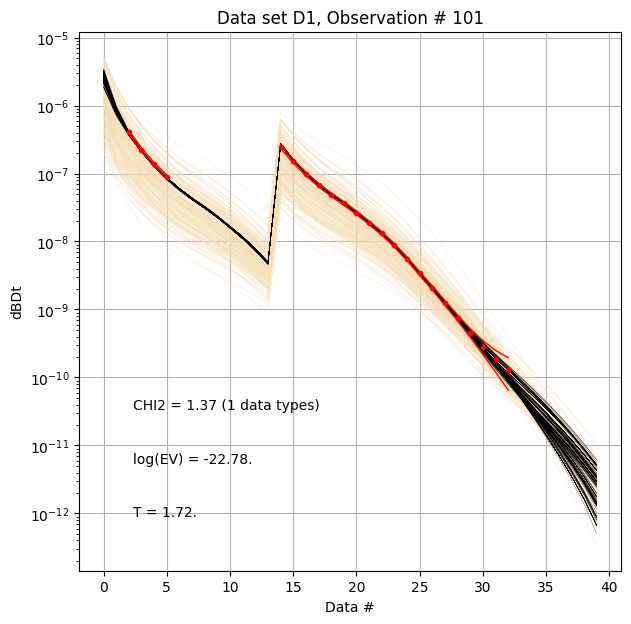

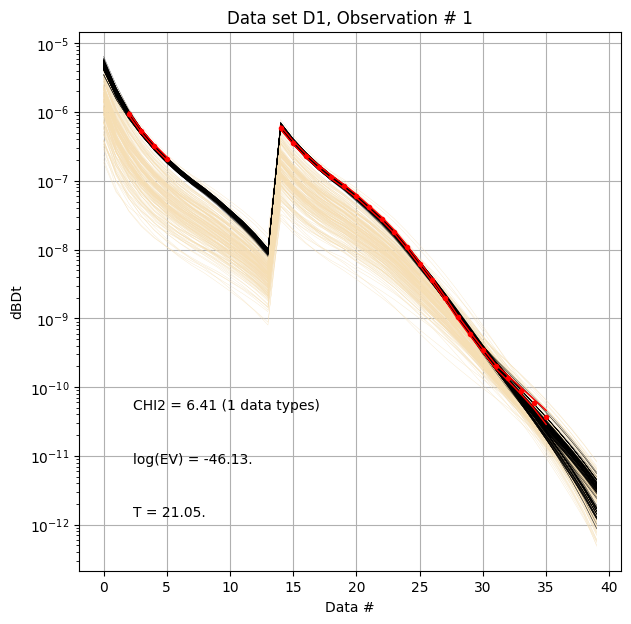

In [10]:
ig.plot_data_prior_post(f_post_h5, i_plot=100,hardcopy=hardcopy)
ig.plot_data_prior_post(f_post_h5, i_plot=0,hardcopy=hardcopy)

### Evidence and Temperature

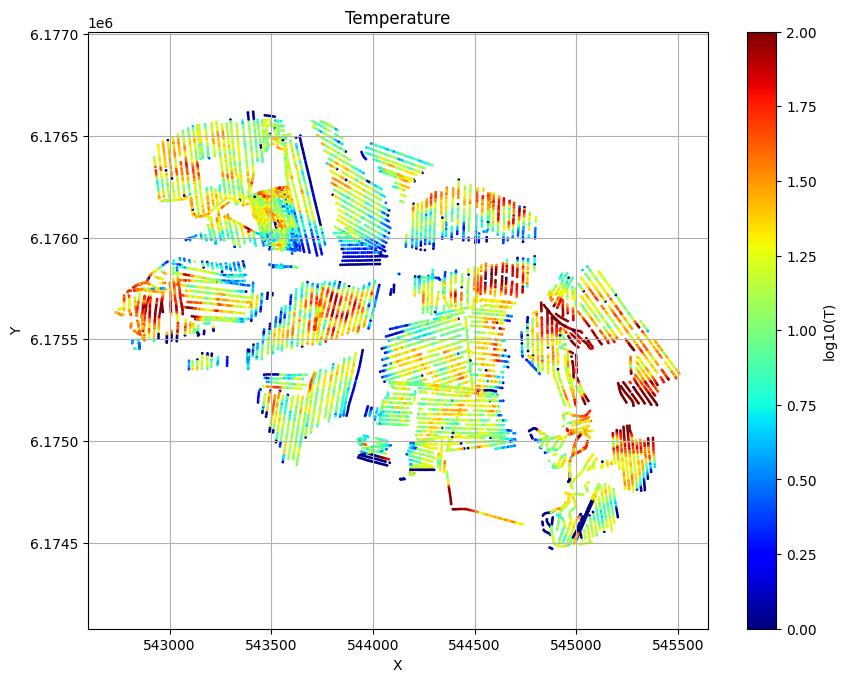

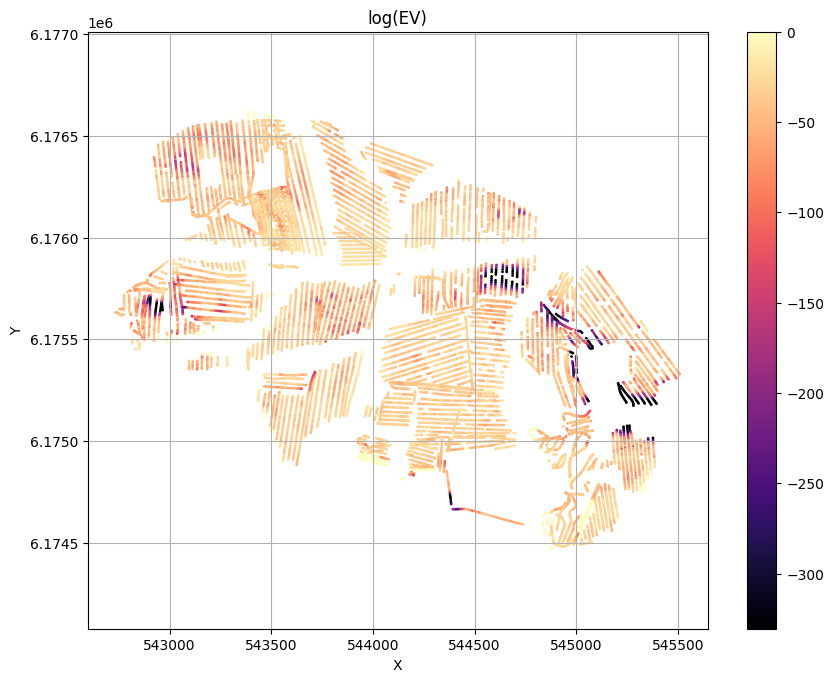

In [11]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='T',hardcopy=hardcopy)
# Plot the evidence (prior likelihood) estimated as part of inversion
ig.plot_T_EV(f_post_h5, pl='EV',hardcopy=hardcopy)

### Profile

Plot a profile of posterior statistics of model parameters 1 (resistivity)

Getting cmap from attribute


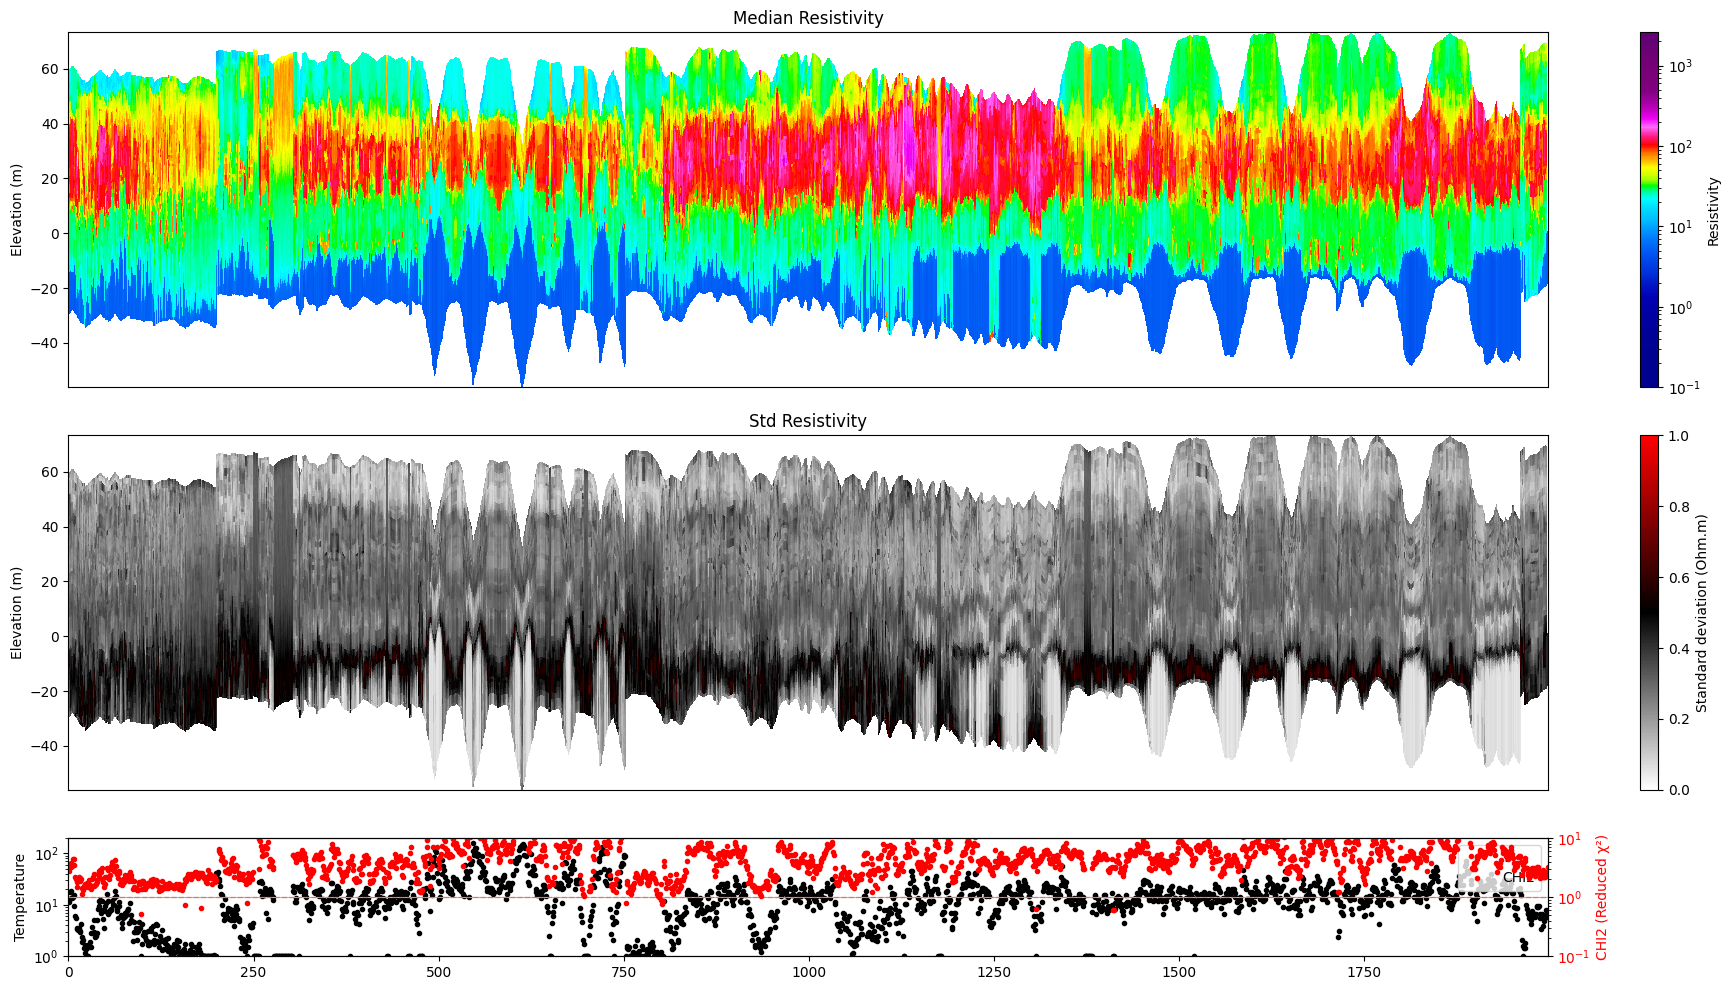

In [12]:
ig.plot_profile(f_post_h5, i1=1, i2=2000, im=1, hardcopy=hardcopy)

### Plot 2d Features

First plot the median resistivity in layers 5, 30, and 50

/M1/Median[5,:] Resistivity


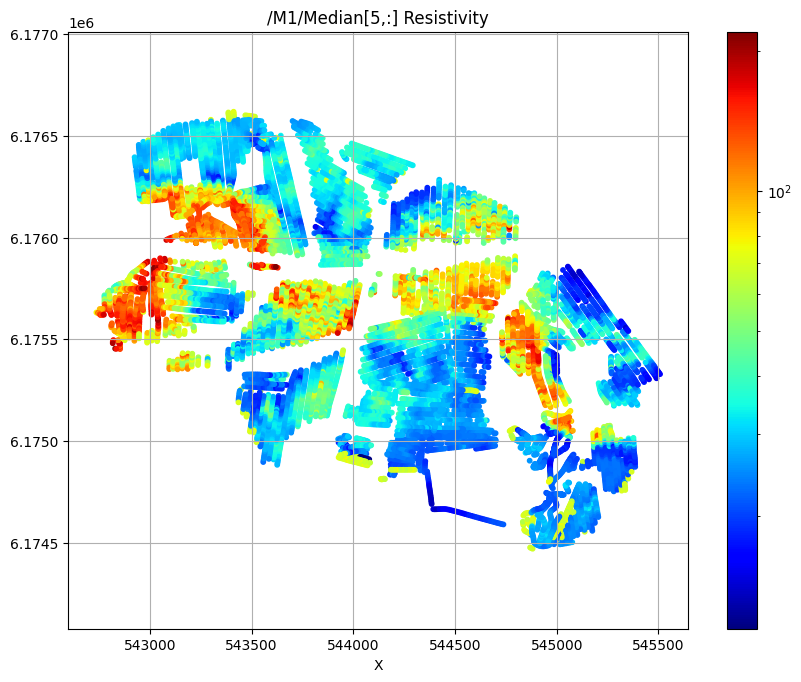

/M1/Median[30,:] Resistivity


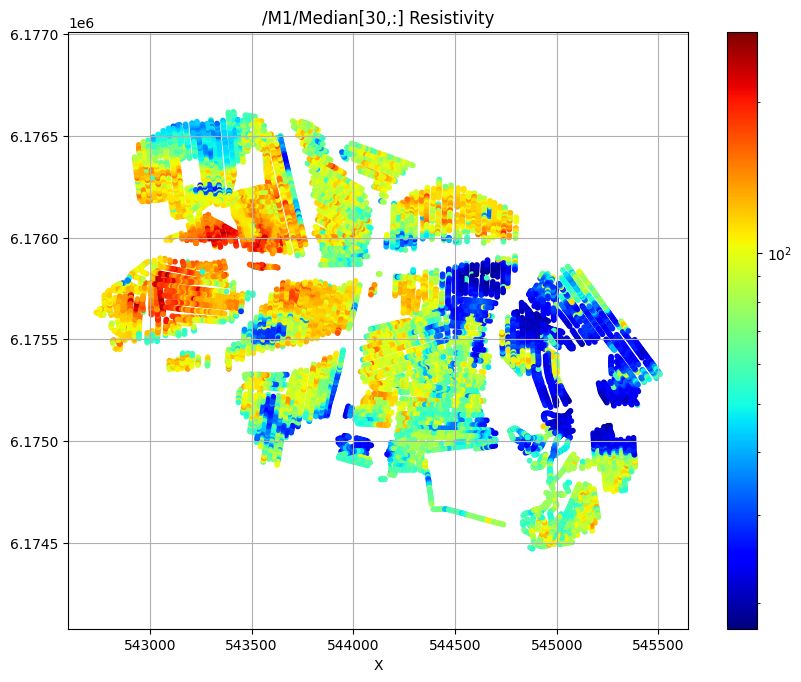

/M1/Median[50,:] Resistivity


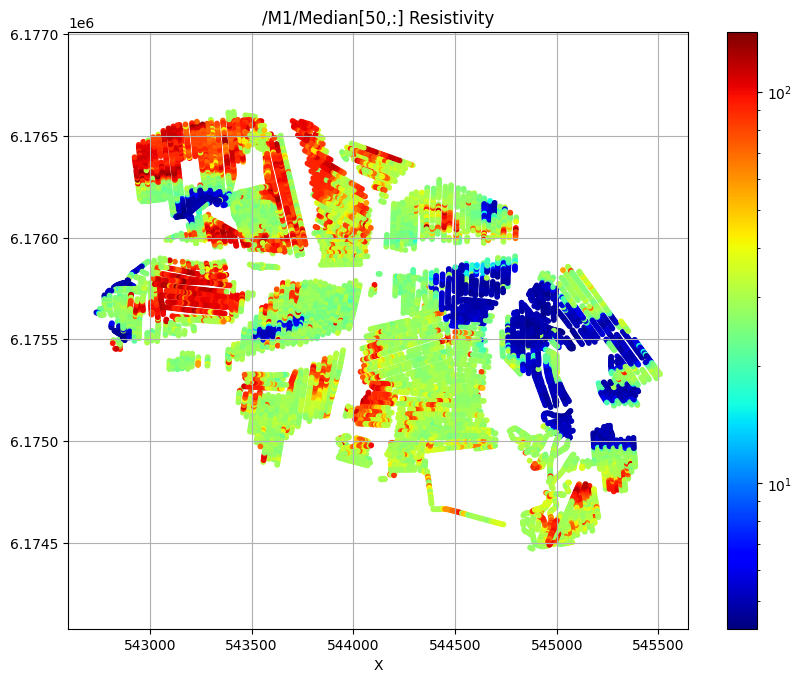

In [13]:

# Plot a 2D feature: Resistivity in layer 10
try:
    ig.plot_feature_2d(f_post_h5,im=1,iz=5, key='Median', uselog=1, cmap='jet', s=10,hardcopy=hardcopy)
    plt.show()
except:
    pass

try:
    ig.plot_feature_2d(f_post_h5,im=1,iz=30, key='Median', uselog=1, cmap='jet', s=10,hardcopy=hardcopy)
    plt.show()
except:
    pass

try:
    ig.plot_feature_2d(f_post_h5,im=1,iz=50, key='Median', uselog=1, cmap='jet', s=10,hardcopy=hardcopy)
    plt.show()
except:
    pass

## Export to CSV format

In [14]:
f_csv, f_point_csv = ig.post_to_csv(f_post_h5)

Writing to POST_M1.csv


----------------------------------------------------
Creating point data set: Median


Creating point data set: Mean


Creating point data set: Std


- saving to : POST_M1_point.csv


In [15]:
# Read the CSV file
#f_point_csv = 'POST_DAUGAARD_AVG_PRIOR_CHI2_NF_3_log-uniform_N100000_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu100000_aT1_M1_point.csv'
import pandas as pd
df = pd.read_csv(f_point_csv)
df.head()

X          Y      Z   LINE     Median       Mean       Std
0  543822.9  6176069.6  58.82  140.0  18.627102  20.591240  0.173665
1  543822.9  6176069.6  57.82  140.0  18.229116  18.079220  0.123830
2  543822.9  6176069.6  56.82  140.0  18.229116  18.593538  0.110274
3  543822.9  6176069.6  55.82  140.0  19.082991  20.203880  0.137680
4  543822.9  6176069.6  54.82  140.0  17.860168  20.360456  0.150813

In [16]:
# Use Pyvista to plot X,Y,Z,Median
plPyVista = False
if plPyVista:
    import pyvista as pv
    import numpy as np
    from pyvista import examples
    #pv.set_jupyter_backend('client')
    pv.set_plot_theme("document")
    p = pv.Plotter(notebook=True)
    p = pv.Plotter()
    filtered_df = df[(df['Median'] < 50) | (df['Median'] > 200)]
    #filtered_df = df[(df['LINE'] > 1000) & (df['LINE'] < 1400) ]
    points = filtered_df[['X', 'Y', 'Z']].values[:]
    median = np.log10(filtered_df['Mean'].values[:])
    opacity = np.where(filtered_df['Median'].values[:] < 100, 0.5, 1.0)
    #p.add_points(points, render_points_as_spheres=True, point_size=3, scalars=median, cmap='jet', opacity=opacity)
    p.add_points(points, render_points_as_spheres=True, point_size=6, scalars=median, cmap='hot')
    p.show_grid()
    p.show()